In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Here, we'll consider data from the same 150 projects as for the phospho-data, containing all mutations but phosphorylation on STY residues.

In [2]:
data_all_mod = pd.read_csv("all_mod_data_tissue_annotation1.tsv", sep='\t')

In [3]:
data_all_mod.head()

proj              peptide modres  UP_POS  ACC_ID  pep_start  pep_end  \
0  PXD000004    AEVMADTAVALASGNVK      T    2034  P21359       2028     2044   
1  PXD000004  DMGEMVTQGQTDAQYMFLR      T    1129  Q01082       1123     1141   
2  PXD000004    GGPNTVTPPPTTPEWVK      T      87  Q13733         83       99   
3  PXD000004         QVSSLLTNHLAR      S    1357  Q9Y4D8       1355     1366   
4  PXD000004    ITFTPSSGIASEVTVPK      S     728  Q92752        718      734   

   unimod                  modification tissue enrichment  \
0     447                    [447]Deoxy  Brain       None   
1       4            [4]Carbamidomethyl  Brain       None   
2       1                     [1]Acetyl  Brain       None   
3     385             [385]Ammonia-loss  Brain       None   
4     327  [327]Delta:H(4)C(2)O(-1)S(1)  Brain       None   

  modification_enrichment method additional  
0                    None   None       None  
1                    None   None       None  
2                    None   None       None  
3                    None   None       None  
4                    None   None       None

Under the specified constraints, 17,828 proteins have been identified with 196,404 modified sites, carrying 133 different modificaitons.

In [4]:
print(data_all_mod.shape[0])
print(data_all_mod["ACC_ID"].nunique())
print(data_all_mod.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"enrichment": "first"}).shape[0])

4049444
17828
196404


In [5]:
data_all_mod = data_all_mod[(data_all_mod["proj"]!="PXD001985")&(data_all_mod["proj"]!="PXD002014")&(data_all_mod["proj"]!="PXD002437")&
            (data_all_mod["proj"]!="PXD003533")&(data_all_mod["proj"]!="PXD004683")&(data_all_mod["proj"]!="PXD006095")&
            (data_all_mod["proj"]!="PXD006911")&(data_all_mod["proj"]!="PXD008568")&(data_all_mod["proj"]!="PXD009880")&
            (data_all_mod["proj"]!="PXD011241")&(data_all_mod["proj"]!="PXD011309")]

In [6]:
print(len(data_all_mod.groupby(["proj"], as_index=False).agg({"ACC_ID": "first"})["proj"].to_list()))

150


We'll now consider other modifications identified in the same 150 projects previously considered, occuring on STY-sites. In total, 17 824 proteins and 196 137 sites are considered, having 133 different modifications. Due to a typo when making this file, part of the "Kidney" projects have been denoted with "Kiney", which is corrected below.  

In [7]:
print(data_all_mod.shape[0])
print(data_all_mod["ACC_ID"].nunique())
print(data_all_mod.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"enrichment": "first"}).shape[0])

4042382
17824
196137


In [8]:
data_all_mod["unimod"].nunique()

133

In [9]:
data_all_mod["modification"].value_counts()

[40]Sulfo                     614796
[4]Carbamidomethyl            498421
[35]Oxidation                 256239
[122]Formyl                   221912
[447]Deoxy                    219370
                               ...  
[684]BDMAPP                      234
[534]Dibromo                     129
[1801]Fluorescein-tyramine       127
[131]Triiodo                      23
[397]Triiodothyronine              8
Name: modification, Length: 133, dtype: int64

In [10]:
data_all_mod.head()

proj              peptide modres  UP_POS  ACC_ID  pep_start  pep_end  \
0  PXD000004    AEVMADTAVALASGNVK      T    2034  P21359       2028     2044   
1  PXD000004  DMGEMVTQGQTDAQYMFLR      T    1129  Q01082       1123     1141   
2  PXD000004    GGPNTVTPPPTTPEWVK      T      87  Q13733         83       99   
3  PXD000004         QVSSLLTNHLAR      S    1357  Q9Y4D8       1355     1366   
4  PXD000004    ITFTPSSGIASEVTVPK      S     728  Q92752        718      734   

   unimod                  modification tissue enrichment  \
0     447                    [447]Deoxy  Brain       None   
1       4            [4]Carbamidomethyl  Brain       None   
2       1                     [1]Acetyl  Brain       None   
3     385             [385]Ammonia-loss  Brain       None   
4     327  [327]Delta:H(4)C(2)O(-1)S(1)  Brain       None   

  modification_enrichment method additional  
0                    None   None       None  
1                    None   None       None  
2                    None   None       None  
3                    None   None       None  
4                    None   None       None

In [11]:
data_all_mod["tissue"] = data_all_mod["tissue"].replace(["Kiney"], "Kidney")
data_all_mod[data_all_mod["tissue"].str.contains("Kiney")]

Empty DataFrame
Columns: [proj, peptide, modres, UP_POS, ACC_ID, pep_start, pep_end, unimod, modification, tissue, enrichment, modification_enrichment, method, additional]
Index: []

In [12]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

In [13]:
for tissue in list_tissues_STY:
    print(tissue)
    print(data_all_mod[data_all_mod["tissue"].str.contains(tissue)]["modification"].value_counts())

Adipose tissue
[35]Oxidation             17631
[4]Carbamidomethyl         6539
[425]Dioxidation           5305
[354]Nitro                 4576
[472]AEC-MAEC              3077
                          ...  
[2006]Haloxon                 3
[428]PhosphoHexNAc            3
[1934]HexNAc(2)Sulf(1)        2
[340]Bromo                    2
[478]FTC                      1
Name: modification, Length: 128, dtype: int64
B-cells
[4]Carbamidomethyl        4055
[122]Formyl               1796
[447]Deoxy                1674
[35]Oxidation             1473
[40]Sulfo                 1357
                          ... 
[1279]Difuran                1
[49]Phosphopantetheine       1
[1412]s-GlcNAc               1
[131]Triiodo                 1
[1413]PhosphoHex(2)          1
Name: modification, Length: 121, dtype: int64
Blood
[4]Carbamidomethyl            54128
[35]Oxidation                 38476
[40]Sulfo                     36455
[34]Methyl                    35413
[728]Methylphosphonate        34646
      

[4]Carbamidomethyl            25606
[447]Deoxy                    11953
[472]AEC-MAEC                 10909
[35]Oxidation                  9891
[401]Didehydro                 9359
                              ...  
[292]IodoU-AMP                   15
[1801]Fluorescein-tyramine       15
[478]FTC                         14
[534]Dibromo                      8
[131]Triiodo                      4
Name: modification, Length: 132, dtype: int64
Liver
[4]Carbamidomethyl              61802
[472]AEC-MAEC                   22760
[447]Deoxy                      22311
[35]Oxidation                   19206
[1]Acetyl                       19185
                                ...  
[1429]Hex(1)HexNAc(1)Phos(1)       56
[684]BDMAPP                        45
[292]IodoU-AMP                     38
[1801]Fluorescein-tyramine         25
[131]Triiodo                       13
Name: modification, Length: 132, dtype: int64
Lung
[4]Carbamidomethyl            21547
[35]Oxidation                 20224
[5]Carbamyl

[23]Dehydrated           5610
[35]Oxidation            5230
[385]Ammonia-loss        3552
[122]Formyl              3413
[447]Deoxy               3199
                         ... 
[534]Dibromo                8
[292]IodoU-AMP              6
[431]Palmitoleyl            5
[1413]PhosphoHex(2)         5
[397]Triiodothyronine       4
Name: modification, Length: 130, dtype: int64
Skin
[4]Carbamidomethyl              40167
[122]Formyl                     20215
[35]Oxidation                   16520
[447]Deoxy                      11853
[472]AEC-MAEC                   11593
                                ...  
[292]IodoU-AMP                      9
[1430]Hex(1)HexNAc(1)Sulf(1)        9
[684]BDMAPP                         6
[1801]Fluorescein-tyramine          5
[1429]Hex(1)HexNAc(1)Phos(1)        2
Name: modification, Length: 131, dtype: int64
Small intestine
[1009]Thiazolidine              28763
[122]Formyl                     25972
[34]Methyl                      14546
[35]Oxidation            

# On the protein level

In [14]:
data_all_mod_proteins = data_all_mod.groupby(["ACC_ID"], as_index=False).agg({"tissue": lambda x: ",".join(x)})
print(data_all_mod_proteins.shape[0])
data_all_mod_proteins.head()

17824


ACC_ID                                             tissue
0  A0A024RBG1  Liver,Umbilical cord,Kidney,Testis,Testis,Test...
1  A0A075B6H7  Breast,Breast,Breast,Breast,Breast,Breast,Brea...
2  A0A075B6H9  PBMC,PBMC,Liver,Menstrual fluid,Brain,Brain,Br...
3  A0A075B6I0  Monocytes,Blood,Lung,Lung,Lung,Lung,Lung,Lung,...
4  A0A075B6I1  Menstrual fluid,Brain,Brain,Brain,Brain,Nasal ...

Similar to what has been done for phosphoproteins, we calculate in how many tissues proteins have been identified, irrespective of which modification (except phosphorylation). We first consider all proteins, then only consider proteins also identified as phosphorylated and consider in how many tissues these have been identified.

In [15]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
for tissue in list_tissues_STY:
    data_all_mod_proteins[tissue] = data_all_mod_proteins["tissue"].str.contains(tissue)
data_all_mod_proteins.replace({True:1, False:0}, inplace=True)
data_all_mod_proteins["Total"] = data_all_mod_proteins[list_tissues_STY].sum(axis=1)
data_all_mod_proteins.head()

ACC_ID                                             tissue  \
0  A0A024RBG1  Liver,Umbilical cord,Kidney,Testis,Testis,Test...   
1  A0A075B6H7  Breast,Breast,Breast,Breast,Breast,Breast,Brea...   
2  A0A075B6H9  PBMC,PBMC,Liver,Menstrual fluid,Brain,Brain,Br...   
3  A0A075B6I0  Monocytes,Blood,Lung,Lung,Lung,Lung,Lung,Lung,...   
4  A0A075B6I1  Menstrual fluid,Brain,Brain,Brain,Brain,Nasal ...   

   Adipose tissue  B-cells  Blood  Bone  Brain  Breast  Cerebrospinal fluid  \
0               0        0      0     0      0       0                    0   
1               0        0      1     0      1       1                    1   
2               0        0      1     0      1       0                    1   
3               0        0      1     0      1       0                    1   
4               0        0      1     0      1       0                    0   

   Cervix  ...  Small intestine  Synovial tissue  T-cells  Testis  Tooth  \
0       0  ...                0                0        0       1      0   
1       1  ...                1                1        1       1      0   
2       1  ...                0                0        0       0      0   
3       1  ...                0                1        0       1      0   
4       1  ...                1                0        0       0      0   

   Umbilical cord  Ureter  Urinary bladder  Urine  Total  
0               1       0                0      0      4  
1               0       1                1      1     29  
2               0       0                1      0     12  
3               0       0                0      1     18  
4               0       0                0      1      9  

[5 rows x 44 columns]

In [16]:
data_all_mod_proteins["Total"].value_counts()

1     1880
2     1412
3     1156
5     1071
6     1061
4     1033
7      958
8      917
9      796
10     766
11     717
12     641
13     561
14     529
17     455
15     442
16     440
18     383
19     322
21     277
20     268
22     246
24     217
23     216
25     184
26     166
27     139
28     118
29      99
30      72
31      64
32      54
35      44
33      37
34      23
36      18
39      14
37      14
38      11
40       2
41       1
Name: Total, dtype: int64

In [17]:
data_phospho_protein = pd.read_csv("protein_data", sep="\t")
print(data_phospho_protein.shape[0])
data_phospho_protein.head()

5855


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
0  A0A075B6H7               0        0      0     0      0       0   
1  A0A075B6S5               0        0      0     0      0       0   
2  A0A087WXM9               0        0      0     0      0       0   
3  A0A0B4J2D5               0        0      0     0      0       0   
4  A0A0B4J2D9               0        0      1     0      0       0   

   Cerebrospinal fluid  Cervix  Colon  ...  Small intestine  Synovial tissue  \
0                    0       0      0  ...                0                0   
1                    0       0      0  ...                0                0   
2                    0       0      0  ...                0                0   
3                    0       0      0  ...                0                0   
4                    0       0      0  ...                0                0   

   T-cells  Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  \
0        0       0      0               0       0                0      0   
1        0       0      0               0       0                0      0   
2        0       1      0               0       0                0      0   
3        0       0      0               0       0                0      0   
4        0       0      0               0       0                0      0   

   Total  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 43 columns]

In [18]:
data_phospho_protein["Total"].value_counts()

1     2029
2      965
3      595
4      514
7      337
5      287
6      196
8      187
9      138
10     109
11      99
12      70
13      51
16      43
15      43
14      38
17      35
18      30
23      16
22      15
19      14
20      12
25       9
21       8
24       5
26       4
29       3
27       3
Name: Total, dtype: int64

In [19]:
data_all_mod_proteins[data_all_mod_proteins["Total"]==0]

Empty DataFrame
Columns: [ACC_ID, tissue, Adipose tissue, B-cells, Blood, Bone, Brain, Breast, Cerebrospinal fluid, Cervix, Colon, Dental plaque, Esophagus, Eye, Follicular fluid, Heart, Hela, Kidney, Liver, Lung, Lymph node, Menstrual fluid, Monocytes, Nasal polyps, NK-cells, Ovary, Pancreas, Palatine tonsils, Parotid gland, PBMC, Peritoneal dialysis fluid, Placenta, Skeletal muscle, Skin, Small intestine, Synovial tissue, T-cells, Testis, Tooth, Umbilical cord, Ureter, Urinary bladder, Urine, Total]
Index: []

[0 rows x 44 columns]

In [20]:
nr_tissues_expressed = data_all_mod_proteins.groupby(["Total"], as_index=False)["ACC_ID"].count()
nr_tissues_expressed.rename({"Total": "Number of tissues", "ACC_ID": "other modifications"}, axis=1, inplace=True)
nr_tissues_expressed["phosphoproteins"]=data_phospho_protein.groupby(["Total"], as_index=False)["ACC_ID"].count()["ACC_ID"]
nr_tissues_expressed

Number of tissues  other modifications  phosphoproteins
0                   1                 1880           2029.0
1                   2                 1412            965.0
2                   3                 1156            595.0
3                   4                 1033            514.0
4                   5                 1071            287.0
5                   6                 1061            196.0
6                   7                  958            337.0
7                   8                  917            187.0
8                   9                  796            138.0
9                  10                  766            109.0
10                 11                  717             99.0
11                 12                  641             70.0
12                 13                  561             51.0
13                 14                  529             38.0
14                 15                  442             43.0
15                 16                  440             43.0
16                 17                  455             35.0
17                 18                  383             30.0
18                 19                  322             14.0
19                 20                  268             12.0
20                 21                  277              8.0
21                 22                  246             15.0
22                 23                  216             16.0
23                 24                  217              5.0
24                 25                  184              9.0
25                 26                  166              4.0
26                 27                  139              3.0
27                 28                  118              3.0
28                 29                   99              NaN
29                 30                   72              NaN
30                 31                   64              NaN
31                 32                   54              NaN
32                 33                   37              NaN
33                 34                   23              NaN
34                 35                   44              NaN
35                 36                   18              NaN
36                 37                   14              NaN
37                 38                   11              NaN
38                 39                   14              NaN
39                 40                    2              NaN
40                 41                    1              NaN

<AxesSubplot:title={'center':'Number of proteins seen in a certain number of tissues (other modifications/phosphoproteins)'}, xlabel='Number of tissues', ylabel='Number of proteins'>

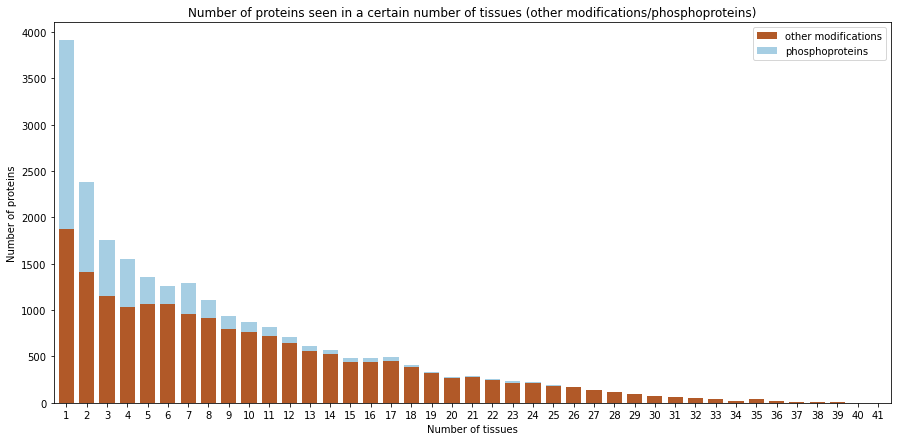

In [21]:
nr_tissues_expressed.plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="Paired_r",
                          title="Number of proteins seen in a certain number of tissues (other modifications/phosphoproteins)",
                          xlabel= "Number of tissues", ylabel="Number of proteins", width=0.75)

In [22]:
nr_tissues_expressed["log(other modifications)"] = np.log10(nr_tissues_expressed["other modifications"])
nr_tissues_expressed["log(phosphoproteins)"] = np.log10(nr_tissues_expressed["phosphoproteins"])

<AxesSubplot:title={'center':'Number of proteins seen in a certain number of tissues (other modifications/phosphoproteins)'}, xlabel='Number of tissues', ylabel='log(Number of proteins)'>

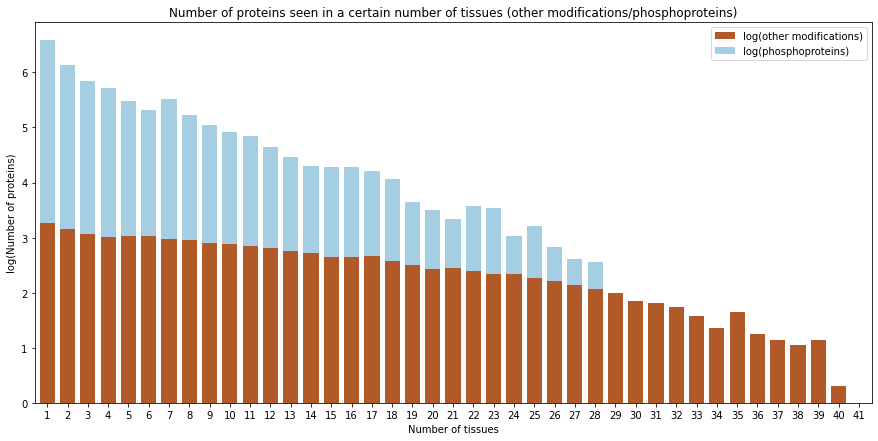

In [23]:
nr_tissues_expressed[["Number of tissues", "log(other modifications)", "log(phosphoproteins)"]].plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="Paired_r",
                          title="Number of proteins seen in a certain number of tissues (other modifications/phosphoproteins)",
                          xlabel= "Number of tissues", ylabel="log(Number of proteins)", width=0.75)
#plt.savefig("WP3 number tissues all_proteins.png", format="png", bbox_inches="tight")

Retaining only these proteins from all but the phosphorylation dataset that were seen in the phosphorylation dataset.

In [24]:
data_all_mod_proteins_sub = pd.merge(data_phospho_protein["ACC_ID"], data_all_mod_proteins, how="inner", on=["ACC_ID"])
print(data_all_mod_proteins_sub["ACC_ID"].nunique())
print("Proteins not found otherwise modified on STY-sites: {}".format((data_phospho_protein["ACC_ID"].nunique()-data_all_mod_proteins_sub["ACC_ID"].nunique())))
data_all_mod_proteins_sub.head()

5826
Proteins not found otherwise modified on STY-sites: 29


ACC_ID                                             tissue  \
0  A0A075B6H7  Breast,Breast,Breast,Breast,Breast,Breast,Brea...   
1  A0A075B6S5  Breast,Breast,Breast,PBMC,Lung,Lung,Lung,Lung,...   
2  A0A087WXM9  Urinary bladder, Colon, Kidney, Liver,Brain,Bl...   
3  A0A0B4J2D5  Liver,Liver,Liver,Liver,Liver,Liver,Liver,Live...   
4  A0A0B4J2D9  PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,Ureter...   

   Adipose tissue  B-cells  Blood  Bone  Brain  Breast  Cerebrospinal fluid  \
0               0        0      1     0      1       1                    1   
1               0        0      1     0      1       1                    1   
2               1        0      1     0      1       0                    0   
3               1        0      1     0      1       1                    1   
4               0        0      1     0      1       0                    1   

   Cervix  ...  Small intestine  Synovial tissue  T-cells  Testis  Tooth  \
0       1  ...                1                1        1       1      0   
1       1  ...                0                1        1       1      0   
2       0  ...                0                0        0       0      0   
3       1  ...                1                0        0       1      0   
4       1  ...                1                1        1       1      0   

   Umbilical cord  Ureter  Urinary bladder  Urine  Total  
0               0       1                1      1     29  
1               0       0                1      1     26  
2               1       0                1      0      8  
3               1       0                1      0     25  
4               0       1                1      1     28  

[5 rows x 44 columns]

In [25]:
nr_tissues_expressed2 = data_all_mod_proteins_sub.groupby(["Total"], as_index=False)["ACC_ID"].count()
nr_tissues_expressed2.rename({"Total": "Number of tissues", "ACC_ID": "other modifications"}, axis=1, inplace=True)
nr_tissues_expressed2["phosphoproteins"]=data_phospho_protein.groupby(["Total"], as_index=False)["ACC_ID"].count()["ACC_ID"]
nr_tissues_expressed2

Number of tissues  other modifications  phosphoproteins
0                   1                   84           2029.0
1                   2                  126            965.0
2                   3                  131            595.0
3                   4                  162            514.0
4                   5                  167            287.0
5                   6                  205            196.0
6                   7                  247            337.0
7                   8                  257            187.0
8                   9                  239            138.0
9                  10                  281            109.0
10                 11                  288             99.0
11                 12                  254             70.0
12                 13                  270             51.0
13                 14                  266             38.0
14                 15                  237             43.0
15                 16                  252             43.0
16                 17                  261             35.0
17                 18                  221             30.0
18                 19                  198             14.0
19                 20                  172             12.0
20                 21                  182              8.0
21                 22                  162             15.0
22                 23                  145             16.0
23                 24                  155              5.0
24                 25                  127              9.0
25                 26                  120              4.0
26                 27                  107              3.0
27                 28                   97              3.0
28                 29                   78              NaN
29                 30                   62              NaN
30                 31                   61              NaN
31                 32                   53              NaN
32                 33                   35              NaN
33                 34                   23              NaN
34                 35                   43              NaN
35                 36                   18              NaN
36                 37                   14              NaN
37                 38                   11              NaN
38                 39                   12              NaN
39                 40                    2              NaN
40                 41                    1              NaN

<AxesSubplot:title={'center':'Number of proteins seen in a certain number of tissues (other modifications/phosphoproteins) for proteins found phosphorylated'}, xlabel='Number of tissues', ylabel='Number of proteins'>

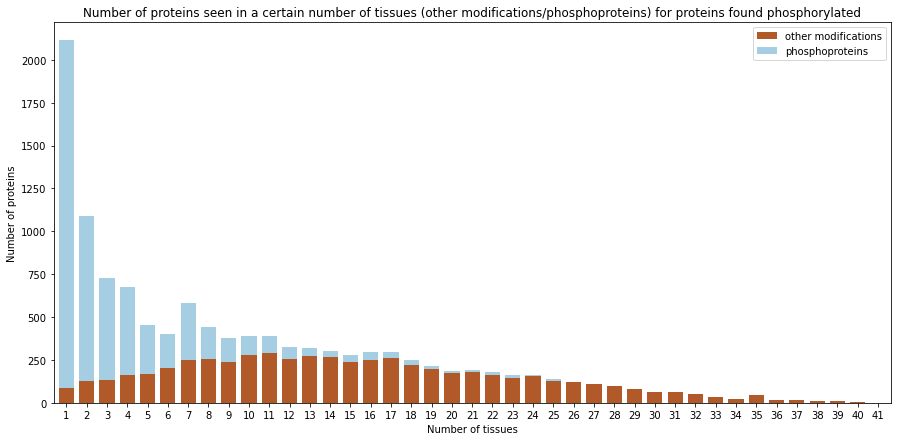

In [26]:
nr_tissues_expressed2.plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="Paired_r",
                          title="Number of proteins seen in a certain number of tissues (other modifications/phosphoproteins) for proteins found phosphorylated",
                          xlabel= "Number of tissues", ylabel="Number of proteins", width=0.75)

In [27]:
nr_tissues_expressed2["log(other modifications)"] = np.log10(nr_tissues_expressed2["other modifications"])
nr_tissues_expressed2["log(phosphoproteins)"] = np.log10(nr_tissues_expressed2["phosphoproteins"])

In [28]:
nr_tissues_expressed2

Number of tissues  other modifications  phosphoproteins  \
0                   1                   84           2029.0   
1                   2                  126            965.0   
2                   3                  131            595.0   
3                   4                  162            514.0   
4                   5                  167            287.0   
5                   6                  205            196.0   
6                   7                  247            337.0   
7                   8                  257            187.0   
8                   9                  239            138.0   
9                  10                  281            109.0   
10                 11                  288             99.0   
11                 12                  254             70.0   
12                 13                  270             51.0   
13                 14                  266             38.0   
14                 15                  237             43.0   
15                 16                  252             43.0   
16                 17                  261             35.0   
17                 18                  221             30.0   
18                 19                  198             14.0   
19                 20                  172             12.0   
20                 21                  182              8.0   
21                 22                  162             15.0   
22                 23                  145             16.0   
23                 24                  155              5.0   
24                 25                  127              9.0   
25                 26                  120              4.0   
26                 27                  107              3.0   
27                 28                   97              3.0   
28                 29                   78              NaN   
29                 30                   62              NaN   
30                 31                   61              NaN   
31                 32                   53              NaN   
32                 33                   35              NaN   
33                 34                   23              NaN   
34                 35                   43              NaN   
35                 36                   18              NaN   
36                 37                   14              NaN   
37                 38                   11              NaN   
38                 39                   12              NaN   
39                 40                    2              NaN   
40                 41                    1              NaN   

    log(other modifications)  log(phosphoproteins)  
0                   1.924279              3.307282  
1                   2.100371              2.984527  
2                   2.117271              2.774517  
3                   2.209515              2.710963  
4                   2.222716              2.457882  
5                   2.311754              2.292256  
6                   2.392697              2.527630  
7                   2.409933              2.271842  
8                   2.378398              2.139879  
9                   2.448706              2.037426  
10                  2.459392              1.995635  
11                  2.404834              1.845098  
12                  2.431364              1.707570  
13                  2.424882              1.579784  
14                  2.374748              1.633468  
15                  2.401401              1.633468  
16                  2.416641              1.544068  
17                  2.344392              1.477121  
18                  2.296665              1.146128  
19                  2.235528              1.079181  
20                  2.260071              0.903090  
21                  2.209515              1.176091  
22                  2.161368              1.204120  
23                  2.190332              0.698970  
24                  2.103804    

<AxesSubplot:title={'center':'Number of phosphoproteins seen in a certain number of tissues (other modifications/phosphoproteins)'}, xlabel='Number of tissues', ylabel='log(Number of proteins)'>

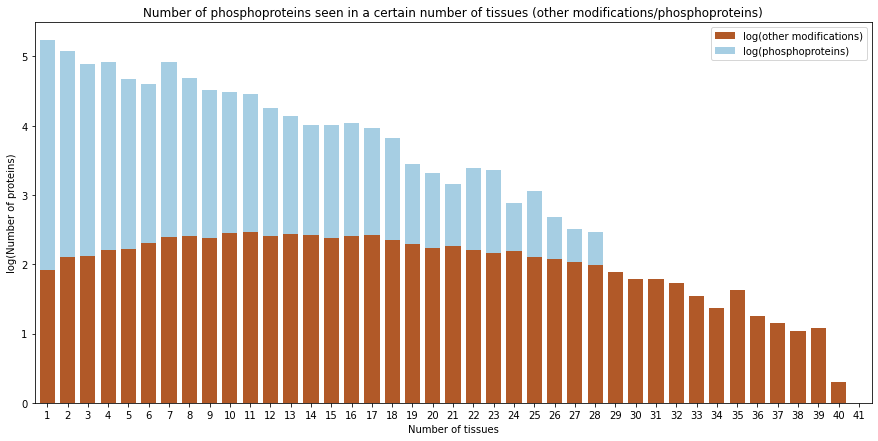

In [29]:
nr_tissues_expressed2[["Number of tissues", "log(other modifications)", "log(phosphoproteins)"]].plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="Paired_r",
                          title="Number of phosphoproteins seen in a certain number of tissues (other modifications/phosphoproteins)",
                          xlabel= "Number of tissues", ylabel="log(Number of proteins)", width=0.75)
#plt.savefig("WP3 number tissues proteins.png", format="png", bbox_inches="tight")

We first consider the representation level of all proteins having other modifications on STY sites and then of only these proteins having been found phosphorylated on an STY site.

<AxesSubplot:title={'center':'Proteins having other modification than phosphorylation across tissues'}, xlabel='Tissue'>

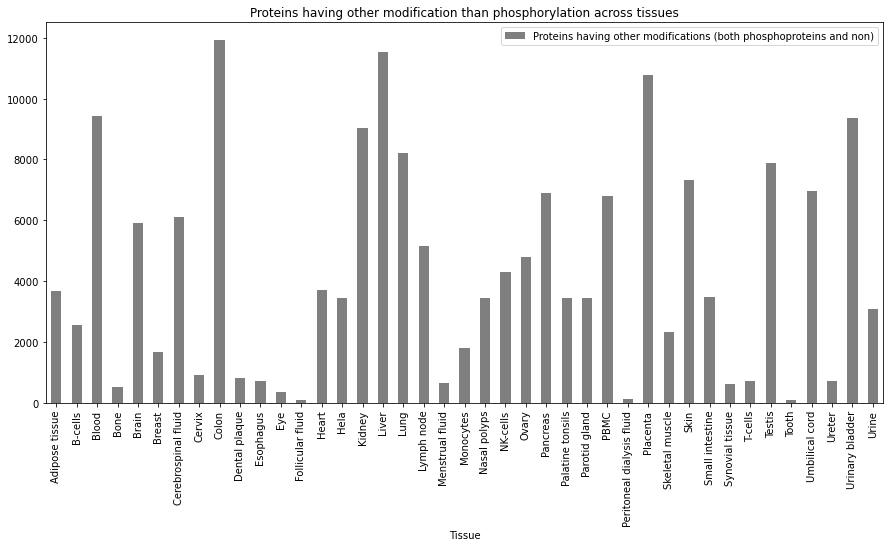

In [30]:
data_all_mod_proteins_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts = []
for tissue in list_tissues_STY:
    count = data_all_mod_proteins[tissue].sum()
    list_counts.append(count)
data_all_mod_proteins_tissues["Proteins having other modifications (both phosphoproteins and non)"] = list_counts
data_all_mod_proteins_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="Proteins having other modification than phosphorylation across tissues", color="tab:grey")

We now again consider the representation level of otherwise modified proteins, now only for proteins having been identified as phosphorylated.

<AxesSubplot:title={'center':'Proteins having other modification than phosphorylation across tissues'}, xlabel='Tissue'>

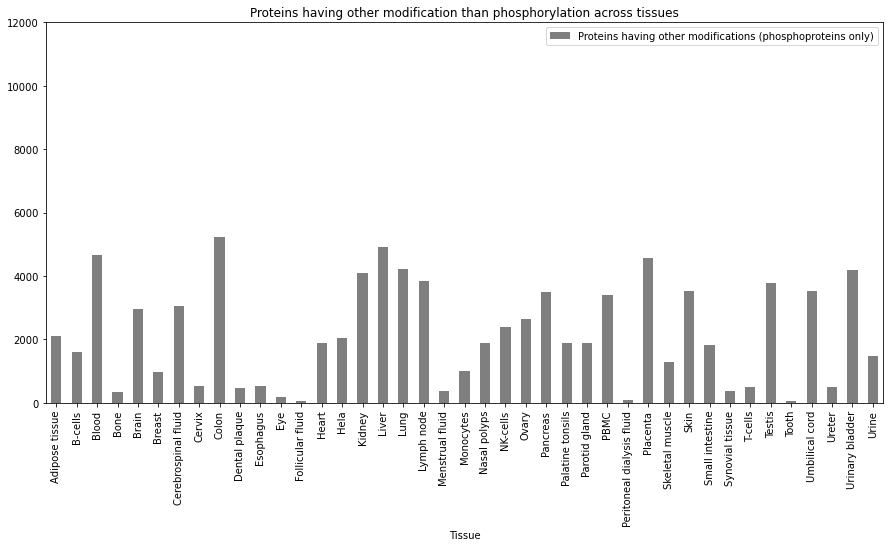

In [31]:
data_all_mod_proteins_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts = []
for tissue in list_tissues_STY:
    count = data_all_mod_proteins_sub[tissue].sum()
    list_counts.append(count)
data_all_mod_proteins_tissues["Proteins having other modifications (phosphoproteins only)"] = list_counts
data_all_mod_proteins_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="Proteins having other modification than phosphorylation across tissues", color="tab:grey", ylim=[0,12000])

In [32]:
list_counts = []
for tissue in list_tissues_STY:
    count = data_phospho_protein.loc[(data_phospho_protein[tissue]==1), "ACC_ID"].nunique()
    list_counts.append(count)
data_all_mod_proteins_tissues["Proteins phosphorylated"] = list_counts

When comparing the amount of phosphoproteins with the amount of otherwise modified proteins, both limited to STY-sites, we notice that some tissues are relatively more associated with phosphorylation then others.

<AxesSubplot:title={'center':'Amount of phosphoproteins phosphorylated and otherwise modified'}, xlabel='Tissue'>

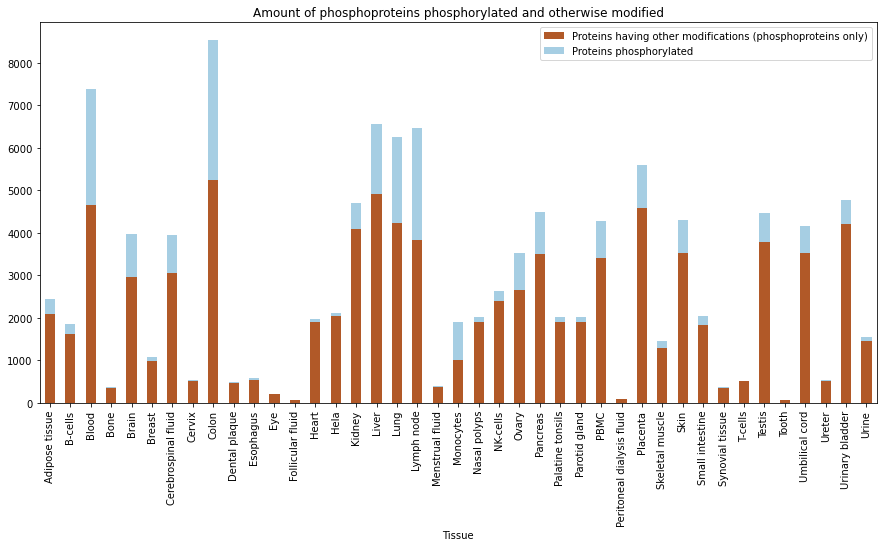

In [33]:
data_all_mod_proteins_tissues.plot(x="Tissue", kind="bar", stacked=True, figsize=(15,7), title="Amount of phosphoproteins phosphorylated and otherwise modified", colormap="Paired_r")
#plt.savefig("WP3 phosphoproteins and otherwise modified per tissue.png", format="png", bbox_inches="tight")

In [34]:
tspec_proteins = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
taspec_proteins = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
gen_proteins = pd.read_csv("1.1 general P proteins", sep="\t")

We'll now investigate in how many tissues proteins have been identified as otherwise modified, excluding the tissues they have been found phosphorylated in.

In [35]:
tspec_all_mod = pd.merge(tspec_proteins, data_all_mod_proteins_sub, how="inner", on="ACC_ID", suffixes=["_P", "_all_mod"])
print(tspec_all_mod.shape[0])
print("Tissue-specific phosphorylated proteins not found modified: {}".format(tspec_proteins["ACC_ID"].nunique()-tspec_all_mod["ACC_ID"].nunique()))
tspec_all_mod.head()

2008
Tissue-specific phosphorylated proteins not found modified: 21


ACC_ID  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  \
0  A0A075B6H7                 0          0        0       0        0   
1  A0A075B6S5                 0          0        0       0        0   
2  A0A087WXM9                 0          0        0       0        0   
3  A0A0B4J2D5                 0          0        0       0        0   
4  A0A0B4J2D9                 0          0        1       0        0   

   Breast_P  Cerebrospinal fluid_P  Cervix_P  Colon_P  ...  \
0         0                      0         0        0  ...   
1         0                      0         0        0  ...   
2         0                      0         0        0  ...   
3         0                      0         0        0  ...   
4         0                      0         0        0  ...   

   Small intestine_all_mod  Synovial tissue_all_mod  T-cells_all_mod  \
0                        1                        1                1   
1                        0                        1                1   
2                        0                        0                0   
3                        1                        0                0   
4                        1                        1                1   

   Testis_all_mod  Tooth_all_mod  Umbilical cord_all_mod  Ureter_all_mod  \
0               1              0                       0               1   
1               1              0                       0               0   
2               0              0                       1               0   
3               1              0                       1               0   
4               1              0                       0               1   

   Urinary bladder_all_mod  Urine_all_mod  Total_all_mod  
0                        1              1             29  
1                        1              1             26  
2                        1              0              8  
3                        1              0             25  
4                        1              1             28  

[5 rows x 86 columns]

In [36]:
taspec_all_mod = pd.merge(taspec_proteins, data_all_mod_proteins_sub, how="inner", on="ACC_ID", suffixes=["_P", "_all_mod"])
print(taspec_all_mod.shape[0])
print("Tissue aspecific phosphorylated proteins not found modified: {}".format(taspec_proteins["ACC_ID"].nunique()-taspec_all_mod["ACC_ID"].nunique()))
taspec_all_mod.head()

2068
Tissue aspecific phosphorylated proteins not found modified: 6


ACC_ID  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  \
0  A0A0C4DH36                 0          0        1       0        0   
1      A0AVK6                 0          0        1       0        0   
2      A0JLT2                 0          0        1       0        0   
3      A0M8Q6                 0          0        0       0        0   
4      A0MZ66                 0          0        1       0        0   

   Breast_P  Cerebrospinal fluid_P  Cervix_P  Colon_P  ...  \
0         0                      0         0        0  ...   
1         0                      0         0        1  ...   
2         0                      0         0        1  ...   
3         0                      0         0        0  ...   
4         0                      0         0        1  ...   

   Small intestine_all_mod  Synovial tissue_all_mod  T-cells_all_mod  \
0                        0                        0                0   
1                        0                        0                0   
2                        0                        0                0   
3                        1                        1                0   
4                        0                        0                0   

   Testis_all_mod  Tooth_all_mod  Umbilical cord_all_mod  Ureter_all_mod  \
0               1              0                       0               1   
1               0              0                       0               0   
2               0              0                       0               0   
3               1              0                       0               1   
4               1              0                       1               0   

   Urinary bladder_all_mod  Urine_all_mod  Total_all_mod  
0                        1              0             15  
1                        0              0             10  
2                        0              0              6  
3                        1              1             31  
4                        1              1             21  

[5 rows x 86 columns]

In [37]:
gen_all_mod = pd.merge(gen_proteins, data_all_mod_proteins_sub, how="inner", on="ACC_ID", suffixes=["_P", "_all_mod"])
print(gen_all_mod.shape[0])
print("Pervasively phosphorylated proteins not found modified: {}".format(gen_proteins["ACC_ID"].nunique()-gen_all_mod["ACC_ID"].nunique()))
gen_all_mod.head()

1750
Pervasively phosphorylated proteins not found modified: 2


ACC_ID  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  \
0  A0A0C4DH39                 0          0        1       0        1   
1      A0FGR8                 0          0        1       0        0   
2      A0JNW5                 0          0        1       0        1   
3      A2RU30                 0          0        1       0        1   
4      A5A3E0                 1          0        1       0        1   

   Breast_P  Cerebrospinal fluid_P  Cervix_P  Colon_P  ...  \
0         0                      1         0        0  ...   
1         0                      0         0        1  ...   
2         0                      1         0        1  ...   
3         0                      1         0        0  ...   
4         1                      1         0        1  ...   

   Small intestine_all_mod  Synovial tissue_all_mod  T-cells_all_mod  \
0                        0                        0                0   
1                        1                        0                0   
2                        0                        0                0   
3                        0                        0                0   
4                        1                        1                1   

   Testis_all_mod  Tooth_all_mod  Umbilical cord_all_mod  Ureter_all_mod  \
0               1              0                       0               0   
1               1              0                       1               0   
2               1              0                       1               0   
3               0              0                       0               0   
4               1              0                       1               1   

   Urinary bladder_all_mod  Urine_all_mod  Total_all_mod  
0                        0              1              7  
1                        1              0             21  
2                        1              0             19  
3                        0              0              4  
4                        1              1             38  

[5 rows x 86 columns]

In [38]:
gen_all_mod_not = pd.merge(gen_proteins, data_all_mod_proteins_sub, how="left", on="ACC_ID", suffixes=["_P", "_all_mod"], indicator = True)
gen_all_mod_not[gen_all_mod_not["_merge"]=="left_only"]["Total_P"]

1018    7
1744    7
Name: Total_P, dtype: int64

In [39]:
tspec_all_mod["Total_nonP"] = 0
for tissue in list_tissues_STY:
    tissueP = tissue+"_P"
    tissue_all_mod = tissue+"_all_mod"
    tspec_all_mod.loc[(tspec_all_mod[tissueP]==0)&(tspec_all_mod[tissue_all_mod]==1), "Total_nonP"] += 1
tspec_all_mod.head()

ACC_ID  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  \
0  A0A075B6H7                 0          0        0       0        0   
1  A0A075B6S5                 0          0        0       0        0   
2  A0A087WXM9                 0          0        0       0        0   
3  A0A0B4J2D5                 0          0        0       0        0   
4  A0A0B4J2D9                 0          0        1       0        0   

   Breast_P  Cerebrospinal fluid_P  Cervix_P  Colon_P  ...  \
0         0                      0         0        0  ...   
1         0                      0         0        0  ...   
2         0                      0         0        0  ...   
3         0                      0         0        0  ...   
4         0                      0         0        0  ...   

   Synovial tissue_all_mod  T-cells_all_mod  Testis_all_mod  Tooth_all_mod  \
0                        1                1               1              0   
1                        1                1               1              0   
2                        0                0               0              0   
3                        0                0               1              0   
4                        1                1               1              0   

   Umbilical cord_all_mod  Ureter_all_mod  Urinary bladder_all_mod  \
0                       0               1                        1   
1                       0               0                        1   
2                       1               0                        1   
3                       1               0                        1   
4                       0               1                        1   

   Urine_all_mod  Total_all_mod  Total_nonP  
0              1             29          28  
1              1             26          25  
2              0              8           8  
3              0             25          24  
4              1             28          27  

[5 rows x 87 columns]

In [40]:
#Compared to 2029
tspec_all_mod[tspec_all_mod["Total_nonP"] <= tspec_all_mod["Total_all_mod"]]["ACC_ID"].nunique()

2008

In [41]:
taspec_all_mod["Total_nonP"] = 0
for tissue in list_tissues_STY:
    tissueP = tissue+"_P"
    tissue_all_mod = tissue+"_all_mod"
    taspec_all_mod.loc[(taspec_all_mod[tissueP]==0)&(taspec_all_mod[tissue_all_mod]==1), "Total_nonP"] += 1
taspec_all_mod.head()

ACC_ID  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  \
0  A0A0C4DH36                 0          0        1       0        0   
1      A0AVK6                 0          0        1       0        0   
2      A0JLT2                 0          0        1       0        0   
3      A0M8Q6                 0          0        0       0        0   
4      A0MZ66                 0          0        1       0        0   

   Breast_P  Cerebrospinal fluid_P  Cervix_P  Colon_P  ...  \
0         0                      0         0        0  ...   
1         0                      0         0        1  ...   
2         0                      0         0        1  ...   
3         0                      0         0        0  ...   
4         0                      0         0        1  ...   

   Synovial tissue_all_mod  T-cells_all_mod  Testis_all_mod  Tooth_all_mod  \
0                        0                0               1              0   
1                        0                0               0              0   
2                        0                0               0              0   
3                        1                0               1              0   
4                        0                0               1              0   

   Umbilical cord_all_mod  Ureter_all_mod  Urinary bladder_all_mod  \
0                       0               1                        1   
1                       0               0                        0   
2                       0               0                        0   
3                       0               1                        1   
4                       1               0                        1   

   Urine_all_mod  Total_all_mod  Total_nonP  
0              0             15          13  
1              0             10           8  
2              0              6           3  
3              1             31          27  
4              1             21          17  

[5 rows x 87 columns]

In [42]:
#compared to 2074
taspec_all_mod[taspec_all_mod["Total_nonP"] <= taspec_all_mod["Total_all_mod"]]["ACC_ID"].nunique()

2068

In [43]:
gen_all_mod["Total_nonP"] = 0
for tissue in list_tissues_STY:
    tissueP = tissue+"_P"
    tissue_all_mod = tissue+"_all_mod"
    gen_all_mod.loc[(gen_all_mod[tissueP]==0)&(gen_all_mod[tissue_all_mod]==1), "Total_nonP"] += 1
gen_all_mod.head()

ACC_ID  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  \
0  A0A0C4DH39                 0          0        1       0        1   
1      A0FGR8                 0          0        1       0        0   
2      A0JNW5                 0          0        1       0        1   
3      A2RU30                 0          0        1       0        1   
4      A5A3E0                 1          0        1       0        1   

   Breast_P  Cerebrospinal fluid_P  Cervix_P  Colon_P  ...  \
0         0                      1         0        0  ...   
1         0                      0         0        1  ...   
2         0                      1         0        1  ...   
3         0                      1         0        0  ...   
4         1                      1         0        1  ...   

   Synovial tissue_all_mod  T-cells_all_mod  Testis_all_mod  Tooth_all_mod  \
0                        0                0               1              0   
1                        0                0               1              0   
2                        0                0               1              0   
3                        0                0               0              0   
4                        1                1               1              0   

   Umbilical cord_all_mod  Ureter_all_mod  Urinary bladder_all_mod  \
0                       0               0                        0   
1                       1               0                        1   
2                       1               0                        1   
3                       0               0                        0   
4                       1               1                        1   

   Urine_all_mod  Total_all_mod  Total_nonP  
0              1              7           2  
1              0             21          16  
2              0             19          11  
3              0              4           4  
4              1             38          15  

[5 rows x 87 columns]

In [44]:
#compared to 1752
gen_all_mod[gen_all_mod["Total_nonP"] < gen_all_mod["Total_all_mod"]]["ACC_ID"].nunique()

1736

For each category, we investigate in how many tissues they have been found modified in, other than the ones they have also been found phosphorylated in.
37 tissue-specific phopshorylated proteins have been identified only in the tissue they have been found phosphorylated in (1,82%). The vast majority of proteins has been identified in 2-10 extra tissues with another modification. 21 proteins have not been identified with a modification other than phosphorylation (1,03%).

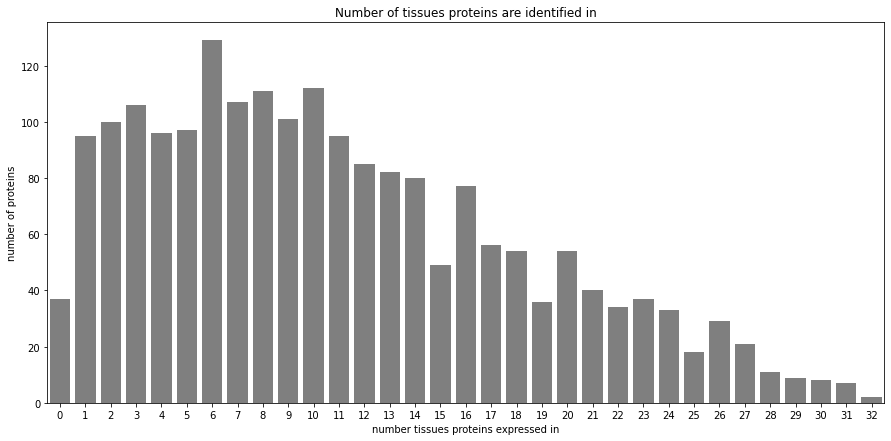

In [45]:
plot = tspec_all_mod.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="tab:grey").set(xlabel="number tissues proteins expressed in",
                                                  ylabel = "number of proteins", title = "Number of tissues proteins are identified in")
#plt.savefig("WP3 tissue specific proteins in modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [46]:
for tissue in list_tissues_STY:
    tissue = tissue+"_all_mod"
    if tspec_all_mod.loc[(tspec_all_mod["Total_nonP"]>=30)&(tspec_all_mod[tissue]==0)].shape[0] != 0:
        print(tissue)

B-cells_all_mod
Bone_all_mod
Breast_all_mod
Cervix_all_mod
Dental plaque_all_mod
Esophagus_all_mod
Eye_all_mod
Follicular fluid_all_mod
Heart_all_mod
Lymph node_all_mod
Menstrual fluid_all_mod
Monocytes_all_mod
NK-cells_all_mod
Peritoneal dialysis fluid_all_mod
Skeletal muscle_all_mod
Synovial tissue_all_mod
T-cells_all_mod
Tooth_all_mod
Ureter_all_mod
Urine_all_mod


In [47]:
plot

Total_nonP  ACC_ID
0            0      37
1            1      95
2            2     100
3            3     106
4            4      96
5            5      97
6            6     129
7            7     107
8            8     111
9            9     101
10          10     112
11          11      95
12          12      85
13          13      82
14          14      80
15          15      49
16          16      77
17          17      56
18          18      54
19          19      36
20          20      54
21          21      40
22          22      34
23          23      37
24          24      33
25          25      18
26          26      29
27          27      21
28          28      11
29          29       9
30          30       8
31          31       7
32          32       2

22 out of 2074 (1,06%) proteins have not been identifed in another tissue than the one they were found phopshorylated in. Most proteins have been identified in 6-14 tissues other than the ones they were found phosphorylated in. 6 proteins (0,29%) are not associated wtih a single other modification.

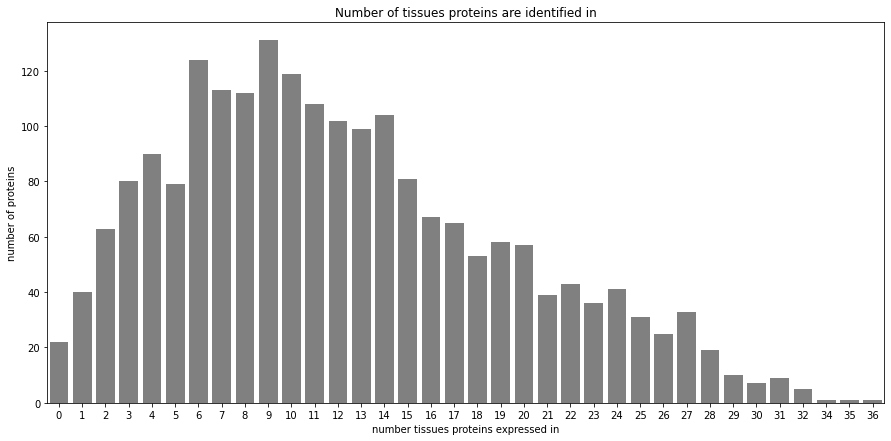

In [48]:
plot = taspec_all_mod.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="grey").set(xlabel="number tissues proteins expressed in",
                                                  ylabel = "number of proteins", title = "Number of tissues proteins are identified in")
#plt.savefig("WP3 tissue aspecific proteins in modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [49]:
plot

Total_nonP  ACC_ID
0            0      22
1            1      40
2            2      63
3            3      80
4            4      90
5            5      79
6            6     124
7            7     113
8            8     112
9            9     131
10          10     119
11          11     108
12          12     102
13          13      99
14          14     104
15          15      81
16          16      67
17          17      65
18          18      53
19          19      58
20          20      57
21          21      39
22          22      43
23          23      36
24          24      41
25          25      31
26          26      25
27          27      33
28          28      19
29          29      10
30          30       7
31          31       9
32          32       5
33          34       1
34          35       1
35          36       1

18 out of 1752 proteins (1,03%) are not found modified in another tissue than the ones they were found phosphorylated in. Most proteins were identified in 5-11 extra tissues. 16 proteins have not been associated with another modification than phosphorylation (0,91%).

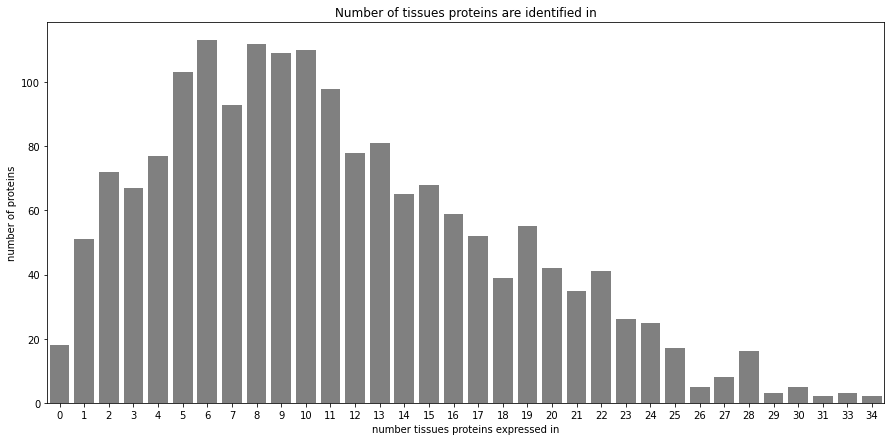

In [50]:
plot = gen_all_mod.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="grey").set(xlabel="number tissues proteins expressed in",
                                                  ylabel = "number of proteins", title = "Number of tissues proteins are identified in")
#plt.savefig("WP3 pervasive proteins in modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [51]:
plot

Total_nonP  ACC_ID
0            0      18
1            1      51
2            2      72
3            3      67
4            4      77
5            5     103
6            6     113
7            7      93
8            8     112
9            9     109
10          10     110
11          11      98
12          12      78
13          13      81
14          14      65
15          15      68
16          16      59
17          17      52
18          18      39
19          19      55
20          20      42
21          21      35
22          22      41
23          23      26
24          24      25
25          25      17
26          26       5
27          27       8
28          28      16
29          29       3
30          30       5
31          31       2
32          33       3
33          34       2

In [52]:
gen_all_mod[gen_all_mod["Total_all_mod"]>35]

ACC_ID  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  Breast_P  \
4     A5A3E0                 1          0        1       0        1         1   
9     A6NMY6                 1          0        1       0        0         1   
88    O43707                 1          0        0       0        0         0   
133   O75369                 0          0        0       0        0         0   
207   P01024                 0          0        1       0        0         0   
210   P01834                 0          0        1       0        1         1   
218   P02042                 0          0        0       0        1         1   
223   P02533                 0          0        1       0        1         1   
224   P02538                 0          0        0       0        0         0   
227   P02671                 0          0        1       0        1         0   
229   P02679                 0          0        1       0        1         0   
233   P02751                 1          0        1       0        0         0   
235   P02768                 0          0        1       0        1         1   
245   P04259                 0          0        0       0        0         0   
246   P04264                 1          0        1       0        1         1   
247   P04350                 1          0        1       0        1         0   
248   P04406                 1          0        1       0        1         0   
269   P06396                 0          0        1       0        1         0   
272   P06733                 0          0        1       0        1         0   
281   P07355                 1          0        1       0        0         1   
282   P07437                 1          0        1       0        1         0   
292   P08238                 1          1        1       1        1         0   
301   P08670                 1          1        1       1        1         0   
324   P0CG38                 1          0        1       0        1         1   
325   P0CG39                 1          0        1       0        1         1   
330   P0DMV8                 0          0        0       0        0         0   
331   P0DMV9                 0          0        0       0        0         0   
350   P11142                 0          0        0       0        0         0   
367   P12814                 1          0        0       0        0         0   
379   P13645                 1          0        1       0        1         1   
385   P13929                 1          0        1       0        1         0   
413   P17066                 0          0        0       0        0         0   
445   P21333                 1          1        1       1        1         0   
524   P34931                 0          0        0       0        0         0   
541   P35908                 1          0        0       0        0         0   
597   P48668                 0          0        0       0        0         0   
674   P60174                 1          0        1       0        1         1   
676   P60709                 1          0        1       0        1         1   
695   P62736                 1          0        1       0        1         1   
714   P63261                 1          0        1       0        1         1   
715   P63267                 1          0        1       0        1         1   
718   P68032                 1          0        1       0        1         1   
720   P68133                 1          0        1       0        1         1   
723   P68371                 1          0        1       0        1         0   
726   P69905                 0          0        1       0        1         1   
776   Q04695                 0          0        1       0        1         0   
787   Q06830                 0          0        0       0        0         0   
855   Q13509                 0          0        1       0        1         0   
876   Q13885                 1       

In [53]:
gen_all_mod[gen_all_mod["Total_all_mod"]>=40]
#KRT14, keratin (40); ALB, albumin(40); KRT1, keratin(41) -> warned as often found as contaminant in proteomics

ACC_ID  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  Breast_P  \
223  P02533                 0          0        1       0        1         1   
235  P02768                 0          0        1       0        1         1   
246  P04264                 1          0        1       0        1         1   

     Cerebrospinal fluid_P  Cervix_P  Colon_P  ...  Synovial tissue_all_mod  \
223                      1         0        0  ...                        0   
235                      1         1        1  ...                        1   
246                      0         0        1  ...                        1   

     T-cells_all_mod  Testis_all_mod  Tooth_all_mod  Umbilical cord_all_mod  \
223                1               1              1                       1   
235                1               1              1                       1   
246                1               1              1                       1   

     Ureter_all_mod  Urinary bladder_all_mod  Urine_all_mod  Total_all_mod  \
223               1                        1              1             40   
235               1                        1              1             40   
246               1                        1              1             41   

     Total_nonP  
223          24  
235          14  
246          25  

[3 rows x 87 columns]

In [54]:
gen_all_mod_20 = gen_all_mod[gen_all_mod["Total_P"]>=20]
print(gen_proteins[gen_proteins["Total"]>=20]["ACC_ID"].nunique())
print(gen_all_mod_20.shape[0])
gen_all_mod_20.head()

75
75


ACC_ID  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  Breast_P  \
4    A5A3E0                 1          0        1       0        1         1   
24   O00264                 1          0        1       0        1         1   
51   O14950                 1          1        1       0        1         0   
97   O43852                 1          1        1       1        1         0   
167  O94979                 1          0        1       0        1         0   

     Cerebrospinal fluid_P  Cervix_P  Colon_P  ...  Synovial tissue_all_mod  \
4                        1         0        1  ...                        1   
24                       1         0        1  ...                        0   
51                       1         0        1  ...                        0   
97                       1         0        1  ...                        0   
167                      1         0        1  ...                        0   

     T-cells_all_mod  Testis_all_mod  Tooth_all_mod  Umbilical cord_all_mod  \
4                  1               1              0                       1   
24                 0               1              0                       1   
51                 0               1              0                       1   
97                 0               1              0                       1   
167                0               1              0                       1   

     Ureter_all_mod  Urinary bladder_all_mod  Urine_all_mod  Total_all_mod  \
4                 1                        1              1             38   
24                1                        1              0             25   
51                1                        1              0             31   
97                1                        1              1             26   
167               0                        1              0             28   

     Total_nonP  
4            15  
24            3  
51           10  
97            5  
167           6  

[5 rows x 87 columns]

All proteins seen phosphorylated are at least found modified in 1 other tissues (other modification), either with 14-16 more tissues or with 4-5 more.

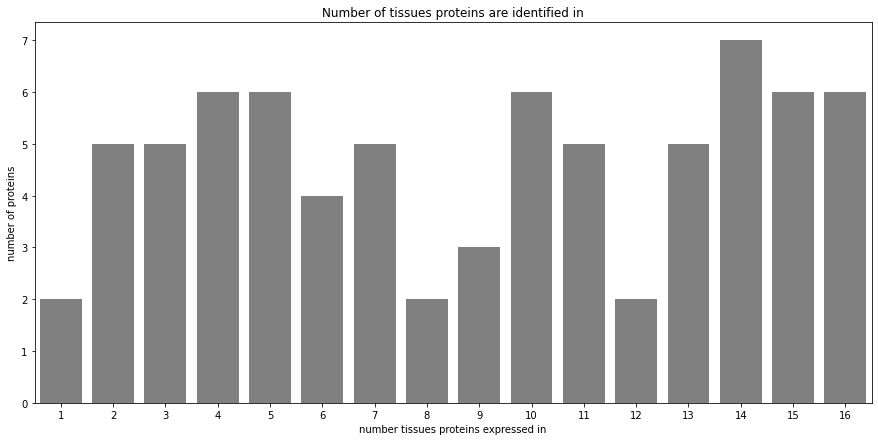

In [55]:
plot = gen_all_mod_20.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="grey").set(xlabel="number tissues proteins expressed in",
                                                  ylabel = "number of proteins", title = "Number of tissues proteins are identified in")
#plt.savefig("WP3 pervasive proteins_20plus in modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [56]:
plot["ACC_ID"].sum()

75

In [57]:
gen_all_mod_20_mod = gen_all_mod_20.copy()
for tissue in list_tissues_STY:
    tissueP = tissue+"_P"
    tissue_all_mod = tissue+"_all_mod"
    gen_all_mod_20_mod.loc[(gen_all_mod_20_mod[tissueP]==1)&(gen_all_mod_20_mod[tissue_all_mod]==1), tissue_all_mod] = 0
gen_all_mod_20_mod

ACC_ID  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  Breast_P  \
4     A5A3E0                 1          0        1       0        1         1   
24    O00264                 1          0        1       0        1         1   
51    O14950                 1          1        1       0        1         0   
97    O43852                 1          1        1       1        1         0   
167   O94979                 1          0        1       0        1         0   
...      ...               ...        ...      ...     ...      ...       ...   
1519  Q9HBL0                 1          0        1       0        1         0   
1568  Q9NYF8                 1          1        1       0        1         0   
1619  Q9UHB6                 1          1        1       0        1         1   
1678  Q9UQ35                 0          1        1       0        1         0   
1703  Q9Y2W1                 1          1        1       0        1         0   

      Cerebrospinal fluid_P  Cervix_P  Colon_P  ...  Synovial tissue_all_mod  \
4                         1         0        1  ...                        1   
24                        1         0        1  ...                        0   
51                        1         0        1  ...                        0   
97                        1         0        1  ...                        0   
167                       1         0        1  ...                        0   
...                     ...       ...      ...  ...                      ...   
1519                      1         0        1  ...                        0   
1568                      1         0        1  ...                        0   
1619                      1         0        1  ...                        0   
1678                      1         0        1  ...                        0   
1703                      1         0        1  ...                        0   

      T-cells_all_mod  Testis_all_mod  Tooth_all_mod  Umbilical cord_all_mod  \
4                   1               0              0                       0   
24                  0               0              0                       0   
51                  0               0              0                       0   
97                  0               0              0                       0   
167                 0               1              0                       0   
...               ...             ...            ...                     ...   
1519                0               0              0                       0   
1568                1               0              0                       0   
1619                0               1              0                       0   
1678                1               0              0                       0   
1703                1               0              0                       0   

      Ureter_all_mod  Urinary bladder_all_mod  Urine_all_mod  Total_all_mod  \
4                  1                        0              1             38   
24                 1                        0              0             25   
51                 1                        0              0             31   
97                 1                        0              1             26   
167                0                        0              0             28   
...              ...                      ...            ...            ...   
1519               0                        0              0             23   
1568               0                        0              0             25   
1619               0                        0              0             26   
1678               0                        0              0             28   
1703               0                        0              1             24   

      Total_nonP  
4             15  
24             3  
51            10  
97             5  
167            6  
...          ...  
1519           3  
1568      

Most proteins identified with a P-site in at least 20 tissues, were found otherwise modified in tissues that contribute few P-sites, but were otherwise well represented.

<AxesSubplot:title={'center':'Number of phosphoproteins having modifications other than phopshorylation'}, xlabel='Tissue'>

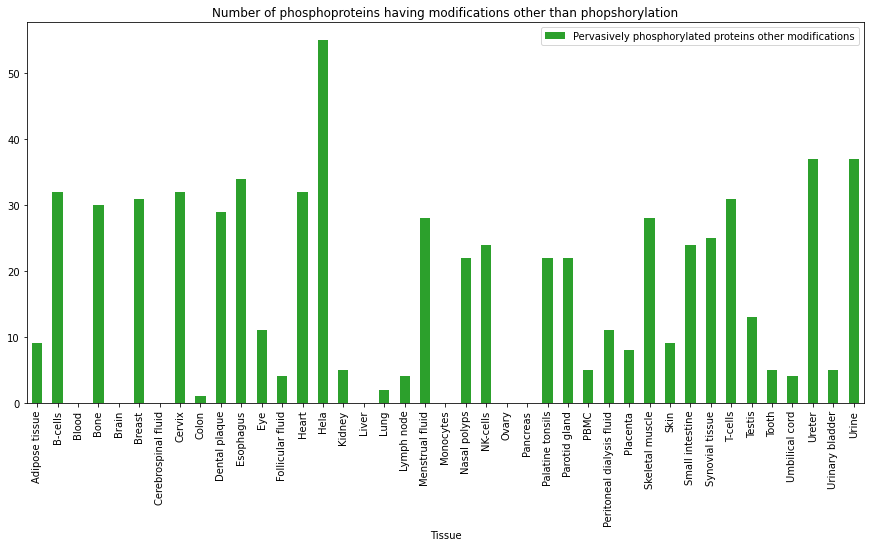

In [58]:
df_gen_all_mod_20_mod_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts = []
for tissue in list_tissues_STY:
    tissue = tissue+"_all_mod"
    count = gen_all_mod_20_mod[tissue].sum()
    list_counts.append(count)
df_gen_all_mod_20_mod_tissues["Pervasively phosphorylated proteins other modifications"] = list_counts
df_gen_all_mod_20_mod_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of phosphoproteins having modifications other than phopshorylation", color="tab:green")
#plt.savefig("WP3 pervasive proteins_10plus other mods distribution across tissues.png", format="png", bbox_inches="tight")

In [59]:
gen_all_mod_20[gen_all_mod_20["Total_nonP"]==0]

Empty DataFrame
Columns: [ACC_ID, Adipose tissue_P, B-cells_P, Blood_P, Bone_P, Brain_P, Breast_P, Cerebrospinal fluid_P, Cervix_P, Colon_P, Dental plaque_P, Esophagus_P, Eye_P, Follicular fluid_P, Heart_P, Hela_P, Kidney_P, Liver_P, Lung_P, Lymph node_P, Menstrual fluid_P, Monocytes_P, Nasal polyps_P, NK-cells_P, Ovary_P, Pancreas_P, Palatine tonsils_P, Parotid gland_P, PBMC_P, Peritoneal dialysis fluid_P, Placenta_P, Skeletal muscle_P, Skin_P, Small intestine_P, Synovial tissue_P, T-cells_P, Testis_P, Tooth_P, Umbilical cord_P, Ureter_P, Urinary bladder_P, Urine_P, Total_P, tissue, Adipose tissue_all_mod, B-cells_all_mod, Blood_all_mod, Bone_all_mod, Brain_all_mod, Breast_all_mod, Cerebrospinal fluid_all_mod, Cervix_all_mod, Colon_all_mod, Dental plaque_all_mod, Esophagus_all_mod, Eye_all_mod, Follicular fluid_all_mod, Heart_all_mod, Hela_all_mod, Kidney_all_mod, Liver_all_mod, Lung_all_mod, Lymph node_all_mod, Menstrual fluid_all_mod, Monocytes_all_mod, Nasal polyps_all_mod, NK-cells_all_mod, Ovary_all_mod, Pancreas_all_mod, Palatine tonsils_all_mod, Parotid gland_all_mod, PBMC_all_mod, Peritoneal dialysis fluid_all_mod, Placenta_all_mod, Skeletal muscle_all_mod, Skin_all_mod, Small intestine_all_mod, Synovial tissue_all_mod, T-cells_all_mod, Testis_all_mod, Tooth_all_mod, Umbilical cord_all_mod, Ureter_all_mod, Urinary bladder_all_mod, Urine_all_mod, Total_all_mod, Total_nonP]
Index: []

[0 rows x 87 columns]

In [60]:
gen_all_mod_20["Total_nonP"].value_counts()

14    7
15    6
10    6
5     6
16    6
4     6
3     5
11    5
13    5
2     5
7     5
6     4
9     3
12    2
8     2
1     2
Name: Total_nonP, dtype: int64

In [61]:
tissue_list_P = []
tissue_list_all_mod = []
for tissue in list_tissues_STY:
    tissue_list_P.append(tissue+"_P")
    tissue_list_all_mod.append(tissue+"_all_mod")
tissue_all_list = tissue_list_P+tissue_list_all_mod

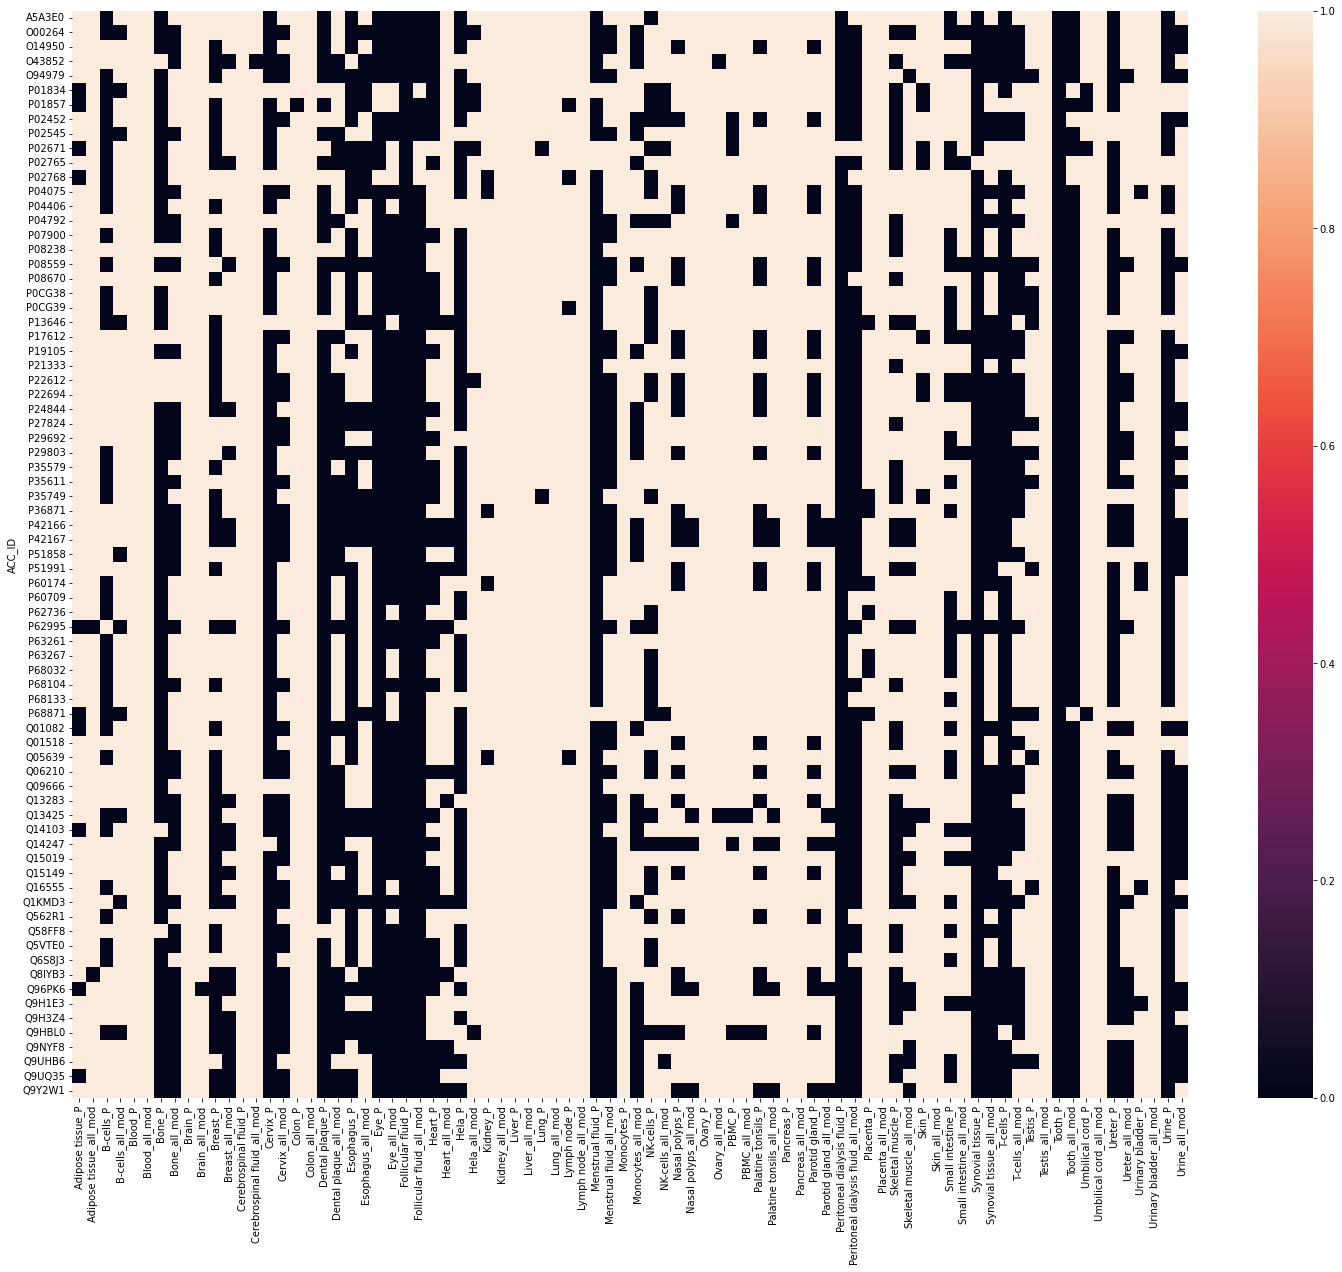

In [62]:
plt.figure(figsize=(25,20))
sns.heatmap(data=gen_all_mod_20.set_index(["ACC_ID"])[sorted(tissue_all_list)])
plt.show()

Clearly, instances where a protein has not been identified as modified in a tissue for the proteins seen phosphorylated in at least 20 tissues, are limited to tissues being less well represented. Possibly, these proteins are present in these tissues, and simply not in our dataset.

In [63]:
for i in range(len(tissue_list_P)):
    print(list_tissues_STY[i], gen_all_mod_20.loc[(gen_all_mod_20[tissue_list_P[i]]==0)&(gen_all_mod_20[tissue_list_all_mod[i]]==0), :]["ACC_ID"].nunique())

Adipose tissue 1
B-cells 7
Blood 0
Bone 36
Brain 0
Breast 18
Cerebrospinal fluid 0
Cervix 37
Colon 0
Dental plaque 39
Esophagus 24
Eye 61
Follicular fluid 71
Heart 11
Hela 5
Kidney 0
Liver 0
Lung 0
Lymph node 0
Menstrual fluid 43
Monocytes 0
Nasal polyps 5
NK-cells 8
Ovary 0
Pancreas 0
Palatine tonsils 5
Parotid gland 5
PBMC 2
Peritoneal dialysis fluid 63
Placenta 0
Skeletal muscle 14
Skin 0
Small intestine 12
Synovial tissue 49
T-cells 38
Testis 0
Tooth 70
Umbilical cord 0
Ureter 27
Urinary bladder 0
Urine 30


We'll now consider whether the tissue-specific phosphorylated proteins have the same modifications as more frequently phosphorymated proteins. For this, we count the amount of proteins having a certain modification, per tissue, and contrast this by the total number of identified proteins in a tissue.

In [64]:
tspecP_allmod = pd.merge(tspec_proteins[["ACC_ID"]], data_all_mod[["ACC_ID", "modification", "tissue", "unimod"]], how="inner", on=["ACC_ID"])
tspecP_allmod_gr = tspecP_allmod.groupby(["ACC_ID", "modification"]).agg({"tissue": lambda x: ",".join(x)}).reset_index()
tspecP_allmod_gr

ACC_ID          modification  \
0      A0A075B6H7    [1009]Thiazolidine   
1      A0A075B6H7           [122]Formyl   
2      A0A075B6H7           [1278]Furan   
3      A0A075B6H7             [129]Iodo   
4      A0A075B6H7           [1304]NeuGc   
...           ...                   ...   
28396      Q9Y6Y8    [4]Carbamidomethyl   
28397      Q9Y6Y8           [5]Carbamyl   
28398      Q9Y6Y8  [928]MercaptoEthanol   
28399      Q9Y6Y8     [936]Chlorination   
28400      Q9Y6Y8       [977]Carbofuran   

                                                  tissue  
0                                                  Urine  
1      Lung,Colon,Menstrual fluid,Testis,Testis,Lung,...  
2                                         Blood,Placenta  
3      PBMC,PBMC,PBMC,PBMC,PBMC,Blood,Blood, Cerebros...  
4                                                  Urine  
...                                                  ...  
28396  Umbilical cord,Umbilical cord,Umbilical cord,U...  
28397                             Placenta,Placenta,Lung  
28398                                              Blood  
28399              Urinary bladder, Colon, Kidney, Liver  
28400  Liver,Urinary bladder, Colon, Kidney, Liver,Pl...  

[28401 rows x 3 columns]

In [65]:
taspecP_allmod = pd.merge(taspec_proteins[["ACC_ID"]], data_all_mod[["ACC_ID", "modification", "tissue", "unimod"]], how="inner", on=["ACC_ID"])
taspecP_allmod_gr = taspecP_allmod.groupby(["ACC_ID", "modification"]).agg({"tissue": lambda x: ",".join(x)}).reset_index()
taspecP_allmod_gr

ACC_ID          modification  \
0      A0A0C4DH36           [122]Formyl   
1      A0A0C4DH36           [1278]Furan   
2      A0A0C4DH36             [1]Acetyl   
3      A0A0C4DH36      [337]Methylamine   
4      A0A0C4DH36            [34]Methyl   
...           ...                   ...   
39015      Q9Y6W5             [40]Sulfo   
39016      Q9Y6W5         [472]AEC-MAEC   
39017      Q9Y6W5    [4]Carbamidomethyl   
39018      Q9Y6W5  [928]MercaptoEthanol   
39019      Q9Y6W5       [977]Carbofuran   

                                                  tissue  
0      Lung,Lung,Blood,Blood,Blood,Blood,Blood,Blood,...  
1                                                  Blood  
2                                               Placenta  
3                                                 Testis  
4      Testis,Blood,Blood,Blood,Blood,Blood,Blood,Blo...  
...                                                  ...  
39015  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...  
39016                                               PBMC  
39017  Liver,PBMC,Umbilical cord,Colon,Colon,Colon,Co...  
39018                                        Brain,Colon  
39019                                               PBMC  

[39020 rows x 3 columns]

In [66]:
genP_allmod = pd.merge(gen_proteins[["ACC_ID"]], data_all_mod[["ACC_ID", "modification", "tissue", "unimod"]], how="inner", on=["ACC_ID"])
genP_allmod_gr = genP_allmod.groupby(["ACC_ID", "modification"]).agg({"tissue": lambda x: ",".join(x)}).reset_index()
genP_allmod_gr

ACC_ID                 modification  \
0      A0A0C4DH39    [1365]N-dimethylphosphate   
1      A0A0C4DH39   [1868]MeMePhosphorothioate   
2      A0A0C4DH39   [1986]Diethylphosphothione   
3      A0A0C4DH39  [1987]Dimethylphosphothione   
4      A0A0C4DH39        [2007]Methamidophos-S   
...           ...                          ...   
55227      Q9Y6Y0                  [5]Carbamyl   
55228      Q9Y6Y0             [898]pyrophospho   
55229      Q9Y6Y0              [926]ethylamino   
55230      Q9Y6Y0         [928]MercaptoEthanol   
55231      Q9Y6Y0              [977]Carbofuran   

                                                  tissue  
0                                                  Blood  
1      Blood,Blood, Cerebrospinal fluid, Liver, Ovary...  
2      Blood, Cerebrospinal fluid, Liver, Ovary, Panc...  
3      Blood,Blood,Blood, Cerebrospinal fluid, Liver,...  
4                                                  Blood  
...                                                  ...  
55227        Liver,Urinary bladder, Colon, Kidney, Liver  
55228                   Lymph node,Lymph node,Lymph node  
55229                                               Skin  
55230                                  Colon,Colon,Colon  
55231  Liver,Liver,Colon,Colon,Colon,Colon,Colon,Colo...  

[55232 rows x 3 columns]

In [67]:
list_mod1 = tspecP_allmod_gr["modification"].to_list()
list_mod1 = sorted(list_mod1)
list_mod = []
for n in list_mod1:
    if n==list_mod1[0] and len(list_mod)==0:
        list_mod.append(n)
    elif n != list_mod[-1]:
        list_mod.append(n)
list_mod

['[1009]Thiazolidine',
 '[1017]DMPO',
 '[1032]2-nitrobenzyl',
 '[1037]Biotin:Thermo-88317',
 '[118]EDT-iodoacetyl-PEO-biotin',
 '[122]Formyl',
 '[1255]Cresylphosphate',
 '[1256]CresylSaligeninPhosphate',
 '[1278]Furan',
 '[1279]Difuran',
 '[129]Iodo',
 '[1303]NeuAc',
 '[1304]NeuGc',
 '[130]Diiodo',
 '[1310]Propiophenone',
 '[1330]bisANS-sulfonates',
 '[1331]DNCB_hapten',
 '[1355]azole',
 '[1364]O-Et-N-diMePhospho',
 '[1365]N-dimethylphosphate',
 '[1367]dHex(1)Hex(1)',
 '[1375]dHex(1)Hex(2)',
 '[1412]s-GlcNAc',
 '[1413]PhosphoHex(2)',
 '[1419]15N-oxobutanoic',
 '[1425]Pentose',
 '[1426]Hex(1)Pent(1)',
 '[1427]Hex(1)HexA(1)',
 '[1428]Hex(1)Pent(2)',
 '[1429]Hex(1)HexNAc(1)Phos(1)',
 '[142]HexNAc(1)dHex(1)',
 '[1430]Hex(1)HexNAc(1)Sulf(1)',
 '[1431]Hex(1)NeuAc(1)',
 '[1432]Hex(1)NeuGc(1)',
 '[1434]HexNAc(1)NeuAc(1)',
 '[143]HexNAc(2)',
 '[144]Hex(3)',
 '[178]DAET',
 '[1801]Fluorescein-tyramine',
 '[1830]Biotin-tyramide',
 '[1843]PhosphoCytidine',
 '[1868]MeMePhosphorothioate',
 '[1875]met

In [68]:
distr_prot = pd.read_csv("number of three categories per tissue.tsv", sep="\t")
distr_prot

Tissue  number of tissue-specific proteins  \
0              Adipose tissue                                   0   
1                     B-cells                                   4   
2                       Blood                                 241   
3                        Bone                                   1   
4                       Brain                                  19   
5                      Breast                                   3   
6         Cerebrospinal fluid                                   1   
7                      Cervix                                   4   
8                       Colon                                 632   
9               Dental plaque                                   6   
10                  Esophagus                                   0   
11                        Eye                                   1   
12           Follicular fluid                                   0   
13                      Heart                                   3   
14                       Hela                                   0   
15                     Kidney                                   3   
16                      Liver                                  40   
17                       Lung                                 228   
18                 Lymph node                                 336   
19            Menstrual fluid                                   1   
20                  Monocytes                                   9   
21               Nasal polyps                                   0   
22                   NK-cells                                   5   
23                      Ovary                                   1   
24                   Pancreas                                  11   
25           Palatine tonsils                                   0   
26              Parotid gland                                   0   
27                       PBMC                                  95   
28  Peritoneal dialysis fluid                                   0   
29                   Placenta                                 131   
30            Skeletal muscle                                  33   
31                       Skin                                  91   
32            Small intestine                                  22   
33            Synovial tissue                                   2   
34                    T-cells                                   0   
35                     Testis                                  66   
36                      Tooth                                   0   
37             Umbilical cord                                  12   
38                     Ureter                                   1   
39            Urinary bladder                                   6   
40                      Urine                                  21   

    number of non tissue-specific proteins  \
0                                       39   
1                                       27   
2                                      966   
3                                        1   
4                                       56   
5                                       10   
6                                       11   
7                                        3   
8                                     1391   
9                                        3   
10                                       2   
11                                       1   
12                                       1   
13                                      15   
14                                      15   
15                                      84   
16                                     197   
17                                     717   
18                                    1113   
19                                       1   
20                                      11   
21                                      12   
22                                      27   
23                  

In [69]:
list_mod.append("[21]Phosphorylation")
list_mod = sorted(list_mod)

In [70]:
list_nr = dict()
for mod in list_mod:
    split = mod.split("]")
    split_nr = split[0][1:]
    split_name = split[1]
    list_nr[int(split_nr)] = split_name
list_nr_sorted = sorted(list_nr)
list_nr2 = dict()
for i in list_nr_sorted:
    list_nr2[i] = list_nr[i]
list_keys = list(list_nr2.keys())
list_vals = list(list_nr2.values())
list_mod_sorted = []
for i, key in enumerate(list_keys):
    list_mod_sorted.append("["+str(key)+"]"+list_vals[i])
list_mod_sorted

['[1]Acetyl',
 '[4]Carbamidomethyl',
 '[5]Carbamyl',
 '[21]Phosphorylation',
 '[23]Dehydrated',
 '[34]Methyl',
 '[35]Oxidation',
 '[40]Sulfo',
 '[41]Hex',
 '[43]HexNAc',
 '[47]Palmitoyl',
 '[49]Phosphopantetheine',
 '[54]Glucuronyl',
 '[58]Propionyl',
 '[118]EDT-iodoacetyl-PEO-biotin',
 '[122]Formyl',
 '[129]Iodo',
 '[130]Diiodo',
 '[142]HexNAc(1)dHex(1)',
 '[143]HexNAc(2)',
 '[144]Hex(3)',
 '[178]DAET',
 '[200]Ethanedithiol',
 '[264]PET',
 '[270]Cytopiloyne',
 '[271]Cytopiloyne+water',
 '[275]Nitrosyl',
 '[276]AEBS',
 '[292]IodoU-AMP',
 '[295]dHex',
 '[327]Delta:H(4)C(2)O(-1)S(1)',
 '[333]Can-FP-biotin',
 '[337]Methylamine',
 '[340]Bromo',
 '[342]Amino',
 '[345]Trioxidation',
 '[354]Nitro',
 '[361]Thrbiotinhydrazide',
 '[362]Diisopropylphosphate',
 '[363]Isopropylphospho',
 '[385]Ammonia-loss',
 '[392]Quinone',
 '[397]Triiodothyronine',
 '[400]Tyr->Dha',
 '[401]Didehydro',
 '[403]Ser->LacticAcid',
 '[405]Phosphoadenosine',
 '[417]PhosphoUridine',
 '[419]Glycerophospho',
 '[425]Dioxida

In [71]:
tspec_modplot = pd.DataFrame({"modification": list_mod_sorted})
i=0
for tissue in list_tissues_STY:
    list_counts = []
    for mod in list_mod_sorted:
        if mod != "[21]Phosphorylation":
            count = tspecP_allmod_gr.loc[(tspecP_allmod_gr["tissue"].str.contains(tissue))&(tspecP_allmod_gr["modification"]==mod),:]["ACC_ID"].nunique()
            list_counts.append(count)
        else:
            count = distr_prot["number of tissue-specific proteins"][i]
            list_counts.append(count)
    colname = "abs_"+tissue
    tspec_modplot[colname] = list_counts
    i+=1
tspec_modplot

modification  abs_Adipose tissue  abs_B-cells  \
0                        [1]Acetyl                  66            5   
1               [4]Carbamidomethyl                 128          108   
2                      [5]Carbamyl                  36            3   
3              [21]Phosphorylation                   0            4   
4                   [23]Dehydrated                  22            3   
..                             ...                 ...          ...   
128  [1989]monomethylphosphothione                   3            5   
129                  [2006]Haloxon                   0            0   
130          [2007]Methamidophos-S                   3            2   
131          [2008]Methamidophos-O                   6            1   
132                  [2014]Nitrene                   3            0   

     abs_Blood  abs_Bone  abs_Brain  abs_Breast  abs_Cerebrospinal fluid  \
0          118        12        115          10                       87   
1          397        11        253          39                      291   
2          112         1         78           7                      110   
3          241         1         19           3                        1   
4          112         1         46           1                       55   
..         ...       ...        ...         ...                      ...   
128         37         0          6           0                       11   
129          6         0          1           0                        3   
130         20         0          6           2                        6   
131         30         1          5           2                        9   
132         26         0          2           8                        8   

     abs_Cervix  abs_Colon  ...  abs_Skin  abs_Small intestine  \
0             4        285  ...        95                   47   
1            15        622  ...       373                   13   
2             3        281  ...        64                   17   
3             4        632  ...        91                   22   
4            25        163  ...        53                   21   
..          ...        ...  ...       ...                  ...   
128           0         46  ...        10                    0   
129           0          4  ...         0                    0   
130           0         15  ...         6                    2   
131           0         23  ...        10                    9   
132           5         47  ...        13                   13   

     abs_Synovial tissue  abs_T-cells  abs_Testis  abs_Tooth  \
0                      1            9         111          2   
1                     37            4         381          3   
2                      7            7         124          0   
3                      2            0          66          0   
4                      3            5         158          1   
..                   ...          ...         ...        ...   
128                    0            1           2          0   
129                    0            1           4          0   
130                    0            0           5          0   
131                    2            2          13          0   
132                    0            7          11          0   

     abs_Umbilical cord  abs_Ureter  abs_Urinary bladder  abs_Urine  
0                   112           3                  232         34  
1                   394           1                  540        121  
2                    71           5                  231         40  
3                    12           1                    6         21  
4                    43           3                  135         30  
..                  ...         ...                  ...        ...  
128                  47           1                   41         27  
129                   2           1                    2          2  
130                   8           1                   13        

In [72]:
for tissue in list_tissues_STY:
    colname = "abs_"+tissue
    tspec_modplot[tissue] = tspec_modplot[colname]/tspec_modplot[colname].sum()
tspec_modplot

modification  abs_Adipose tissue  abs_B-cells  \
0                        [1]Acetyl                  66            5   
1               [4]Carbamidomethyl                 128          108   
2                      [5]Carbamyl                  36            3   
3              [21]Phosphorylation                   0            4   
4                   [23]Dehydrated                  22            3   
..                             ...                 ...          ...   
128  [1989]monomethylphosphothione                   3            5   
129                  [2006]Haloxon                   0            0   
130          [2007]Methamidophos-S                   3            2   
131          [2008]Methamidophos-O                   6            1   
132                  [2014]Nitrene                   3            0   

     abs_Blood  abs_Bone  abs_Brain  abs_Breast  abs_Cerebrospinal fluid  \
0          118        12        115          10                       87   
1          397        11        253          39                      291   
2          112         1         78           7                      110   
3          241         1         19           3                        1   
4          112         1         46           1                       55   
..         ...       ...        ...         ...                      ...   
128         37         0          6           0                       11   
129          6         0          1           0                        3   
130         20         0          6           2                        6   
131         30         1          5           2                        9   
132         26         0          2           8                        8   

     abs_Cervix  abs_Colon  ...      Skin  Small intestine  Synovial tissue  \
0             4        285  ...  0.029558         0.046906         0.006061   
1            15        622  ...  0.116055         0.012974         0.224242   
2             3        281  ...  0.019913         0.016966         0.042424   
3             4        632  ...  0.028314         0.021956         0.012121   
4            25        163  ...  0.016490         0.020958         0.018182   
..          ...        ...  ...       ...              ...              ...   
128           0         46  ...  0.003111         0.000000         0.000000   
129           0          4  ...  0.000000         0.000000         0.000000   
130           0         15  ...  0.001867         0.001996         0.000000   
131           0         23  ...  0.003111         0.008982         0.012121   
132           5         47  ...  0.004045         0.012974         0.000000   

      T-cells    Testis     Tooth  Umbilical cord    Ureter  Urinary bladder  \
0    0.034884  0.030936  0.133333        0.035533  0.021277         0.043059   
1    0.015504  0.106187  0.200000        0.125000  0.007092         0.100223   
2    0.027132  0.034560  0.000000        0.022525  0.035461         0.042873   
3    0.000000  0.018395  0.000000        0.003807  0.007092         0.001114   
4    0.019380  0.044036  0.066667        0.013642  0.021277         0.025056   
..        ...       ...       ...             ...       ...              ...   
128  0.003876  0.000557  0.000000        0.014911  0.007092         0.007610   
129  0.003876  0.001115  0.000000        0.000635  0.007092         0.000371   
130  0.000000  0.001394  0.000000        0.002538  0.007092         0.002413   
131  0.007752  0.003623  0.000000        0.008249  0.000000         0.002598   
132  0.027132  0.003066  0.000000        0.001586  0.000000         0.010765   

        Urine  
0    0.019037  
1    0.067749  
2    0.022396  
3    0.011758  
4    0.016797  
..        ...  
128  0.015118  
129  0.001120  
130  0.003919  
131  0.006719  
132  0.007279  

[133 rows x 83 columns]

Clearly, some modifications occur more frequently than others, although some modifications are more frequent in a specific tissue.

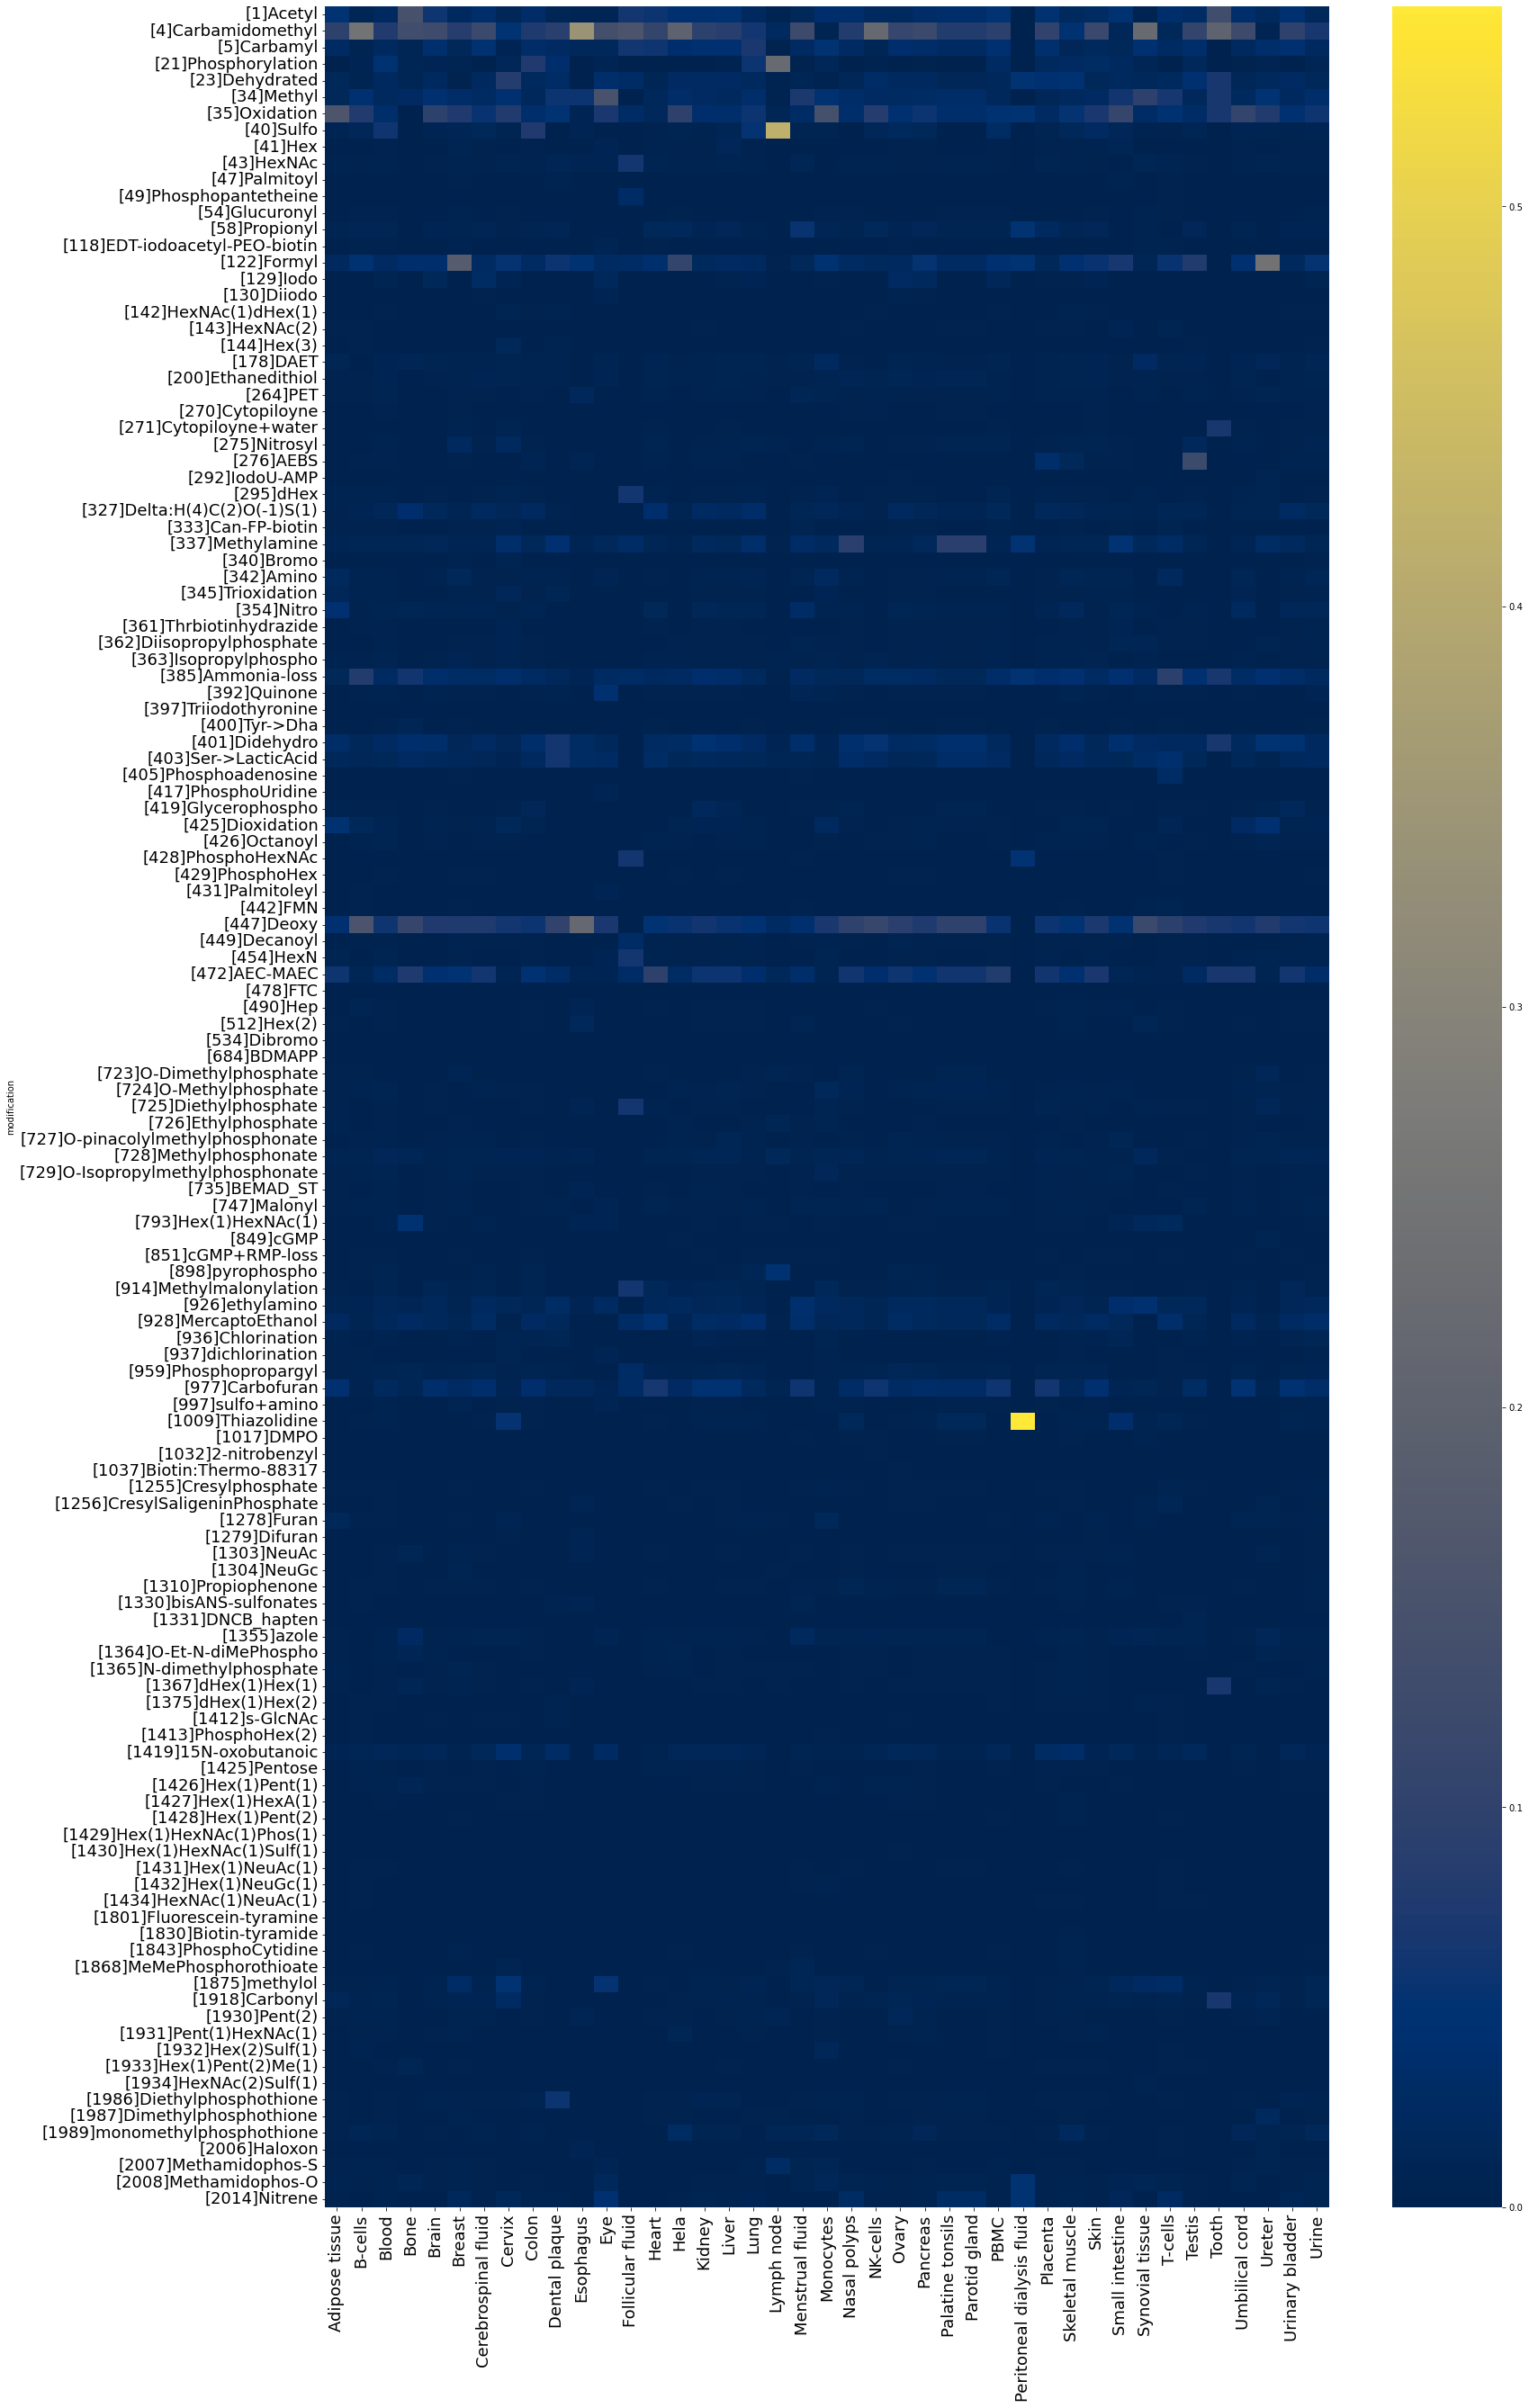

In [73]:
plt.figure(figsize=(25,45))
res = sns.heatmap(data=tspec_modplot.set_index(["modification"])[list_tissues_STY], yticklabels=True, cmap="cividis")
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
#plt.savefig("tspecproteins_othermods.png", format="png", bbox_inches="tight")
plt.show()

In [74]:
list_mod1 = taspecP_allmod_gr["modification"].to_list()
list_mod1 = sorted(list_mod1)
list_mod = []
for n in list_mod1:
    if n==list_mod1[0] and len(list_mod)==0:
        list_mod.append(n)
    elif n != list_mod[-1]:
        list_mod.append(n)
list_mod

['[1009]Thiazolidine',
 '[1017]DMPO',
 '[1032]2-nitrobenzyl',
 '[1037]Biotin:Thermo-88317',
 '[118]EDT-iodoacetyl-PEO-biotin',
 '[122]Formyl',
 '[1255]Cresylphosphate',
 '[1256]CresylSaligeninPhosphate',
 '[1278]Furan',
 '[1279]Difuran',
 '[129]Iodo',
 '[1303]NeuAc',
 '[1304]NeuGc',
 '[130]Diiodo',
 '[1310]Propiophenone',
 '[131]Triiodo',
 '[1330]bisANS-sulfonates',
 '[1331]DNCB_hapten',
 '[1355]azole',
 '[1364]O-Et-N-diMePhospho',
 '[1365]N-dimethylphosphate',
 '[1367]dHex(1)Hex(1)',
 '[1375]dHex(1)Hex(2)',
 '[1412]s-GlcNAc',
 '[1413]PhosphoHex(2)',
 '[1419]15N-oxobutanoic',
 '[1425]Pentose',
 '[1426]Hex(1)Pent(1)',
 '[1427]Hex(1)HexA(1)',
 '[1428]Hex(1)Pent(2)',
 '[1429]Hex(1)HexNAc(1)Phos(1)',
 '[142]HexNAc(1)dHex(1)',
 '[1430]Hex(1)HexNAc(1)Sulf(1)',
 '[1431]Hex(1)NeuAc(1)',
 '[1432]Hex(1)NeuGc(1)',
 '[1434]HexNAc(1)NeuAc(1)',
 '[143]HexNAc(2)',
 '[144]Hex(3)',
 '[178]DAET',
 '[1801]Fluorescein-tyramine',
 '[1830]Biotin-tyramide',
 '[1843]PhosphoCytidine',
 '[1868]MeMePhosphorothio

In [75]:
list_mod.append("[21]Phosphorylation")
list_mod = sorted(list_mod)

In [76]:
list_nr = dict()
for mod in list_mod:
    split = mod.split("]")
    split_nr = split[0][1:]
    split_name = split[1]
    list_nr[int(split_nr)] = split_name
list_nr_sorted = sorted(list_nr)
list_nr2 = dict()
for i in list_nr_sorted:
    list_nr2[i] = list_nr[i]
list_keys = list(list_nr2.keys())
list_vals = list(list_nr2.values())
list_mod_sorted = []
for i, key in enumerate(list_keys):
    list_mod_sorted.append("["+str(key)+"]"+list_vals[i])
list_mod_sorted

['[1]Acetyl',
 '[4]Carbamidomethyl',
 '[5]Carbamyl',
 '[21]Phosphorylation',
 '[23]Dehydrated',
 '[34]Methyl',
 '[35]Oxidation',
 '[40]Sulfo',
 '[41]Hex',
 '[43]HexNAc',
 '[47]Palmitoyl',
 '[49]Phosphopantetheine',
 '[54]Glucuronyl',
 '[58]Propionyl',
 '[118]EDT-iodoacetyl-PEO-biotin',
 '[122]Formyl',
 '[129]Iodo',
 '[130]Diiodo',
 '[131]Triiodo',
 '[142]HexNAc(1)dHex(1)',
 '[143]HexNAc(2)',
 '[144]Hex(3)',
 '[178]DAET',
 '[200]Ethanedithiol',
 '[264]PET',
 '[270]Cytopiloyne',
 '[271]Cytopiloyne+water',
 '[275]Nitrosyl',
 '[276]AEBS',
 '[292]IodoU-AMP',
 '[295]dHex',
 '[327]Delta:H(4)C(2)O(-1)S(1)',
 '[333]Can-FP-biotin',
 '[337]Methylamine',
 '[340]Bromo',
 '[342]Amino',
 '[345]Trioxidation',
 '[354]Nitro',
 '[361]Thrbiotinhydrazide',
 '[362]Diisopropylphosphate',
 '[363]Isopropylphospho',
 '[385]Ammonia-loss',
 '[392]Quinone',
 '[400]Tyr->Dha',
 '[401]Didehydro',
 '[403]Ser->LacticAcid',
 '[405]Phosphoadenosine',
 '[417]PhosphoUridine',
 '[419]Glycerophospho',
 '[425]Dioxidation',
 '

In [77]:
taspec_modplot = pd.DataFrame({"modification": list_mod_sorted})
i=0
for tissue in list_tissues_STY:
    list_counts = []
    for mod in list_mod_sorted:
        if mod != "[21]Phosphorylation":
            count = taspecP_allmod_gr.loc[(taspecP_allmod_gr["tissue"].str.contains(tissue))&(taspecP_allmod_gr["modification"]==mod),:]["ACC_ID"].nunique()
            list_counts.append(count)
        else:
            count = distr_prot["number of non tissue-specific proteins"][i]
            list_counts.append(count)
    colname = "abs_"+tissue
    taspec_modplot[colname] = list_counts
    i+=1
taspec_modplot

modification  abs_Adipose tissue  abs_B-cells  \
0                        [1]Acetyl                  93           15   
1               [4]Carbamidomethyl                 239          242   
2                      [5]Carbamyl                  55           13   
3              [21]Phosphorylation                  39           27   
4                   [23]Dehydrated                  43           13   
..                             ...                 ...          ...   
128  [1989]monomethylphosphothione                  21            5   
129                  [2006]Haloxon                   1            1   
130          [2007]Methamidophos-S                   6            0   
131          [2008]Methamidophos-O                  14            1   
132                  [2014]Nitrene                   9            2   

     abs_Blood  abs_Bone  abs_Brain  abs_Breast  abs_Cerebrospinal fluid  \
0          138        13        142          14                      104   
1          577        37        338          66                      370   
2          139        10        108          12                      126   
3          966         1         56          10                       11   
4          123         4        105           8                       76   
..         ...       ...        ...         ...                      ...   
128         60         0         22           5                       22   
129         13         0          0           2                        3   
130         30         0         11           3                       13   
131         54         1          9           4                       16   
132         26         2         12           4                       16   

     abs_Cervix  abs_Colon  ...  abs_Skin  abs_Small intestine  \
0             9        384  ...       126                   45   
1            30        880  ...       573                   26   
2             3        397  ...       100                   29   
3             3       1391  ...       163                   41   
4            29        253  ...       103                   50   
..          ...        ...  ...       ...                  ...   
128           4         88  ...        14                    2   
129           0          7  ...         1                    1   
130           1         32  ...        14                    3   
131           2         37  ...        21                    8   
132           2         57  ...        35                   23   

     abs_Synovial tissue  abs_T-cells  abs_Testis  abs_Tooth  \
0                      3           15         142          0   
1                     43           10         626          1   
2                      1           14         223          1   
3                      0            2         126          0   
4                      5            7         287          0   
..                   ...          ...         ...        ...   
128                    1            0          13          0   
129                    0            0           0          0   
130                    0            0           5          0   
131                    1            1          10          0   
132                    1            1          14          0   

     abs_Umbilical cord  abs_Ureter  abs_Urinary bladder  abs_Urine  
0                   174           4                  310         31  
1                   655           5                  761        128  
2                   118           6                  344         30  
3                   105           1                   93         25  
4                    89           7                  227         24  
..                  ...         ...                  ...        ...  
128                  94           0                   73         20  
129                   3           0                    8          0  
130                  16           0                   22        

In [78]:
for tissue in list_tissues_STY:
    colname = "abs_"+tissue
    taspec_modplot[tissue] = taspec_modplot[colname]/taspec_modplot[colname].sum()
taspec_modplot

modification  abs_Adipose tissue  abs_B-cells  \
0                        [1]Acetyl                  93           15   
1               [4]Carbamidomethyl                 239          242   
2                      [5]Carbamyl                  55           13   
3              [21]Phosphorylation                  39           27   
4                   [23]Dehydrated                  43           13   
..                             ...                 ...          ...   
128  [1989]monomethylphosphothione                  21            5   
129                  [2006]Haloxon                   1            1   
130          [2007]Methamidophos-S                   6            0   
131          [2008]Methamidophos-O                  14            1   
132                  [2014]Nitrene                   9            2   

     abs_Blood  abs_Bone  abs_Brain  abs_Breast  abs_Cerebrospinal fluid  \
0          138        13        142          14                      104   
1          577        37        338          66                      370   
2          139        10        108          12                      126   
3          966         1         56          10                       11   
4          123         4        105           8                       76   
..         ...       ...        ...         ...                      ...   
128         60         0         22           5                       22   
129         13         0          0           2                        3   
130         30         0         11           3                       13   
131         54         1          9           4                       16   
132         26         2         12           4                       16   

     abs_Cervix  abs_Colon  ...      Skin  Small intestine  Synovial tissue  \
0             9        384  ...  0.023217         0.033259         0.018868   
1            30        880  ...  0.105583         0.019217         0.270440   
2             3        397  ...  0.018426         0.021434         0.006289   
3             3       1391  ...  0.030035         0.030303         0.000000   
4            29        253  ...  0.018979         0.036955         0.031447   
..          ...        ...  ...       ...              ...              ...   
128           4         88  ...  0.002580         0.001478         0.006289   
129           0          7  ...  0.000184         0.000739         0.000000   
130           1         32  ...  0.002580         0.002217         0.000000   
131           2         37  ...  0.003870         0.005913         0.006289   
132           2         57  ...  0.006449         0.016999         0.006289   

      T-cells    Testis  Tooth  Umbilical cord    Ureter  Urinary bladder  \
0    0.065789  0.025530   0.00        0.029244  0.015209         0.036848   
1    0.043860  0.112549   0.05        0.110084  0.019011         0.090455   
2    0.061404  0.040093   0.05        0.019832  0.022814         0.040889   
3    0.008772  0.022654   0.00        0.017647  0.003802         0.011054   
4    0.030702  0.051600   0.00        0.014958  0.026616         0.026982   
..        ...       ...    ...             ...       ...              ...   
128  0.000000  0.002337   0.00        0.015798  0.000000         0.008677   
129  0.000000  0.000000   0.00        0.000504  0.000000         0.000951   
130  0.000000  0.000899   0.00        0.002689  0.000000         0.002615   
131  0.004386  0.001798   0.00        0.004370  0.011407         0.003804   
132  0.004386  0.002517   0.00        0.002353  0.000000         0.010460   

        Urine  
0    0.020301  
1    0.083824  
2    0.019646  
3    0.016372  
4    0.015717  
..        ...  
128  0.013098  
129  0.000000  
130  0.002620  
131  0.001965  
132  0.003274  

[133 rows x 83 columns]

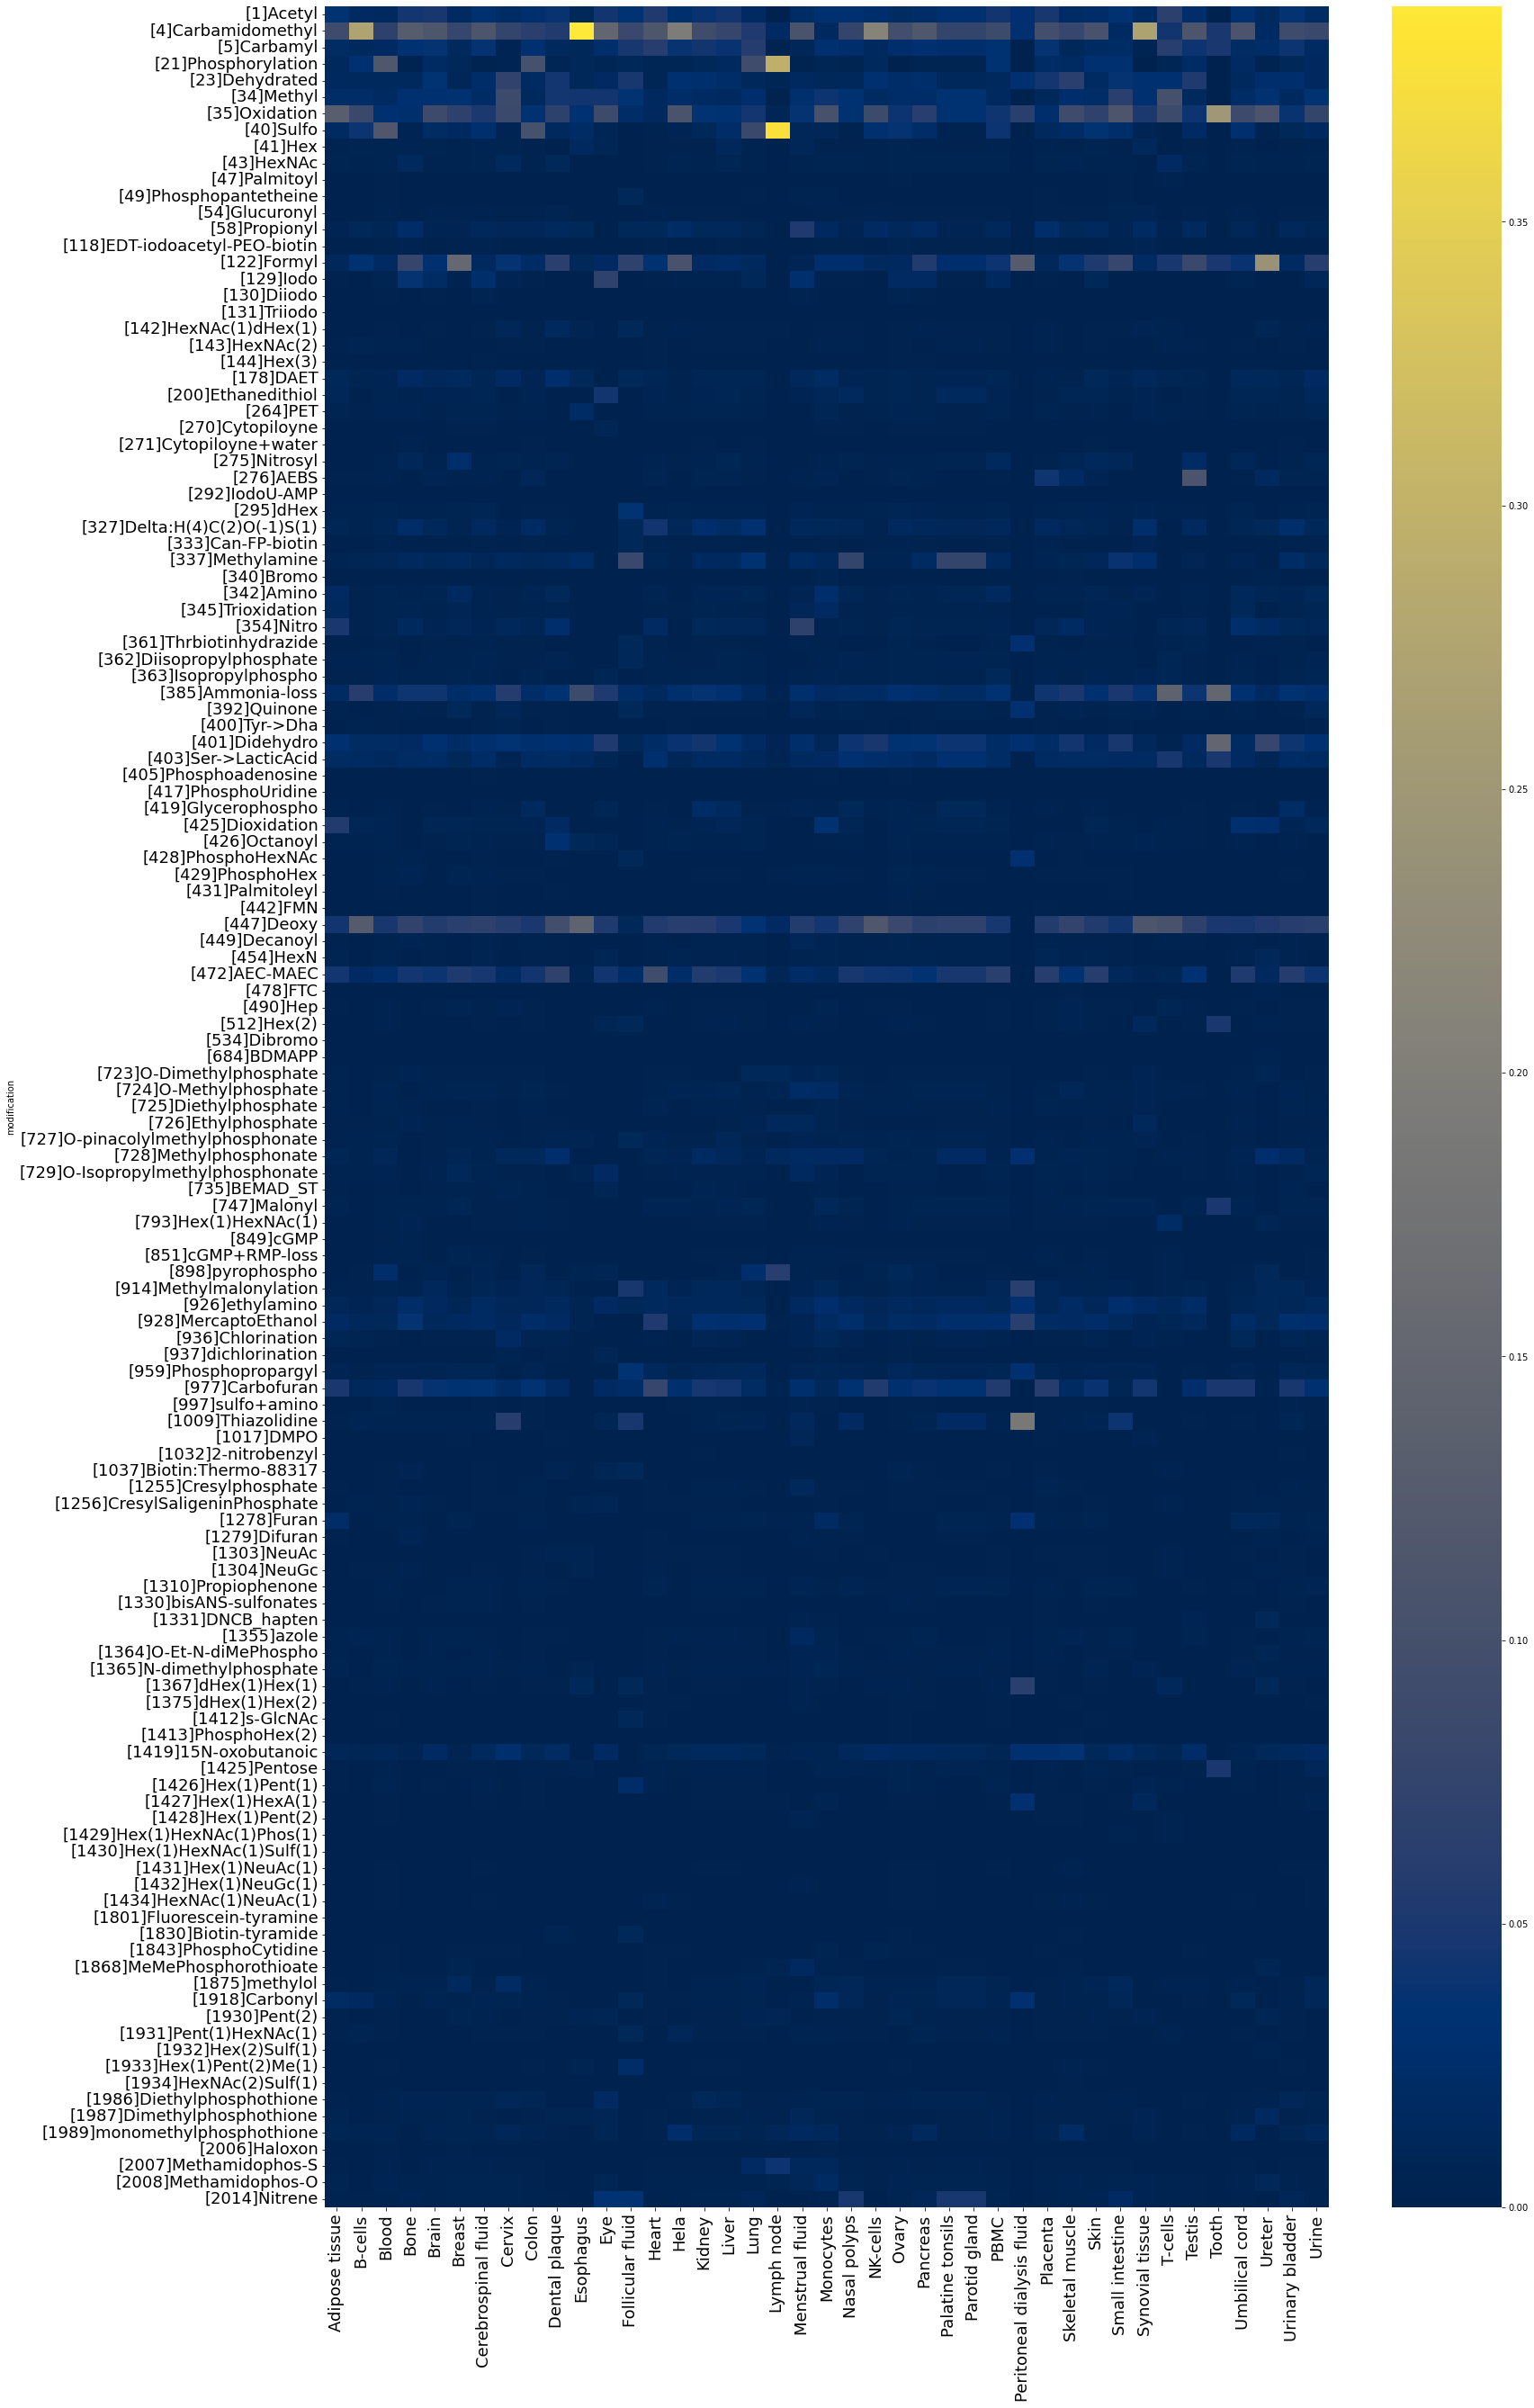

In [79]:
plt.figure(figsize=(25,45))
res = sns.heatmap(data=taspec_modplot.set_index(["modification"])[list_tissues_STY], yticklabels=True, cmap="cividis")
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
#plt.savefig("taspecproteins_othermods.png", format="png", bbox_inches="tight")
plt.show()

In [80]:
list_mod1 = genP_allmod_gr["modification"].to_list()
list_mod1 = sorted(list_mod1)
list_mod = []
for n in list_mod1:
    if n==list_mod1[0] and len(list_mod)==0:
        list_mod.append(n)
    elif n != list_mod[-1]:
        list_mod.append(n)
list_mod

['[1009]Thiazolidine',
 '[1017]DMPO',
 '[1032]2-nitrobenzyl',
 '[1037]Biotin:Thermo-88317',
 '[118]EDT-iodoacetyl-PEO-biotin',
 '[122]Formyl',
 '[1255]Cresylphosphate',
 '[1256]CresylSaligeninPhosphate',
 '[1278]Furan',
 '[1279]Difuran',
 '[129]Iodo',
 '[1303]NeuAc',
 '[1304]NeuGc',
 '[130]Diiodo',
 '[1310]Propiophenone',
 '[131]Triiodo',
 '[1330]bisANS-sulfonates',
 '[1331]DNCB_hapten',
 '[1355]azole',
 '[1364]O-Et-N-diMePhospho',
 '[1365]N-dimethylphosphate',
 '[1367]dHex(1)Hex(1)',
 '[1375]dHex(1)Hex(2)',
 '[1412]s-GlcNAc',
 '[1413]PhosphoHex(2)',
 '[1419]15N-oxobutanoic',
 '[1425]Pentose',
 '[1426]Hex(1)Pent(1)',
 '[1427]Hex(1)HexA(1)',
 '[1428]Hex(1)Pent(2)',
 '[1429]Hex(1)HexNAc(1)Phos(1)',
 '[142]HexNAc(1)dHex(1)',
 '[1430]Hex(1)HexNAc(1)Sulf(1)',
 '[1431]Hex(1)NeuAc(1)',
 '[1432]Hex(1)NeuGc(1)',
 '[1434]HexNAc(1)NeuAc(1)',
 '[143]HexNAc(2)',
 '[144]Hex(3)',
 '[178]DAET',
 '[1801]Fluorescein-tyramine',
 '[1830]Biotin-tyramide',
 '[1843]PhosphoCytidine',
 '[1868]MeMePhosphorothio

In [81]:
list_mod.append("[21]Phosphorylation")
list_mod = sorted(list_mod)

In [82]:
list_nr = dict()
for mod in list_mod:
    split = mod.split("]")
    split_nr = split[0][1:]
    split_name = split[1]
    list_nr[int(split_nr)] = split_name
list_nr_sorted = sorted(list_nr)
list_nr2 = dict()
for i in list_nr_sorted:
    list_nr2[i] = list_nr[i]
list_keys = list(list_nr2.keys())
list_vals = list(list_nr2.values())
list_mod_sorted = []
for i, key in enumerate(list_keys):
    list_mod_sorted.append("["+str(key)+"]"+list_vals[i])
list_mod_sorted

['[1]Acetyl',
 '[4]Carbamidomethyl',
 '[5]Carbamyl',
 '[21]Phosphorylation',
 '[23]Dehydrated',
 '[34]Methyl',
 '[35]Oxidation',
 '[40]Sulfo',
 '[41]Hex',
 '[43]HexNAc',
 '[47]Palmitoyl',
 '[49]Phosphopantetheine',
 '[54]Glucuronyl',
 '[58]Propionyl',
 '[118]EDT-iodoacetyl-PEO-biotin',
 '[122]Formyl',
 '[129]Iodo',
 '[130]Diiodo',
 '[131]Triiodo',
 '[142]HexNAc(1)dHex(1)',
 '[143]HexNAc(2)',
 '[144]Hex(3)',
 '[178]DAET',
 '[200]Ethanedithiol',
 '[264]PET',
 '[270]Cytopiloyne',
 '[271]Cytopiloyne+water',
 '[275]Nitrosyl',
 '[276]AEBS',
 '[292]IodoU-AMP',
 '[295]dHex',
 '[327]Delta:H(4)C(2)O(-1)S(1)',
 '[333]Can-FP-biotin',
 '[337]Methylamine',
 '[340]Bromo',
 '[342]Amino',
 '[345]Trioxidation',
 '[354]Nitro',
 '[361]Thrbiotinhydrazide',
 '[362]Diisopropylphosphate',
 '[363]Isopropylphospho',
 '[385]Ammonia-loss',
 '[392]Quinone',
 '[397]Triiodothyronine',
 '[400]Tyr->Dha',
 '[401]Didehydro',
 '[403]Ser->LacticAcid',
 '[405]Phosphoadenosine',
 '[417]PhosphoUridine',
 '[419]Glycerophospho

In [83]:
gen_modplot = pd.DataFrame({"modification": list_mod_sorted})
i=0
for tissue in list_tissues_STY:
    list_counts = []
    for mod in list_mod_sorted:
        if mod != "[21]Phosphorylation":
            count = genP_allmod_gr.loc[(genP_allmod_gr["tissue"].str.contains(tissue))&(genP_allmod_gr["modification"]==mod),:]["ACC_ID"].nunique()
            list_counts.append(count)
        else:
            count = distr_prot["number of generally expressed proteins"][i]
            list_counts.append(count)
    colname = "abs_"+tissue
    gen_modplot[colname] = list_counts
    i+=1
gen_modplot

modification  abs_Adipose tissue  abs_B-cells  \
0                        [1]Acetyl                 192           41   
1               [4]Carbamidomethyl                 427          353   
2                      [5]Carbamyl                 191           39   
3              [21]Phosphorylation                 311          202   
4                   [23]Dehydrated                 121           60   
..                             ...                 ...          ...   
129  [1989]monomethylphosphothione                  64           32   
130                  [2006]Haloxon                   2            1   
131          [2007]Methamidophos-S                  31            4   
132          [2008]Methamidophos-O                  48            0   
133                  [2014]Nitrene                  64            8   

     abs_Blood  abs_Bone  abs_Brain  abs_Breast  abs_Cerebrospinal fluid  \
0          275        55        325          53                      294   
1          819        83        597         150                      633   
2          269        32        310          56                      309   
3         1530         9        951          74                      872   
4          255        24        271          28                      228   
..         ...       ...        ...         ...                      ...   
129        159         1         82          22                       80   
130         20         0          4           1                       11   
131         68         2         27          23                       34   
132        111         2         42          19                       58   
133         65         4         59          23                       60   

     abs_Cervix  abs_Colon  ...  abs_Skin  abs_Small intestine  \
0            12        551  ...       285                  113   
1            82       1001  ...       780                   43   
2            18        562  ...       240                   53   
3            11       1274  ...       521                  151   
4            70        429  ...       237                  103   
..          ...        ...  ...       ...                  ...   
129          11        199  ...        82                    7   
130           1         18  ...        10                    1   
131           3        153  ...        67                    7   
132           3        108  ...        67                   41   
133          16        171  ...       117                   81   

     abs_Synovial tissue  abs_T-cells  abs_Testis  abs_Tooth  \
0                     12           51         264          0   
1                    105           36         774          4   
2                      9           26         368          3   
3                      9            8         497          1   
4                      6           14         487          2   
..                   ...          ...         ...        ...   
129                    1            0          39          0   
130                    0            0           1          0   
131                    1            0          25          0   
132                    0            0          18          0   
133                    1            9          39          0   

     abs_Umbilical cord  abs_Ureter  abs_Urinary bladder  abs_Urine  
0                   309          12                  463         78  
1                   825          16                  910        174  
2                   308          46                  523         65  
3                   523          26                  479         35  
4                   226          25                  358         47  
..                  ...         ...                  ...        ...  
129                 226           4                  150         31  
130                   8           1                   16          3  
131                  50           6                   57        

In [84]:
for tissue in list_tissues_STY:
    colname = "abs_"+tissue
    gen_modplot[tissue] = gen_modplot[colname]/gen_modplot[colname].sum()
gen_modplot

modification  abs_Adipose tissue  abs_B-cells  \
0                        [1]Acetyl                 192           41   
1               [4]Carbamidomethyl                 427          353   
2                      [5]Carbamyl                 191           39   
3              [21]Phosphorylation                 311          202   
4                   [23]Dehydrated                 121           60   
..                             ...                 ...          ...   
129  [1989]monomethylphosphothione                  64           32   
130                  [2006]Haloxon                   2            1   
131          [2007]Methamidophos-S                  31            4   
132          [2008]Methamidophos-O                  48            0   
133                  [2014]Nitrene                  64            8   

     abs_Blood  abs_Bone  abs_Brain  abs_Breast  abs_Cerebrospinal fluid  \
0          275        55        325          53                      294   
1          819        83        597         150                      633   
2          269        32        310          56                      309   
3         1530         9        951          74                      872   
4          255        24        271          28                      228   
..         ...       ...        ...         ...                      ...   
129        159         1         82          22                       80   
130         20         0          4           1                       11   
131         68         2         27          23                       34   
132        111         2         42          19                       58   
133         65         4         59          23                       60   

     abs_Cervix  abs_Colon  ...      Skin  Small intestine  Synovial tissue  \
0            12        551  ...  0.021861         0.032735         0.030612   
1            82       1001  ...  0.059830         0.012457         0.267857   
2            18        562  ...  0.018409         0.015353         0.022959   
3            11       1274  ...  0.039963         0.043743         0.022959   
4            70        429  ...  0.018179         0.029838         0.015306   
..          ...        ...  ...       ...              ...              ...   
129          11        199  ...  0.006290         0.002028         0.002551   
130           1         18  ...  0.000767         0.000290         0.000000   
131           3        153  ...  0.005139         0.002028         0.002551   
132           3        108  ...  0.005139         0.011877         0.000000   
133          16        171  ...  0.008974         0.023465         0.002551   

      T-cells    Testis     Tooth  Umbilical cord    Ureter  Urinary bladder  \
0    0.071831  0.025145  0.000000        0.022706  0.010840         0.028792   
1    0.050704  0.073721  0.054795        0.060622  0.014453         0.056589   
2    0.036620  0.035051  0.041096        0.022632  0.041554         0.032523   
3    0.011268  0.047338  0.013699        0.038430  0.023487         0.029787   
4    0.019718  0.046385  0.027397        0.016607  0.022584         0.022262   
..        ...       ...       ...             ...       ...              ...   
129  0.000000  0.003715  0.000000        0.016607  0.003613         0.009328   
130  0.000000  0.000095  0.000000        0.000588  0.000903         0.000995   
131  0.000000  0.002381  0.000000        0.003674  0.005420         0.003545   
132  0.000000  0.001714  0.000000        0.005878  0.023487         0.006219   
133  0.012676  0.003715  0.000000        0.005732  0.000000         0.012624   

        Urine  
0    0.026850  
1    0.059897  
2    0.022375  
3    0.012048  
4    0.016179  
..        ...  
129  0.010671  
130  0.001033  
131  0.002754  
132  0.004819  
133  0.005852  

[134 rows x 83 columns]

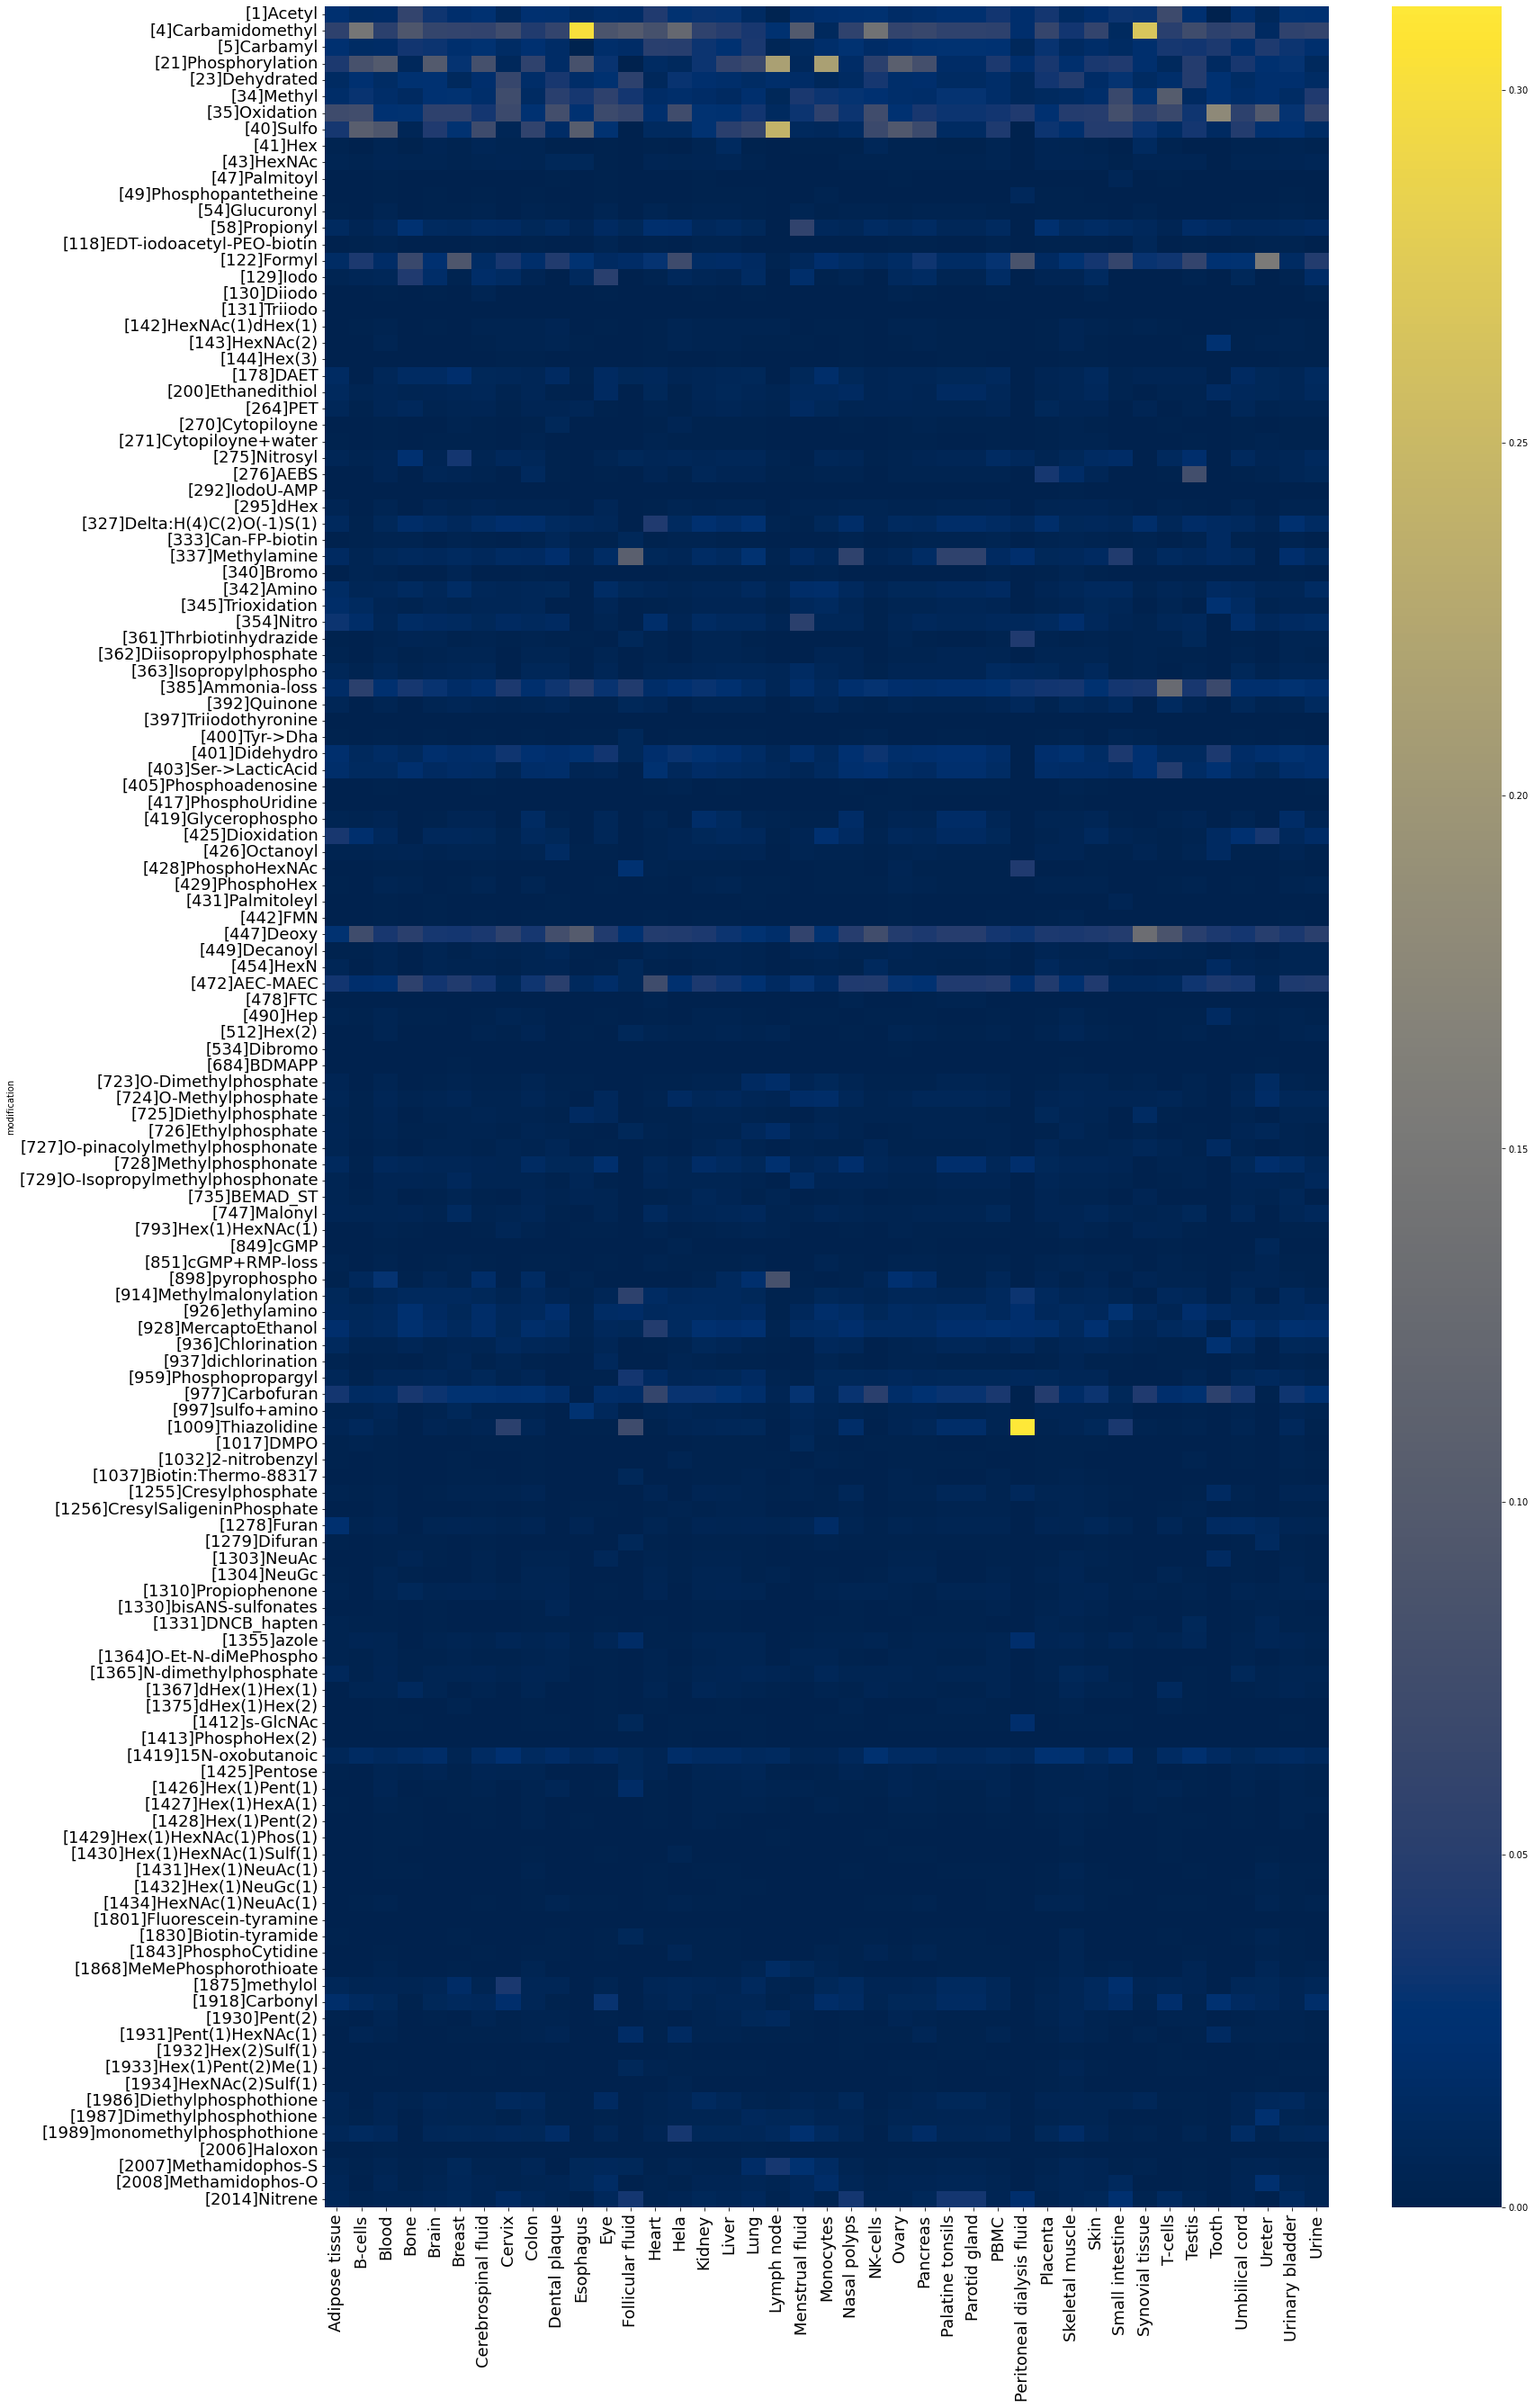

In [85]:
plt.figure(figsize=(25,45))
res = sns.heatmap(data=gen_modplot.set_index(["modification"])[list_tissues_STY], yticklabels=True, cmap="cividis")
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
#plt.savefig("genproteins_othermods.png", format="png", bbox_inches="tight")
plt.show()

# Phosphosite level

We repeat the same analysis on the P-site level.

In [86]:
data_all_mod_res_mod = data_all_mod.groupby(["ACC_ID", "UP_POS", "unimod"], as_index=False).agg({"modification": "first", "tissue": lambda x: ",".join(x)})

In [87]:
data_all_mod_res = data_all_mod.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"tissue": lambda x: ",".join(x)})

In [88]:
print(data_all_mod_res_mod.shape[0])
print(data_all_mod_res.shape[0])

499814
196137


In [89]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
for tissue in list_tissues_STY:
    data_all_mod_res[tissue] = data_all_mod_res["tissue"].str.contains(tissue)
data_all_mod_res.replace({True:1, False:0}, inplace=True)
data_all_mod_res["Total"] = data_all_mod_res[list_tissues_STY].sum(axis=1)
data_all_mod_res.head()

ACC_ID  UP_POS                                             tissue  \
0  A0A024RBG1      28                        Kidney,Testis,Testis,Testis   
1  A0A024RBG1      39                                     Umbilical cord   
2  A0A024RBG1      68                                Liver,Testis,Testis   
3  A0A024RBG1     140                                      Testis,Testis   
4  A0A075B6H7      25  PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,P...   

   Adipose tissue  B-cells  Blood  Bone  Brain  Breast  Cerebrospinal fluid  \
0               0        0      0     0      0       0                    0   
1               0        0      0     0      0       0                    0   
2               0        0      0     0      0       0                    0   
3               0        0      0     0      0       0                    0   
4               0        0      1     0      0       0                    1   

   ...  Small intestine  Synovial tissue  T-cells  Testis  Tooth  \
0  ...                0                0        0       1      0   
1  ...                0                0        0       0      0   
2  ...                0                0        0       1      0   
3  ...                0                0        0       1      0   
4  ...                1                1        1       1      0   

   Umbilical cord  Ureter  Urinary bladder  Urine  Total  
0               0       0                0      0      2  
1               1       0                0      0      1  
2               0       0                0      0      2  
3               0       0                0      0      1  
4               0       0                1      1     24  

[5 rows x 45 columns]

In [90]:
data_all_mod_res["Total"].value_counts()

1     94475
2     27538
4     16313
3     13113
5     11529
6      7158
7      4854
8      3791
9      3051
10     2260
11     1843
12     1553
13     1259
14     1110
15      948
16      758
17      702
18      622
19      455
20      425
21      422
22      391
23      286
24      256
25      237
26      177
27      143
30       82
28       81
29       80
32       64
31       48
34       39
35       24
33       22
37       18
38        6
36        4
Name: Total, dtype: int64

In [91]:
data_Psite = pd.read_csv("site_data", sep="\t")
data_Psite

ACC_ID  UP_POS                                             tissue  \
0      A0A075B6H7      30                                               Lung   
1      A0A075B6S5      52                                    Menstrual fluid   
2      A0A087WXM9     223                                             Testis   
3      A0A0B4J2D5     124                                               PBMC   
4      A0A0B4J2D5     145                                               PBMC   
...           ...     ...                                                ...   
23898      Q9Y6Y0     326                              Lymph node,Lymph node   
23899      Q9Y6Y0     336                                              Colon   
23900      Q9Y6Y0     338  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
23901      Q9Y6Y8     737                                              Colon   
23902      Q9Y6Y8     926  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   

      modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
0          T               0        0      0     0      0       0  ...   
1          S               0        0      0     0      0       0  ...   
2          S               0        0      0     0      0       0  ...   
3          S               0        0      0     0      0       0  ...   
4          T               0        0      0     0      0       0  ...   
...      ...             ...      ...    ...   ...    ...     ...  ...   
23898      S               0        0      0     0      0       0  ...   
23899      S               0        0      0     0      0       0  ...   
23900      S               0        0      0     0      0       0  ...   
23901      S               0        0      0     0      0       0  ...   
23902      S               0        0      0     0      0       0  ...   

       Small intestine  Synovial tissue  T-cells  Testis  Tooth  \
0                    0                0        0       0      0   
1                    0                0        0       0      0   
2                    0                0        0       1      0   
3                    0                0        0       0      0   
4                    0                0        0       0      0   
...                ...              ...      ...     ...    ...   
23898                0                0        0       0      0   
23899                0                0        0       0      0   
23900                0                0        0       0      0   
23901                0                0        0       0      0   
23902                0                0        0       0      0   

       Umbilical cord  Ureter  Urinary bladder  Urine  Total  
0                   0       0                0      0      1  
1                   0       0                0      0      1  
2                   0       0                0      0      1  
3                   0       0                0      0      1  
4                   0       0                0      0      1  
...               ...     ...              ...    ...    ...  
23898               0       0                0      0      1  
23899               0       0                0      0      1  
23900               0       0                0      0      1  
23901               0       0                0      0      1  
23902               0       0                0      0      1  

[23903 rows x 46 columns]

In [92]:
nr_tissues_expressed = data_all_mod_res.groupby(["Total"], as_index=False)["ACC_ID"].count()
nr_tissues_expressed.rename({"Total": "Number of tissues", "ACC_ID": "other modifications"}, axis=1, inplace=True)
nr_tissues_expressed["phosphosites"]=data_Psite.groupby(["Total"], as_index=False)["ACC_ID"].count()["ACC_ID"]
nr_tissues_expressed

Number of tissues  other modifications  phosphosites
0                   1                94475       14019.0
1                   2                27538        3831.0
2                   3                13113        1682.0
3                   4                16313         965.0
4                   5                11529         466.0
5                   6                 7158         294.0
6                   7                 4854        1306.0
7                   8                 3791         404.0
8                   9                 3051         253.0
9                  10                 2260         178.0
10                 11                 1843         124.0
11                 12                 1553          80.0
12                 13                 1259          84.0
13                 14                 1110          46.0
14                 15                  948          35.0
15                 16                  758          24.0
16                 17                  702          25.0
17                 18                  622          27.0
18                 19                  455          10.0
19                 20                  425          15.0
20                 21                  422           8.0
21                 22                  391          12.0
22                 23                  286           3.0
23                 24                  256           2.0
24                 25                  237           8.0
25                 26                  177           1.0
26                 27                  143           1.0
27                 28                   81           NaN
28                 29                   80           NaN
29                 30                   82           NaN
30                 31                   48           NaN
31                 32                   64           NaN
32                 33                   22           NaN
33                 34                   39           NaN
34                 35                   24           NaN
35                 36                    4           NaN
36                 37                   18           NaN
37                 38                    6           NaN

We first consider the amount of tissues P-sites have been identified in as other modifications and the amount of tissues P-sites have been identified in a phosphorylated. Later on, we repeat the same analysis, now only considering the P-sites (not sites otherwise modified only).

<AxesSubplot:title={'center':'Number of sites seen in a certain number of tissues (other modifications/phosphoproteins)'}, xlabel='Number of tissues', ylabel='Number of sites'>

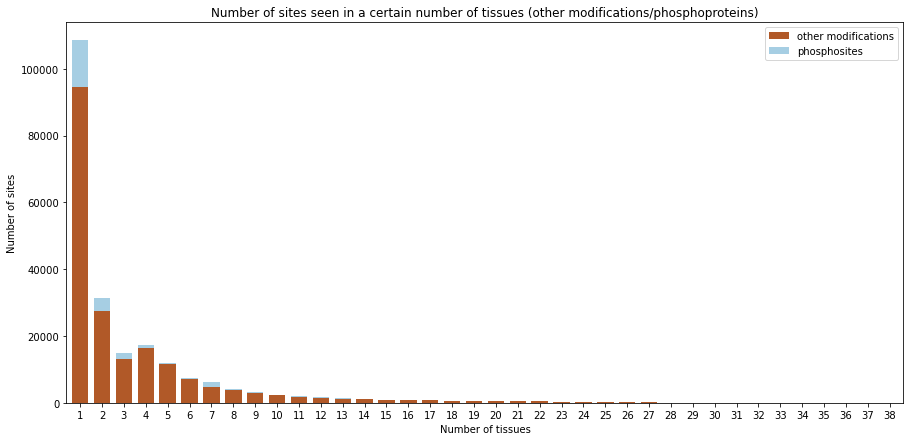

In [93]:
nr_tissues_expressed.plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="Paired_r",
                          title="Number of sites seen in a certain number of tissues (other modifications/phosphoproteins)",
                          xlabel= "Number of tissues", ylabel="Number of sites", width=0.75)

In [94]:
nr_tissues_expressed["log(other modifications)"] = np.log10(nr_tissues_expressed["other modifications"])
nr_tissues_expressed["log(phosphosites)"] = np.log10(nr_tissues_expressed["phosphosites"])

<AxesSubplot:title={'center':'Number of sites seen in a certain number of tissues (other modifications/phosphosites)'}, xlabel='Number of tissues', ylabel='log(Number of sites)'>

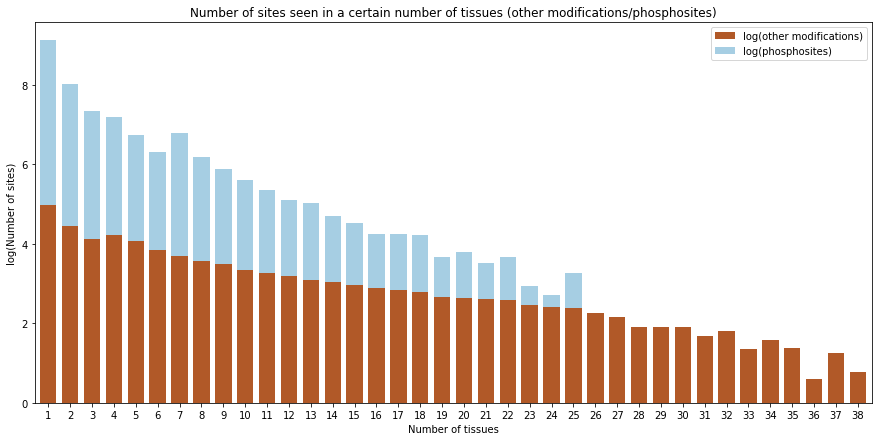

In [95]:
nr_tissues_expressed[["Number of tissues", "log(other modifications)", "log(phosphosites)"]].plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="Paired_r",
                          title="Number of sites seen in a certain number of tissues (other modifications/phosphosites)",
                          xlabel= "Number of tissues", ylabel="log(Number of sites)", width=0.75)
#plt.savefig("WP3 number tissues all_phosphosites.png", format="png", bbox_inches="tight")

In [96]:
nr_tissues_expressed

Number of tissues  other modifications  phosphosites  \
0                   1                94475       14019.0   
1                   2                27538        3831.0   
2                   3                13113        1682.0   
3                   4                16313         965.0   
4                   5                11529         466.0   
5                   6                 7158         294.0   
6                   7                 4854        1306.0   
7                   8                 3791         404.0   
8                   9                 3051         253.0   
9                  10                 2260         178.0   
10                 11                 1843         124.0   
11                 12                 1553          80.0   
12                 13                 1259          84.0   
13                 14                 1110          46.0   
14                 15                  948          35.0   
15                 16                  758          24.0   
16                 17                  702          25.0   
17                 18                  622          27.0   
18                 19                  455          10.0   
19                 20                  425          15.0   
20                 21                  422           8.0   
21                 22                  391          12.0   
22                 23                  286           3.0   
23                 24                  256           2.0   
24                 25                  237           8.0   
25                 26                  177           1.0   
26                 27                  143           1.0   
27                 28                   81           NaN   
28                 29                   80           NaN   
29                 30                   82           NaN   
30                 31                   48           NaN   
31                 32                   64           NaN   
32                 33                   22           NaN   
33                 34                   39           NaN   
34                 35                   24           NaN   
35                 36                    4           NaN   
36                 37                   18           NaN   
37                 38                    6           NaN   

    log(other modifications)  log(phosphosites)  
0                   4.975317           4.146717  
1                   4.439932           3.583312  
2                   4.117702           3.225826  
3                   4.212534           2.984527  
4                   4.061792           2.668386  
5                   3.854792           2.468347  
6                   3.686100           3.115943  
7                   3.578754           2.606381  
8                   3.484442           2.403121  
9                   3.354108           2.250420  
10                  3.265525           2.093422  
11                  3.191171           1.903090  
12                  3.100026           1.924279  
13                  3.045323           1.662758  
14                  2.976808           1.544068  
15                  2.879669           1.380211  
16                  2.846337           1.397940  
17                  2.793790           1.431364  
18                  2.658011           1.000000  
19                  2.628389           1.176091  
20                  2.625312           0.903090  
21                  2.592177           1.079181  
22                  2.456366           0.477121  
23                  2.408240           0.301030  
24                  2.374748           0.903090  
25                  2.247973           0.000000  
26                  2.155336           0.000000  
27                  1.908485                NaN  
28                  1.903090                NaN  
29                  1.913814                NaN  
30                  1.681241                NaN  
31                  1.806180                NaN  
32           

In [97]:
data_all_mod_res_sub = pd.merge(data_Psite[["ACC_ID", "UP_POS"]], data_all_mod_res, how="inner", on=["ACC_ID", "UP_POS"])
data_all_mod_res_sub.head()

ACC_ID  UP_POS                                             tissue  \
0  A0A075B6H7      30  PBMC,Lung,Synovial tissue,Liver,Blood,Blood,Me...   
1  A0A075B6S5      52  Lung,Lung,Lung,Lung,Blood,Menstrual fluid,Mens...   
2  A0A087WXM9     223        Urinary bladder, Colon, Kidney, Liver,Blood   
3  A0A0B4J2D5     124  Liver,Liver,PBMC,PBMC,PBMC,Umbilical cord,Lung...   
4  A0A0B4J2D5     145                                              Liver   

   Adipose tissue  B-cells  Blood  Bone  Brain  Breast  Cerebrospinal fluid  \
0               0        0      1     0      1       0                    1   
1               0        0      1     0      0       0                    0   
2               0        0      1     0      0       0                    0   
3               1        0      0     0      0       0                    0   
4               0        0      0     0      0       0                    0   

   ...  Small intestine  Synovial tissue  T-cells  Testis  Tooth  \
0  ...                1                1        0       1      0   
1  ...                0                0        0       1      0   
2  ...                0                0        0       0      0   
3  ...                0                0        0       0      0   
4  ...                0                0        0       0      0   

   Umbilical cord  Ureter  Urinary bladder  Urine  Total  
0               0       0                1      1     15  
1               0       0                0      1      9  
2               0       0                1      0      5  
3               1       0                1      0     16  
4               0       0                0      0      1  

[5 rows x 45 columns]

In [98]:
nr_tissues_expressed2 = data_all_mod_res_sub.groupby(["Total"], as_index=False)["ACC_ID"].count()
nr_tissues_expressed2.rename({"Total": "Number of tissues", "ACC_ID": "other modifications"}, axis=1, inplace=True)
nr_tissues_expressed2["phosphosites"]=data_Psite.groupby(["Total"], as_index=False)["ACC_ID"].count()["ACC_ID"]
nr_tissues_expressed2

Number of tissues  other modifications  phosphosites
0                   1                 5497       14019.0
1                   2                 3849        3831.0
2                   3                 2094        1682.0
3                   4                 1342         965.0
4                   5                 1294         466.0
5                   6                 1027         294.0
6                   7                  785        1306.0
7                   8                  630         404.0
8                   9                  509         253.0
9                  10                  421         178.0
10                 11                  336         124.0
11                 12                  307          80.0
12                 13                  291          84.0
13                 14                  254          46.0
14                 15                  224          35.0
15                 16                  221          24.0
16                 17                  195          25.0
17                 18                  189          27.0
18                 19                  141          10.0
19                 20                  161          15.0
20                 21                  129           8.0
21                 22                  165          12.0
22                 23                  114           3.0
23                 24                  122           2.0
24                 25                  123           8.0
25                 26                   86           1.0
26                 27                   86           1.0
27                 28                   46           NaN
28                 29                   49           NaN
29                 30                   51           NaN
30                 31                   30           NaN
31                 32                   45           NaN
32                 33                   14           NaN
33                 34                   31           NaN
34                 35                   19           NaN
35                 36                    4           NaN
36                 37                   14           NaN
37                 38                    1           NaN

<AxesSubplot:title={'center':'Number of sites seen in a certain number of tissues (other modifications/phosphoproteins) for proteins found phosphorylated'}, xlabel='Number of tissues', ylabel='Number of sites'>

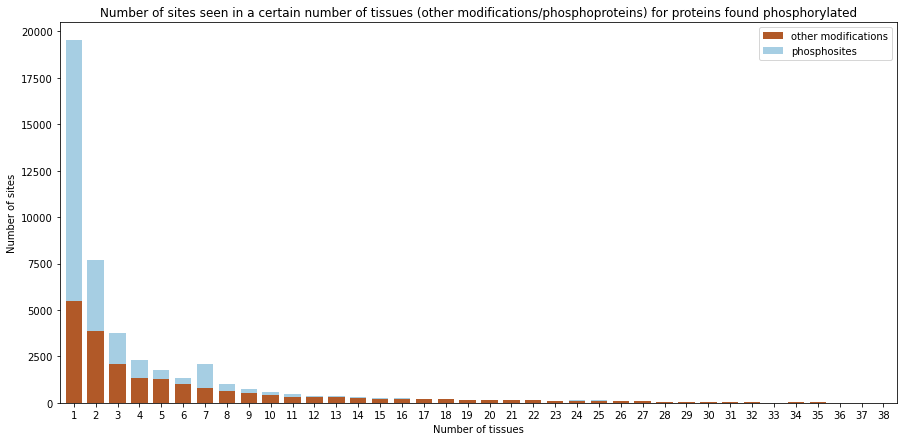

In [99]:
nr_tissues_expressed2.plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="Paired_r",
                          title="Number of sites seen in a certain number of tissues (other modifications/phosphoproteins) for proteins found phosphorylated",
                          xlabel= "Number of tissues", ylabel="Number of sites", width=0.75)

In [100]:
nr_tissues_expressed2["log(other modifications)"] = np.log10(nr_tissues_expressed2["other modifications"])
nr_tissues_expressed2["log(phosphosites)"] = np.log10(nr_tissues_expressed2["phosphosites"])

<AxesSubplot:title={'center':'Number of phosphosites seen in a certain number of tissues (other modifications/phosphoproteins) for proteins found phosphorylated'}, xlabel='Number of tissues', ylabel='log(Number of sites)'>

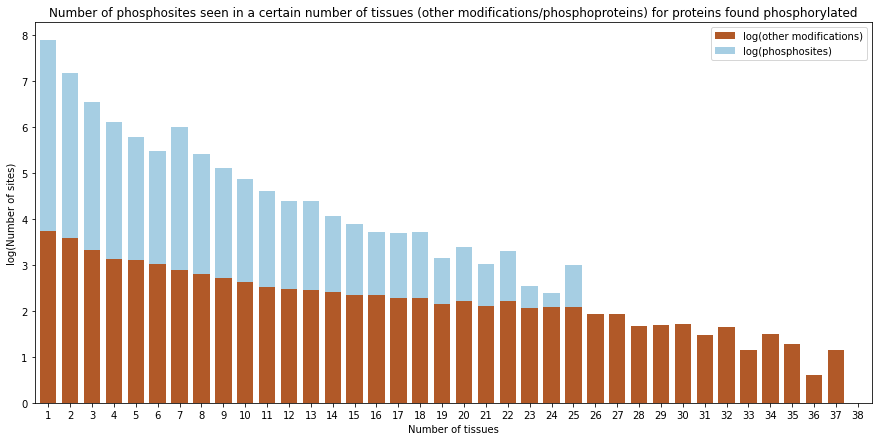

In [101]:
nr_tissues_expressed2[["Number of tissues", "log(other modifications)", "log(phosphosites)"]].plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="Paired_r",
                          title="Number of phosphosites seen in a certain number of tissues (other modifications/phosphoproteins) for proteins found phosphorylated",
                          xlabel= "Number of tissues", ylabel="log(Number of sites)", width=0.75)
#plt.savefig("WP3 number tissues sites.png", format="png", bbox_inches="tight")

<AxesSubplot:title={'center':'sites having other modification than phosphorylation across tissues'}, xlabel='Tissue'>

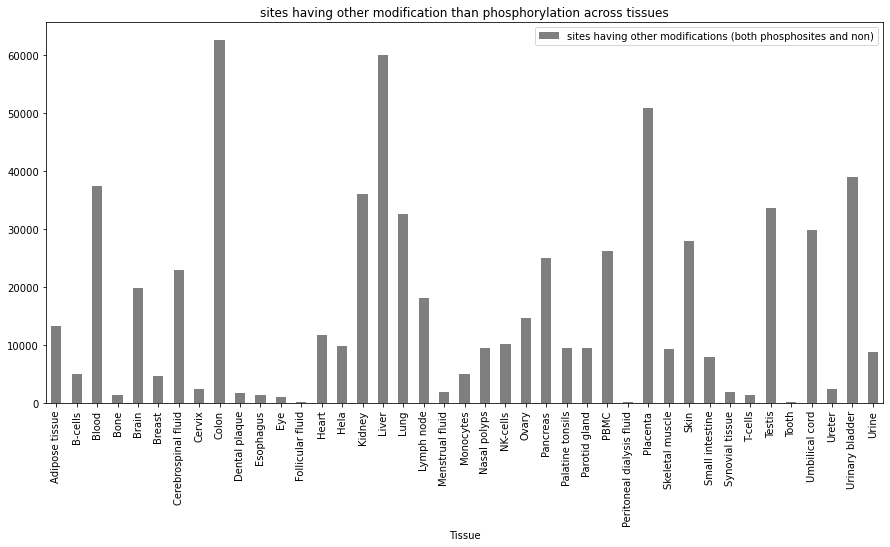

In [102]:
data_all_mod_sites_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts = []
for tissue in list_tissues_STY:
    count = data_all_mod_res[tissue].sum()
    list_counts.append(count)
data_all_mod_sites_tissues["sites having other modifications (both phosphosites and non)"] = list_counts
data_all_mod_sites_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="sites having other modification than phosphorylation across tissues", color="tab:grey")

<AxesSubplot:title={'center':'sites having other modification than phosphorylation across tissues'}, xlabel='Tissue'>

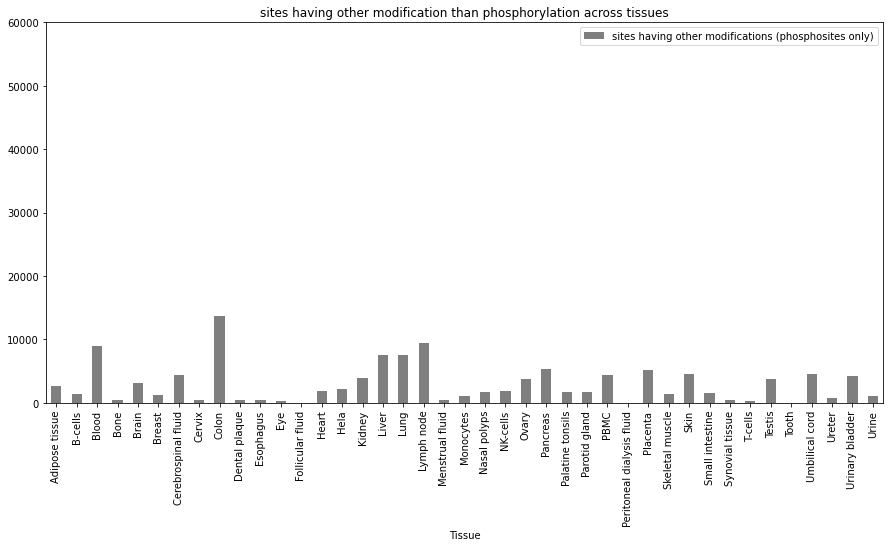

In [103]:
data_all_mod_sites_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts = []
for tissue in list_tissues_STY:
    count = data_all_mod_res_sub[tissue].sum()
    list_counts.append(count)
data_all_mod_sites_tissues["sites having other modifications (phosphosites only)"] = list_counts
data_all_mod_sites_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="sites having other modification than phosphorylation across tissues", color="tab:grey", ylim=[0,60000])

In [104]:
list_counts = []
for tissue in list_tissues_STY:
    count = data_Psite.loc[(data_Psite[tissue]==1), "ACC_ID"].count()
    list_counts.append(count)
data_all_mod_sites_tissues["sites phosphorylated"] = list_counts

<AxesSubplot:title={'center':'Amount of phosphosites phosphorylated and otherwise modified'}, xlabel='Tissue'>

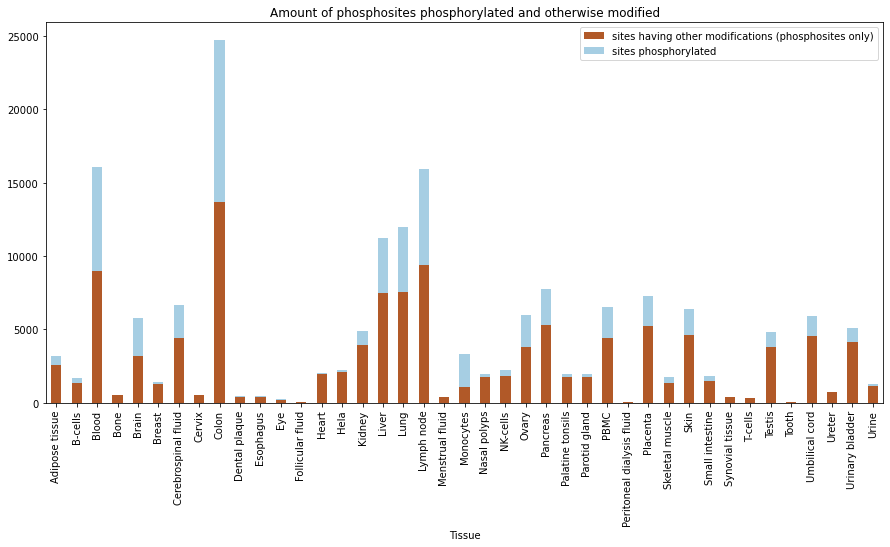

In [105]:
data_all_mod_sites_tissues.plot(x="Tissue", kind="bar", stacked=True, figsize=(15,7), title="Amount of phosphosites phosphorylated and otherwise modified", colormap="Paired_r")
#plt.savefig("WP3 phosphosites and otherwise modified per tissue.png", format="png", bbox_inches="tight")

In [106]:
tspec_sites = pd.read_csv("1.2 tissue-specific sites.tsv", sep="\t")
taspec_sites = pd.read_csv("1.2 non tissue-specific sites.tsv", sep="\t")
gen_sites = pd.read_csv("1.2 general P sites.tsv", sep="\t")

In [107]:
tspec_sites_all_mod = pd.merge(tspec_sites, data_all_mod_res_sub, how="inner", on=["ACC_ID", "UP_POS"], suffixes=["_P", "_all_mod"])
print(tspec_sites_all_mod.shape[0])
print("Tissue-specific Psites not found modified: {}".format(tspec_sites["ACC_ID"].count()-tspec_sites_all_mod["ACC_ID"].count()))
tspec_sites_all_mod.head() #18,35%

11445
Tissue-specific Psites not found modified: 2574


ACC_ID  UP_POS         tissue_P modres  Adipose tissue_P  B-cells_P  \
0  A0A075B6H7      30             Lung      T                 0          0   
1  A0A075B6S5      52  Menstrual fluid      S                 0          0   
2  A0A087WXM9     223           Testis      S                 0          0   
3  A0A0B4J2D5     124             PBMC      S                 0          0   
4  A0A0B4J2D5     145             PBMC      T                 0          0   

   Blood_P  Bone_P  Brain_P  Breast_P  ...  Small intestine_all_mod  \
0        0       0        0         0  ...                        1   
1        0       0        0         0  ...                        0   
2        0       0        0         0  ...                        0   
3        0       0        0         0  ...                        0   
4        0       0        0         0  ...                        0   

   Synovial tissue_all_mod  T-cells_all_mod  Testis_all_mod  Tooth_all_mod  \
0                        1                0               1              0   
1                        0                0               1              0   
2                        0                0               0              0   
3                        0                0               0              0   
4                        0                0               0              0   

   Umbilical cord_all_mod  Ureter_all_mod  Urinary bladder_all_mod  \
0                       0               0                        1   
1                       0               0                        0   
2                       0               0                        1   
3                       1               0                        1   
4                       0               0                        0   

   Urine_all_mod  Total_all_mod  
0              1             15  
1              1              9  
2              0              5  
3              0             16  
4              0              1  

[5 rows x 89 columns]

In [108]:
print(taspec_sites.shape[0])

6478


In [109]:
taspec_sites_all_mod = pd.merge(taspec_sites, data_all_mod_res, how="inner", on=["ACC_ID", "UP_POS"], suffixes=["_P", "_all_mod"])
print(taspec_sites_all_mod.shape[0])
print("Tissue aspecific Psites not found modified: {}".format(taspec_sites["ACC_ID"].count()-taspec_sites_all_mod["ACC_ID"].count()))
taspec_sites_all_mod.head() # 3,47%

6253
Tissue aspecific Psites not found modified: 225


ACC_ID  UP_POS                                           tissue_P  \
0  A0A0C4DH36     108                                   Lung,Blood,Blood   
1      A0AVK6      71                Blood,Colon,Colon,Colon,Colon,Colon   
2      A0AVK6     102          Blood,Blood,Colon,Colon,Colon,Colon,Colon   
3      A0FGR8     738  Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...   
4      A0FGR8     739  Liver,Blood,Blood,Colon,Lymph node,Lymph node,...   

  modres  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  Breast_P  \
0      T                 0          0        1       0        0         0   
1      S                 0          0        1       0        0         0   
2      S                 0          0        1       0        0         0   
3      S                 0          0        1       0        0         0   
4      S                 0          0        1       0        0         0   

   ...  Small intestine_all_mod  Synovial tissue_all_mod  T-cells_all_mod  \
0  ...                        0                        0                0   
1  ...                        0                        0                0   
2  ...                        0                        0                0   
3  ...                        0                        0                0   
4  ...                        0                        0                0   

   Testis_all_mod  Tooth_all_mod  Umbilical cord_all_mod  Ureter_all_mod  \
0               0              0                       0               0   
1               0              0                       0               0   
2               0              0                       0               0   
3               0              0                       0               0   
4               0              0                       0               0   

   Urinary bladder_all_mod  Urine_all_mod  Total_all_mod  
0                        0              0              7  
1                        0              0              2  
2                        0              0              2  
3                        0              0              5  
4                        0              0              4  

[5 rows x 89 columns]

In [110]:
gen_sites_all_mod = pd.merge(gen_sites, data_all_mod_res, how="inner", on=["ACC_ID", "UP_POS"], suffixes=["_P", "_all_mod"])
print(gen_sites_all_mod.shape[0])
print("Pervasive Psites not found modified: {}".format(gen_sites["ACC_ID"].count()-gen_sites_all_mod["ACC_ID"].count()))
gen_sites_all_mod.head() # 6,11%

3198
Pervasive Psites not found modified: 208


ACC_ID  UP_POS                                           tissue_P  \
0  A0A0C4DH39      51  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
1      A0JNW5    1402  Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...   
2      A2RU30     454  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
3      A5A3E0     939  Skin,Colon,Colon,Colon,Colon,Colon,Colon,Colon...   
4      A5A3E0     940  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   

  modres  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  Breast_P  \
0      S                 0          0        1       0        1         0   
1      S                 0          0        1       0        1         0   
2      S                 0          0        1       0        1         0   
3      S                 0          0        1       0        1         0   
4      Y                 1          0        1       0        1         0   

   ...  Small intestine_all_mod  Synovial tissue_all_mod  T-cells_all_mod  \
0  ...                        0                        0                0   
1  ...                        0                        0                0   
2  ...                        0                        0                0   
3  ...                        1                        1                1   
4  ...                        1                        0                1   

   Testis_all_mod  Tooth_all_mod  Umbilical cord_all_mod  Ureter_all_mod  \
0               0              0                       0               0   
1               0              0                       0               0   
2               0              0                       0               0   
3               1              0                       1               1   
4               1              0                       1               1   

   Urinary bladder_all_mod  Urine_all_mod  Total_all_mod  
0                        0              0              5  
1                        0              0              2  
2                        0              0              1  
3                        1              1             35  
4                        1              1             37  

[5 rows x 89 columns]

In [111]:
gen_all_mod_not = pd.merge(gen_sites, data_all_mod_res, how="left", on=["ACC_ID", "UP_POS"], suffixes=["_P", "_all_mod"], indicator = True)
gen_all_mod_not[gen_all_mod_not["_merge"]=="left_only"]["Total_P"]

7       7
8       7
9       7
12      7
28      7
       ..
3313    7
3380    7
3381    7
3385    7
3402    7
Name: Total_P, Length: 208, dtype: int64

In [112]:
gen_all_mod_not[(gen_all_mod_not["_merge"]=="left_only")&(gen_all_mod_not["Total_P"]!=7)]["Total_P"]

33      5
225     5
644     8
809     8
843     6
1120    5
1691    8
1912    8
2406    6
2505    9
2644    8
2752    5
Name: Total_P, dtype: int64

In [113]:
tspec_sites_all_mod["Total_nonP"] = 0
for tissue in list_tissues_STY:
    if tissue not in ["Bronchoalveolar lavage", "Cartilage", "Sputum"]:
        tissueP = tissue+"_P"
        tissue_all_mod = tissue+"_all_mod"
        tspec_sites_all_mod.loc[(tspec_sites_all_mod[tissueP]==0)&(tspec_sites_all_mod[tissue_all_mod]==1), "Total_nonP"] += 1
    else:
        tissue_all_mod = tissue
        tspec_sites_all_mod.loc[(tspec_sites_all_mod[tissue_all_mod]), "Total_nonP"] += 1
tspec_sites_all_mod.head()

ACC_ID  UP_POS         tissue_P modres  Adipose tissue_P  B-cells_P  \
0  A0A075B6H7      30             Lung      T                 0          0   
1  A0A075B6S5      52  Menstrual fluid      S                 0          0   
2  A0A087WXM9     223           Testis      S                 0          0   
3  A0A0B4J2D5     124             PBMC      S                 0          0   
4  A0A0B4J2D5     145             PBMC      T                 0          0   

   Blood_P  Bone_P  Brain_P  Breast_P  ...  Synovial tissue_all_mod  \
0        0       0        0         0  ...                        1   
1        0       0        0         0  ...                        0   
2        0       0        0         0  ...                        0   
3        0       0        0         0  ...                        0   
4        0       0        0         0  ...                        0   

   T-cells_all_mod  Testis_all_mod  Tooth_all_mod  Umbilical cord_all_mod  \
0                0               1              0                       0   
1                0               1              0                       0   
2                0               0              0                       0   
3                0               0              0                       1   
4                0               0              0                       0   

   Ureter_all_mod  Urinary bladder_all_mod  Urine_all_mod  Total_all_mod  \
0               0                        1              1             15   
1               0                        0              1              9   
2               0                        1              0              5   
3               0                        1              0             16   
4               0                        0              0              1   

   Total_nonP  
0          14  
1           8  
2           5  
3          15  
4           1  

[5 rows x 90 columns]

In [114]:
tspec_sites_all_mod[tspec_sites_all_mod["Total_nonP"] <= tspec_sites_all_mod["Total_all_mod"]]["ACC_ID"].count()

11445

In [115]:
print(tspec_sites_all_mod.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])

11445


In [116]:
taspec_sites_all_mod["Total_nonP"] = 0
for tissue in list_tissues_STY:
    tissueP = tissue+"_P"
    tissue_all_mod = tissue+"_all_mod"
    taspec_sites_all_mod.loc[(taspec_sites_all_mod[tissueP]==0)&(taspec_sites_all_mod[tissue_all_mod]==1), "Total_nonP"] += 1
taspec_sites_all_mod.head()

ACC_ID  UP_POS                                           tissue_P  \
0  A0A0C4DH36     108                                   Lung,Blood,Blood   
1      A0AVK6      71                Blood,Colon,Colon,Colon,Colon,Colon   
2      A0AVK6     102          Blood,Blood,Colon,Colon,Colon,Colon,Colon   
3      A0FGR8     738  Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...   
4      A0FGR8     739  Liver,Blood,Blood,Colon,Lymph node,Lymph node,...   

  modres  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  Breast_P  \
0      T                 0          0        1       0        0         0   
1      S                 0          0        1       0        0         0   
2      S                 0          0        1       0        0         0   
3      S                 0          0        1       0        0         0   
4      S                 0          0        1       0        0         0   

   ...  Synovial tissue_all_mod  T-cells_all_mod  Testis_all_mod  \
0  ...                        0                0               0   
1  ...                        0                0               0   
2  ...                        0                0               0   
3  ...                        0                0               0   
4  ...                        0                0               0   

   Tooth_all_mod  Umbilical cord_all_mod  Ureter_all_mod  \
0              0                       0               0   
1              0                       0               0   
2              0                       0               0   
3              0                       0               0   
4              0                       0               0   

   Urinary bladder_all_mod  Urine_all_mod  Total_all_mod  Total_nonP  
0                        0              0              7           5  
1                        0              0              2           0  
2                        0              0              2           0  
3                        0              0              5           2  
4                        0              0              4           1  

[5 rows x 90 columns]

In [117]:
taspec_all_mod[taspec_all_mod["Total_nonP"] <= taspec_all_mod["Total_all_mod"]]["ACC_ID"].count()

2068

In [118]:
gen_sites_all_mod["Total_nonP"] = 0
for tissue in list_tissues_STY:
    tissueP = tissue+"_P"
    tissue_all_mod = tissue+"_all_mod"
    gen_sites_all_mod.loc[(gen_sites_all_mod[tissueP]==0)&(gen_sites_all_mod[tissue_all_mod]==1), "Total_nonP"] += 1
gen_sites_all_mod.head()

ACC_ID  UP_POS                                           tissue_P  \
0  A0A0C4DH39      51  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
1      A0JNW5    1402  Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...   
2      A2RU30     454  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
3      A5A3E0     939  Skin,Colon,Colon,Colon,Colon,Colon,Colon,Colon...   
4      A5A3E0     940  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   

  modres  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  Breast_P  \
0      S                 0          0        1       0        1         0   
1      S                 0          0        1       0        1         0   
2      S                 0          0        1       0        1         0   
3      S                 0          0        1       0        1         0   
4      Y                 1          0        1       0        1         0   

   ...  Synovial tissue_all_mod  T-cells_all_mod  Testis_all_mod  \
0  ...                        0                0               0   
1  ...                        0                0               0   
2  ...                        0                0               0   
3  ...                        1                1               1   
4  ...                        0                1               1   

   Tooth_all_mod  Umbilical cord_all_mod  Ureter_all_mod  \
0              0                       0               0   
1              0                       0               0   
2              0                       0               0   
3              0                       1               1   
4              0                       1               1   

   Urinary bladder_all_mod  Urine_all_mod  Total_all_mod  Total_nonP  
0                        0              0              5           0  
1                        0              0              2           1  
2                        0              0              1           1  
3                        1              1             35          24  
4                        1              1             37          24  

[5 rows x 90 columns]

In [119]:
gen_sites_all_mod[gen_sites_all_mod["Total_nonP"] < gen_sites_all_mod["Total_all_mod"]]["ACC_ID"].count()

3118

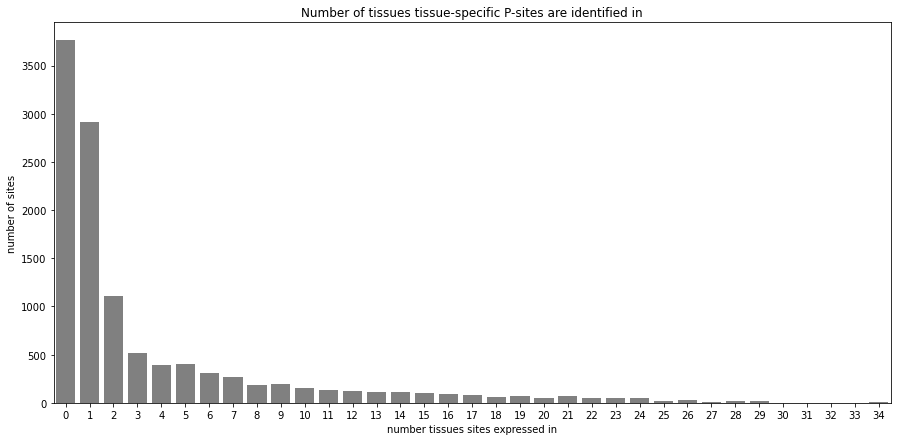

In [120]:
plot = tspec_sites_all_mod.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="grey").set(xlabel="number tissues sites expressed in",
                                                  ylabel = "number of sites", title = "Number of tissues tissue-specific P-sites are identified in")
#plt.savefig("WP3 tissue specific sites modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [121]:
plot

Total_nonP  ACC_ID
0            0    3761
1            1    2912
2            2    1107
3            3     517
4            4     394
5            5     405
6            6     306
7            7     268
8            8     181
9            9     200
10          10     149
11          11     132
12          12     121
13          13     115
14          14     112
15          15      97
16          16      89
17          17      77
18          18      65
19          19      72
20          20      52
21          21      71
22          22      51
23          23      49
24          24      45
25          25      18
26          26      25
27          27      10
28          28      14
29          29      18
30          30       3
31          31       1
32          32       1
33          33       3
34          34       4

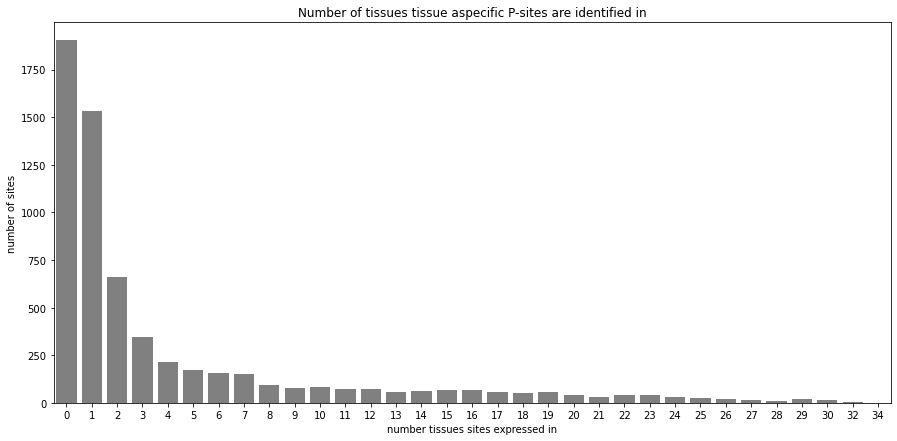

In [122]:
plot = taspec_sites_all_mod.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="grey").set(xlabel="number tissues sites expressed in",
                                                  ylabel = "number of sites", title = "Number of tissues tissue aspecific P-sites are identified in")
#plt.savefig("WP3 tissue aspecific sites modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [123]:
plot

Total_nonP  ACC_ID
0            0    1903
1            1    1532
2            2     663
3            3     347
4            4     213
5            5     173
6            6     156
7            7     152
8            8      95
9            9      79
10          10      82
11          11      73
12          12      71
13          13      59
14          14      63
15          15      68
16          16      66
17          17      55
18          18      50
19          19      57
20          20      42
21          21      31
22          22      40
23          23      42
24          24      31
25          25      23
26          26      20
27          27      14
28          28      12
29          29      22
30          30      16
31          32       2
32          34       1

In [124]:
print(plot["ACC_ID"].sum())

6253


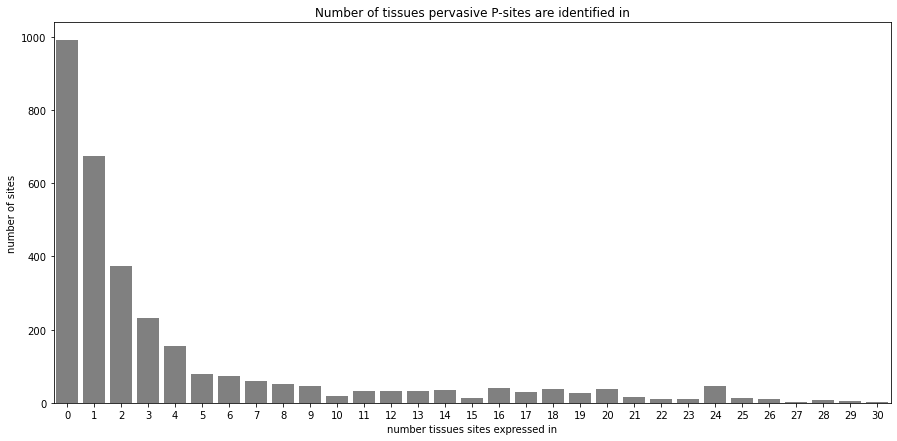

In [125]:
plot = gen_sites_all_mod.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="grey").set(xlabel="number tissues sites expressed in",
                                                  ylabel = "number of sites", title = "Number of tissues pervasive P-sites are identified in")
#plt.savefig("WP3 pervasive sites modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [126]:
plot

Total_nonP  ACC_ID
0            0     990
1            1     675
2            2     375
3            3     233
4            4     155
5            5      78
6            6      74
7            7      60
8            8      52
9            9      47
10          10      19
11          11      32
12          12      32
13          13      32
14          14      36
15          15      13
16          16      41
17          17      30
18          18      37
19          19      28
20          20      37
21          21      16
22          22      10
23          23      11
24          24      45
25          25      13
26          26      11
27          27       2
28          28       8
29          29       5
30          30       1

In [127]:
gen_sites_all_mod_10 = gen_sites_all_mod[gen_sites_all_mod["Total_P"]>=10]
print(gen_sites[gen_sites["Total"]>=10]["ACC_ID"].count())
print(gen_sites_all_mod_10.shape[0])
gen_sites_all_mod_10.head()

683
683


ACC_ID  UP_POS                                           tissue_P modres  \
3   A5A3E0     939  Skin,Colon,Colon,Colon,Colon,Colon,Colon,Colon...      S   
4   A5A3E0     940  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...      Y   
5   A5A3E0     971  Liver,PBMC,PBMC,Urinary bladder, Colon, Kidney...      S   
11  A6NMY6      19  Liver,Liver,Liver,Liver,PBMC,PBMC,PBMC,PBMC,PB...      T   
28  B5ME19      39  Umbilical cord,Umbilical cord,Umbilical cord,U...      S   

    Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  Breast_P  ...  \
3                  0          0        1       0        1         0  ...   
4                  1          0        1       0        1         0  ...   
5                  0          0        1       0        1         0  ...   
11                 0          0        1       0        0         0  ...   
28                 1          1        1       0        0         0  ...   

    Synovial tissue_all_mod  T-cells_all_mod  Testis_all_mod  Tooth_all_mod  \
3                         1                1               1              0   
4                         0                1               1              0   
5                         1                0               1              0   
11                        0                0               1              0   
28                        0                0               1              0   

    Umbilical cord_all_mod  Ureter_all_mod  Urinary bladder_all_mod  \
3                        1               1                        1   
4                        1               1                        1   
5                        1               1                        1   
11                       1               0                        1   
28                       1               0                        0   

    Urine_all_mod  Total_all_mod  Total_nonP  
3               1             35          24  
4               1             37          24  
5               1             31          16  
11              0             18           9  
28              0             14           2  

[5 rows x 90 columns]

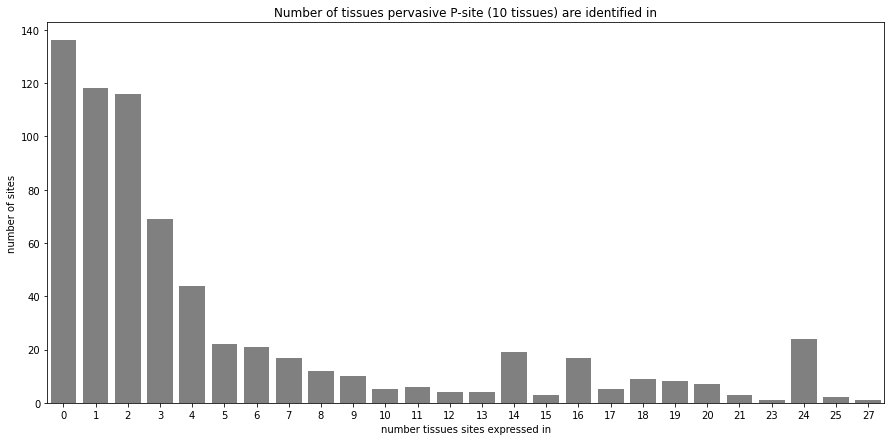

In [128]:
plot = gen_sites_all_mod_10.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="grey").set(xlabel="number tissues sites expressed in",
                                                  ylabel = "number of sites", title = "Number of tissues pervasive P-site (10 tissues) are identified in")
#plt.savefig("WP3 pervasive sites_10plus modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [129]:
plot

Total_nonP  ACC_ID
0            0     136
1            1     118
2            2     116
3            3      69
4            4      44
5            5      22
6            6      21
7            7      17
8            8      12
9            9      10
10          10       5
11          11       6
12          12       4
13          13       4
14          14      19
15          15       3
16          16      17
17          17       5
18          18       9
19          19       8
20          20       7
21          21       3
22          23       1
23          24      24
24          25       2
25          27       1

In [130]:
plot["ACC_ID"].sum()

683

In [131]:
gen_sites_all_mod_10_mod = gen_sites_all_mod_10.copy()
for tissue in list_tissues_STY:
    tissueP = tissue+"_P"
    tissue_all_mod = tissue+"_all_mod"
    gen_sites_all_mod_10_mod.loc[(gen_sites_all_mod_10_mod[tissueP]==1)&(gen_sites_all_mod_10_mod[tissue_all_mod]==1), tissue_all_mod] = 0
gen_sites_all_mod_10_mod

ACC_ID  UP_POS                                           tissue_P  \
3     A5A3E0     939  Skin,Colon,Colon,Colon,Colon,Colon,Colon,Colon...   
4     A5A3E0     940  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
5     A5A3E0     971  Liver,PBMC,PBMC,Urinary bladder, Colon, Kidney...   
11    A6NMY6      19  Liver,Liver,Liver,Liver,PBMC,PBMC,PBMC,PBMC,PB...   
28    B5ME19      39  Umbilical cord,Umbilical cord,Umbilical cord,U...   
...      ...     ...                                                ...   
3152  Q9Y4F5     360  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
3165  Q9Y5S2    1690  Liver,Liver,Colon,Colon,Colon,Colon,Colon,Colo...   
3171  Q9Y6G9     207  Liver,Liver,Liver,Liver,Liver,Liver,Liver,Live...   
3173  Q9Y6G9     515  Liver,Liver,Liver,PBMC,PBMC,PBMC,PBMC,PBMC,PBM...   
3174  Q9Y6G9     516  PBMC,PBMC,PBMC,Blood,Blood,Lung,Colon,Colon,Co...   

     modres  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  Breast_P  \
3         S                 0          0        1       0        1         0   
4         Y                 1          0        1       0        1         0   
5         S                 0          0        1       0        1         0   
11        T                 0          0        1       0        0         0   
28        S                 1          1        1       0        0         0   
...     ...               ...        ...      ...     ...      ...       ...   
3152      S                 0          0        1       0        1         0   
3165      S                 0          0        1       0        1         0   
3171      S                 0          0        1       0        1         0   
3173      T                 1          1        1       0        1         0   
3174      S                 1          0        1       0        1         0   

      ...  Synovial tissue_all_mod  T-cells_all_mod  Testis_all_mod  \
3     ...                        1                1               1   
4     ...                        0                1               0   
5     ...                        1                0               1   
11    ...                        0                0               1   
28    ...                        0                0               0   
...   ...                      ...              ...             ...   
3152  ...                        0                0               0   
3165  ...                        0                0               0   
3171  ...                        0                0               0   
3173  ...                        0                0               0   
3174  ...                        0                0               0   

      Tooth_all_mod  Umbilical cord_all_mod  Ureter_all_mod  \
3                 0                       1               1   
4                 0                       0               1   
5                 0                       1               1   
11                0                       0               0   
28                0                       0               0   
...             ...                     ...             ...   
3152              0                       0               0   
3165              0                       0               0   
3171              0                       0               0   
3173              0                       0               0   
3174              0                       0               0   

      Urinary bladder_all_mod  Urine_all_mod  Total_all_mod  Total_nonP  
3                           1              1             35          24  
4                           1              1             37          24  
5                           0              1             31          16  
11                          1              0             18           9  
28                          0              0             14           2  
...                       ...            ...            ...         ...  
3152            

In [132]:
print(gen_sites_all_mod_10_mod.shape[0])
print(gen_sites_all_mod_10_mod[gen_sites_all_mod_10_mod["Total_nonP"]>2].shape[0])

683
313


<AxesSubplot:title={'center':'Number of phosphoproteins having modifications other than phopshorylation'}, xlabel='Tissue'>

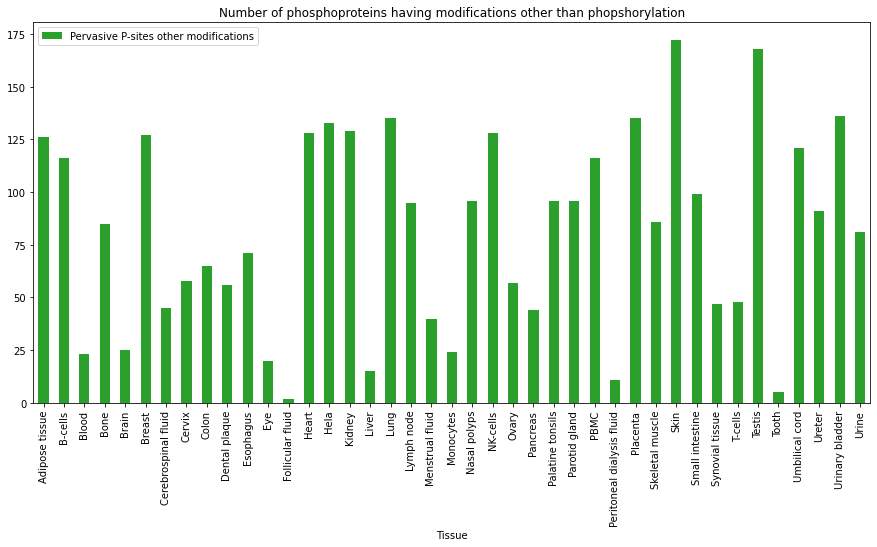

In [133]:
df_gen_all_mod_10_mod_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts = []
for tissue in list_tissues_STY:
    tissue = tissue+"_all_mod"
    count = gen_sites_all_mod_10_mod[tissue].sum()
    list_counts.append(count)
df_gen_all_mod_10_mod_tissues["Pervasive P-sites other modifications"] = list_counts
df_gen_all_mod_10_mod_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of phosphoproteins having modifications other than phopshorylation", color="tab:green")
#plt.savefig("WP3 pervasive sites_10plus other mods distribution across tissues.png", format="png", bbox_inches="tight")

In [134]:
gen_sites_all_mod_10[gen_sites_all_mod_10["Total_nonP"]==0]

ACC_ID  UP_POS                                           tissue_P  \
51    O00264     181  Liver,Liver,Liver,Liver,Liver,Liver,Liver,Brea...   
87    O14639     452  PBMC,PBMC,Blood,Colon,Colon,Colon,Colon,Colon,...   
137   O43166    1585  Skin,Lung,Lung,Colon,Colon,Colon,Colon,Colon,C...   
237   O75382       7  Blood,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
247   O75508     196  Brain,Brain,Brain,Umbilical cord,Brain,Brain,B...   
...      ...     ...                                                ...   
3123  Q9Y2W1     682  Liver,Liver,Liver,Liver,PBMC,PBMC,PBMC,PBMC,PB...   
3144  Q9Y4B6    1000  Blood,Blood,Blood,Blood,Blood,Blood,Blood,Bloo...   
3152  Q9Y4F5     360  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
3171  Q9Y6G9     207  Liver,Liver,Liver,Liver,Liver,Liver,Liver,Live...   
3174  Q9Y6G9     516  PBMC,PBMC,PBMC,Blood,Blood,Lung,Colon,Colon,Co...   

     modres  Adipose tissue_P  B-cells_P  Blood_P  Bone_P  Brain_P  Breast_P  \
51        S                 1          0        1       0        1         1   
87        S                 0          0        1       0        1         0   
137       S                 0          0        1       0        1         0   
237       S                 0          0        1       0        1         0   
247       S                 0          0        1       0        1         0   
...     ...               ...        ...      ...     ...      ...       ...   
3123      S                 1          1        1       0        1         0   
3144      S                 0          0        1       0        0         0   
3152      S                 0          0        1       0        1         0   
3171      S                 0          0        1       0        1         0   
3174      S                 1          0        1       0        1         0   

      ...  Synovial tissue_all_mod  T-cells_all_mod  Testis_all_mod  \
51    ...                        0                0               1   
87    ...                        0                0               0   
137   ...                        0                0               0   
237   ...                        0                0               0   
247   ...                        0                0               0   
...   ...                      ...              ...             ...   
3123  ...                        0                0               0   
3144  ...                        0                0               1   
3152  ...                        0                0               0   
3171  ...                        0                0               1   
3174  ...                        0                0               0   

      Tooth_all_mod  Umbilical cord_all_mod  Ureter_all_mod  \
51                0                       1               0   
87                0                       0               0   
137               0                       0               0   
237               0                       0               0   
247               0                       1               0   
...             ...                     ...             ...   
3123              0                       1               0   
3144              0                       0               0   
3152              0                       0               0   
3171              0                       0               0   
3174              0                       0               0   

      Urinary bladder_all_mod  Urine_all_mod  Total_all_mod  Total_nonP  
51                          1              0             22           0  
87                          0              0              9           0  
137                         0              0              7           0  
237                         0              0              7           0  
247                         0              0              8           0  
...                       ...            ...            ...         ...  
3123            

In [135]:
gen_sites_all_mod_10["Total_nonP"].value_counts()

0     136
1     118
2     116
3      69
4      44
24     24
5      22
6      21
14     19
7      17
16     17
8      12
9      10
18      9
19      8
20      7
11      6
10      5
17      5
12      4
13      4
15      3
21      3
25      2
23      1
27      1
Name: Total_nonP, dtype: int64

In [136]:
tspecP_allmod_sites = pd.merge(tspec_sites[["ACC_ID", "UP_POS"]], data_all_mod[["ACC_ID", "modification", "tissue", "unimod", "UP_POS"]], how="inner", on=["ACC_ID", "UP_POS"])
tspecP_allmod_sites_gr = tspecP_allmod_sites.groupby(["ACC_ID", "UP_POS", "modification"]).agg({"tissue": lambda x: ",".join(x)}).reset_index()
tspecP_allmod_sites_gr

ACC_ID  UP_POS           modification  \
0      A0A075B6H7      30            [122]Formyl   
1      A0A075B6H7      30  [1419]15N-oxobutanoic   
2      A0A075B6H7      30  [2007]Methamidophos-S   
3      A0A075B6H7      30         [23]Dehydrated   
4      A0A075B6H7      30          [35]Oxidation   
...           ...     ...                    ...   
46836      Q9Y6Y0     338              [40]Sulfo   
46837      Q9Y6Y0     338             [447]Deoxy   
46838      Q9Y6Y8     737              [40]Sulfo   
46839      Q9Y6Y8     926              [40]Sulfo   
46840      Q9Y6Y8     926                [41]Hex   

                                                  tissue  
0                                      Blood,Blood,Blood  
1      Brain,Small intestine,Small intestine,Small in...  
2                                                  Urine  
3      Synovial tissue,Small intestine,Testis,Urine,U...  
4                                        Small intestine  
...                                                  ...  
46836  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...  
46837                                             Breast  
46838                                   Colon,Lymph node  
46839  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...  
46840                                              Liver  

[46841 rows x 4 columns]

In [137]:
taspecP_allmod_sites = pd.merge(taspec_sites[["ACC_ID", "UP_POS"]], data_all_mod[["ACC_ID", "modification", "tissue", "unimod", "UP_POS"]], how="inner", on=["ACC_ID", "UP_POS"])
taspecP_allmod_sites_gr = taspecP_allmod_sites.groupby(["ACC_ID", "UP_POS", "modification"]).agg({"tissue": lambda x: ",".join(x)}).reset_index()
taspecP_allmod_sites_gr

ACC_ID  UP_POS                  modification  \
0      A0A0C4DH36     108                   [122]Formyl   
1      A0A0C4DH36     108                   [5]Carbamyl   
2          A0AVK6      71                     [40]Sulfo   
3          A0AVK6     102                     [40]Sulfo   
4          A0FGR8     738             [385]Ammonia-loss   
...           ...     ...                           ...   
32845      Q9Y6X9     725                     [40]Sulfo   
32846      Q9Y6X9     725              [898]pyrophospho   
32847      Q9Y6X9     743  [1429]Hex(1)HexNAc(1)Phos(1)   
32848      Q9Y6X9     743  [1430]Hex(1)HexNAc(1)Sulf(1)   
32849      Q9Y6X9     743                     [40]Sulfo   

                                                  tissue  
0      Lung,Lung,Blood,Blood,Blood,Blood,Blood,Cervix...  
1                                                   Lung  
2      Blood,Blood,Blood,Blood,Blood,Colon,Colon,Colo...  
3      Blood,Colon,Colon,Colon,Colon,Colon,Colon,Colo...  
4                                               Placenta  
...                                                  ...  
32845                  Blood,Blood,Blood,Blood,Lung,Lung  
32846                                        Blood,Blood  
32847                                        Blood,Blood  
32848                                              Blood  
32849  Blood,Blood,Blood,Blood,Blood,Blood,Blood,Bloo...  

[32850 rows x 4 columns]

In [138]:
genP_allmod_sites = pd.merge(gen_sites[["ACC_ID", "UP_POS"]], data_all_mod[["ACC_ID", "modification", "tissue", "unimod", "UP_POS"]], how="inner", on=["ACC_ID", "UP_POS"])
genP_allmod_sites_gr = genP_allmod_sites.groupby(["ACC_ID", "UP_POS", "modification"]).agg({"tissue": lambda x: ",".join(x)}).reset_index()
genP_allmod_sites_gr

ACC_ID  UP_POS                 modification  \
0      A0A0C4DH39      51   [1868]MeMePhosphorothioate   
1      A0A0C4DH39      51  [1987]Dimethylphosphothione   
2      A0A0C4DH39      51        [363]Isopropylphospho   
3      A0A0C4DH39      51                    [40]Sulfo   
4      A0A0C4DH39      51     [723]O-Dimethylphosphate   
...           ...     ...                          ...   
26740      Q9Y6V0    4395                    [40]Sulfo   
26741      Q9Y6V0    4395             [898]pyrophospho   
26742      Q9Y6X4     635                    [40]Sulfo   
26743      Q9Y6X4     635             [898]pyrophospho   
26744      Q9Y6Y0     276                    [40]Sulfo   

                                                  tissue  
0      Blood,Blood, Cerebrospinal fluid, Liver, Ovary...  
1      Blood, Cerebrospinal fluid, Liver, Ovary, Panc...  
2      Blood, Cerebrospinal fluid, Liver, Ovary, Panc...  
3      Blood, Cerebrospinal fluid, Liver, Ovary, Panc...  
4      Blood, Cerebrospinal fluid, Liver, Ovary, Panc...  
...                                                  ...  
26740  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...  
26741  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...  
26742  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...  
26743                                              Blood  
26744                  Colon,Colon,Lymph node,Lymph node  

[26745 rows x 4 columns]

In [139]:
list_mod1 = tspecP_allmod_sites_gr["modification"].to_list()
list_mod1 = sorted(list_mod1)
list_mod = []
for n in list_mod1:
    if n==list_mod1[0] and len(list_mod)==0:
        list_mod.append(n)
    elif n != list_mod[-1]:
        list_mod.append(n)
list_mod

['[1009]Thiazolidine',
 '[1017]DMPO',
 '[1032]2-nitrobenzyl',
 '[1037]Biotin:Thermo-88317',
 '[118]EDT-iodoacetyl-PEO-biotin',
 '[122]Formyl',
 '[1255]Cresylphosphate',
 '[1256]CresylSaligeninPhosphate',
 '[1278]Furan',
 '[1279]Difuran',
 '[129]Iodo',
 '[1303]NeuAc',
 '[1304]NeuGc',
 '[130]Diiodo',
 '[1310]Propiophenone',
 '[131]Triiodo',
 '[1330]bisANS-sulfonates',
 '[1331]DNCB_hapten',
 '[1355]azole',
 '[1364]O-Et-N-diMePhospho',
 '[1365]N-dimethylphosphate',
 '[1367]dHex(1)Hex(1)',
 '[1375]dHex(1)Hex(2)',
 '[1412]s-GlcNAc',
 '[1413]PhosphoHex(2)',
 '[1419]15N-oxobutanoic',
 '[1425]Pentose',
 '[1426]Hex(1)Pent(1)',
 '[1427]Hex(1)HexA(1)',
 '[1428]Hex(1)Pent(2)',
 '[1429]Hex(1)HexNAc(1)Phos(1)',
 '[142]HexNAc(1)dHex(1)',
 '[1430]Hex(1)HexNAc(1)Sulf(1)',
 '[1431]Hex(1)NeuAc(1)',
 '[1432]Hex(1)NeuGc(1)',
 '[1434]HexNAc(1)NeuAc(1)',
 '[143]HexNAc(2)',
 '[144]Hex(3)',
 '[178]DAET',
 '[1801]Fluorescein-tyramine',
 '[1830]Biotin-tyramide',
 '[1843]PhosphoCytidine',
 '[1868]MeMePhosphorothio

In [140]:
distr_sites = pd.read_csv("number of three categories per tissue_sites.tsv", sep="\t")
distr_sites

Tissue  number of tissue-specific sites  \
0              Adipose tissue                                0   
1                     B-cells                               16   
2                       Blood                             1642   
3                        Bone                                2   
4                       Brain                              121   
5                      Breast                               26   
6         Cerebrospinal fluid                                9   
7                      Cervix                                7   
8                       Colon                             5252   
9               Dental plaque                               17   
10                  Esophagus                                1   
11                        Eye                                5   
12           Follicular fluid                                0   
13                      Heart                               25   
14                       Hela                                0   
15                     Kidney                               10   
16                      Liver                              213   
17                       Lung                             1316   
18                 Lymph node                             2224   
19            Menstrual fluid                                2   
20                  Monocytes                               36   
21               Nasal polyps                                0   
22                   NK-cells                               36   
23                      Ovary                                2   
24                   Pancreas                               34   
25           Palatine tonsils                                0   
26              Parotid gland                                0   
27                       PBMC                              772   
28  Peritoneal dialysis fluid                                0   
29                   Placenta                              826   
30            Skeletal muscle                              238   
31                       Skin                              574   
32            Small intestine                              121   
33            Synovial tissue                                3   
34                    T-cells                                0   
35                     Testis                              259   
36                      Tooth                                1   
37             Umbilical cord                               87   
38                     Ureter                                3   
39            Urinary bladder                               61   
40                      Urine                               78   

    number of non tissue-specific sites  number of generally expressed sites  \
0                                   221                                  390   
1                                    95                                  250   
2                                  2466                                 2961   
3                                     2                                    9   
4                                   176                                 2307   
5                                    42                                   89   
6                                    30                                 2203   
7                                     8                                   13   
8                                  4089                                 1651   
9                                     9                                   18   
10                                    6                                   57   
11                                    1                                   14   
12                                    1                                    0   
13                                   28                                   71   
14                                   43           

In [141]:
list_mod.append("[21]Phosphorylation")
list_mod = sorted(list_mod)

In [142]:
list_nr = dict()
for mod in list_mod:
    split = mod.split("]")
    split_nr = split[0][1:]
    split_name = split[1]
    list_nr[int(split_nr)] = split_name
list_nr_sorted = sorted(list_nr)
list_nr2 = dict()
for i in list_nr_sorted:
    list_nr2[i] = list_nr[i]
list_keys = list(list_nr2.keys())
list_vals = list(list_nr2.values())
list_mod_sorted = []
for i, key in enumerate(list_keys):
    list_mod_sorted.append("["+str(key)+"]"+list_vals[i])
list_mod_sorted

['[1]Acetyl',
 '[4]Carbamidomethyl',
 '[5]Carbamyl',
 '[21]Phosphorylation',
 '[23]Dehydrated',
 '[34]Methyl',
 '[35]Oxidation',
 '[40]Sulfo',
 '[41]Hex',
 '[43]HexNAc',
 '[47]Palmitoyl',
 '[49]Phosphopantetheine',
 '[54]Glucuronyl',
 '[58]Propionyl',
 '[118]EDT-iodoacetyl-PEO-biotin',
 '[122]Formyl',
 '[129]Iodo',
 '[130]Diiodo',
 '[131]Triiodo',
 '[142]HexNAc(1)dHex(1)',
 '[143]HexNAc(2)',
 '[144]Hex(3)',
 '[178]DAET',
 '[200]Ethanedithiol',
 '[264]PET',
 '[270]Cytopiloyne',
 '[271]Cytopiloyne+water',
 '[275]Nitrosyl',
 '[276]AEBS',
 '[292]IodoU-AMP',
 '[295]dHex',
 '[327]Delta:H(4)C(2)O(-1)S(1)',
 '[333]Can-FP-biotin',
 '[337]Methylamine',
 '[340]Bromo',
 '[342]Amino',
 '[345]Trioxidation',
 '[354]Nitro',
 '[361]Thrbiotinhydrazide',
 '[362]Diisopropylphosphate',
 '[363]Isopropylphospho',
 '[385]Ammonia-loss',
 '[392]Quinone',
 '[400]Tyr->Dha',
 '[401]Didehydro',
 '[403]Ser->LacticAcid',
 '[405]Phosphoadenosine',
 '[417]PhosphoUridine',
 '[419]Glycerophospho',
 '[425]Dioxidation',
 '

In [143]:
tspec_modplot = pd.DataFrame({"modification": list_mod_sorted})
i=0
for tissue in list_tissues_STY:
    list_counts = []
    for mod in list_mod_sorted:
        if mod != "[21]Phosphorylation":
            count = tspecP_allmod_sites_gr.loc[(tspecP_allmod_sites_gr["tissue"].str.contains(tissue))&(tspecP_allmod_sites_gr["modification"]==mod),:].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modification": "first"}).shape[0]
            list_counts.append(count)
        else:
            count = distr_sites["number of tissue-specific sites"][i]
            list_counts.append(count)
    colname = "abs_"+tissue
    tspec_modplot[colname] = list_counts
    i+=1
tspec_modplot

modification  abs_Adipose tissue  abs_B-cells  \
0                        [1]Acetyl                  55            1   
1               [4]Carbamidomethyl                 268          106   
2                      [5]Carbamyl                  82           13   
3              [21]Phosphorylation                   0           16   
4                   [23]Dehydrated                  35           27   
..                             ...                 ...          ...   
128  [1989]monomethylphosphothione                  20           12   
129                  [2006]Haloxon                   0            0   
130          [2007]Methamidophos-S                   8            1   
131          [2008]Methamidophos-O                  10            0   
132                  [2014]Nitrene                   7            0   

     abs_Blood  abs_Bone  abs_Brain  abs_Breast  abs_Cerebrospinal fluid  \
0          196        30        113          24                      115   
1          676        34        360          79                      477   
2          251        17        129          13                      162   
3         1642         2        121          26                        9   
4          248         6        111          13                      107   
..         ...       ...        ...         ...                      ...   
128        102         1         38          10                       17   
129         16         0          0           2                        9   
130         33         1          6           5                        6   
131         59         0         10           5                       12   
132         21         1          5           9                        5   

     abs_Cervix  abs_Colon  ...  abs_Skin  abs_Small intestine  \
0             2        280  ...        97                   35   
1            43        853  ...       645                   12   
2             4        341  ...       117                    9   
3             7       5252  ...       574                  121   
4            57        240  ...       158                   41   
..          ...        ...  ...       ...                  ...   
128           9         90  ...        31                    4   
129           0          2  ...         0                    0   
130           1         25  ...        19                    4   
131           0         25  ...        13                    7   
132           3         31  ...        23                   15   

     abs_Synovial tissue  abs_T-cells  abs_Testis  abs_Tooth  \
0                      6            5          77          0   
1                    114            7         381          5   
2                      1            6         129          0   
3                      3            0         259          1   
4                      2            9         218          0   
..                   ...          ...         ...        ...   
128                    2            0           5          0   
129                    0            0           1          0   
130                    0            0           6          0   
131                    0            1           4          0   
132                    0            1           2          0   

     abs_Umbilical cord  abs_Ureter  abs_Urinary bladder  abs_Urine  
0                   112           4                  191         48  
1                   723           1                  654        167  
2                   136          23                  235         36  
3                    87           3                   61         78  
4                   126           8                  197         24  
..                  ...         ...                  ...        ...  
128                 117           0                   64         51  
129                   0           0                    2          5  
130                  12           1                   11        

In [144]:
for tissue in list_tissues_STY:
    colname = "abs_"+tissue
    tspec_modplot[tissue] = tspec_modplot[colname]/tspec_modplot[colname].sum()
tspec_modplot

modification  abs_Adipose tissue  abs_B-cells  \
0                        [1]Acetyl                  55            1   
1               [4]Carbamidomethyl                 268          106   
2                      [5]Carbamyl                  82           13   
3              [21]Phosphorylation                   0           16   
4                   [23]Dehydrated                  35           27   
..                             ...                 ...          ...   
128  [1989]monomethylphosphothione                  20           12   
129                  [2006]Haloxon                   0            0   
130          [2007]Methamidophos-S                   8            1   
131          [2008]Methamidophos-O                  10            0   
132                  [2014]Nitrene                   7            0   

     abs_Blood  abs_Bone  abs_Brain  abs_Breast  abs_Cerebrospinal fluid  \
0          196        30        113          24                      115   
1          676        34        360          79                      477   
2          251        17        129          13                      162   
3         1642         2        121          26                        9   
4          248         6        111          13                      107   
..         ...       ...        ...         ...                      ...   
128        102         1         38          10                       17   
129         16         0          0           2                        9   
130         33         1          6           5                        6   
131         59         0         10           5                       12   
132         21         1          5           9                        5   

     abs_Cervix  abs_Colon  ...      Skin  Small intestine  Synovial tissue  \
0             2        280  ...  0.015605         0.033019         0.024793   
1            43        853  ...  0.103764         0.011321         0.471074   
2             4        341  ...  0.018822         0.008491         0.004132   
3             7       5252  ...  0.092342         0.114151         0.012397   
4            57        240  ...  0.025418         0.038679         0.008264   
..          ...        ...  ...       ...              ...              ...   
128           9         90  ...  0.004987         0.003774         0.008264   
129           0          2  ...  0.000000         0.000000         0.000000   
130           1         25  ...  0.003057         0.003774         0.000000   
131           0         25  ...  0.002091         0.006604         0.000000   
132           3         31  ...  0.003700         0.014151         0.000000   

      T-cells    Testis  Tooth  Umbilical cord    Ureter  Urinary bladder  \
0    0.026455  0.021819   0.00        0.020184  0.010499         0.034402   
1    0.037037  0.107963   0.25        0.130294  0.002625         0.117795   
2    0.031746  0.036554   0.00        0.024509  0.060367         0.042327   
3    0.000000  0.073392   0.05        0.015679  0.007874         0.010987   
4    0.047619  0.061774   0.00        0.022707  0.020997         0.035483   
..        ...       ...    ...             ...       ...              ...   
128  0.000000  0.001417   0.00        0.021085  0.000000         0.011527   
129  0.000000  0.000283   0.00        0.000000  0.000000         0.000360   
130  0.000000  0.001700   0.00        0.002163  0.002625         0.001981   
131  0.005291  0.001133   0.00        0.003244  0.018373         0.003963   
132  0.005291  0.000567   0.00        0.001802  0.000000         0.007565   

        Urine  
0    0.026861  
1    0.093453  
2    0.020145  
3    0.043649  
4    0.013430  
..        ...  
128  0.028539  
129  0.002798  
130  0.003917  
131  0.004477  
132  0.002238  

[133 rows x 83 columns]

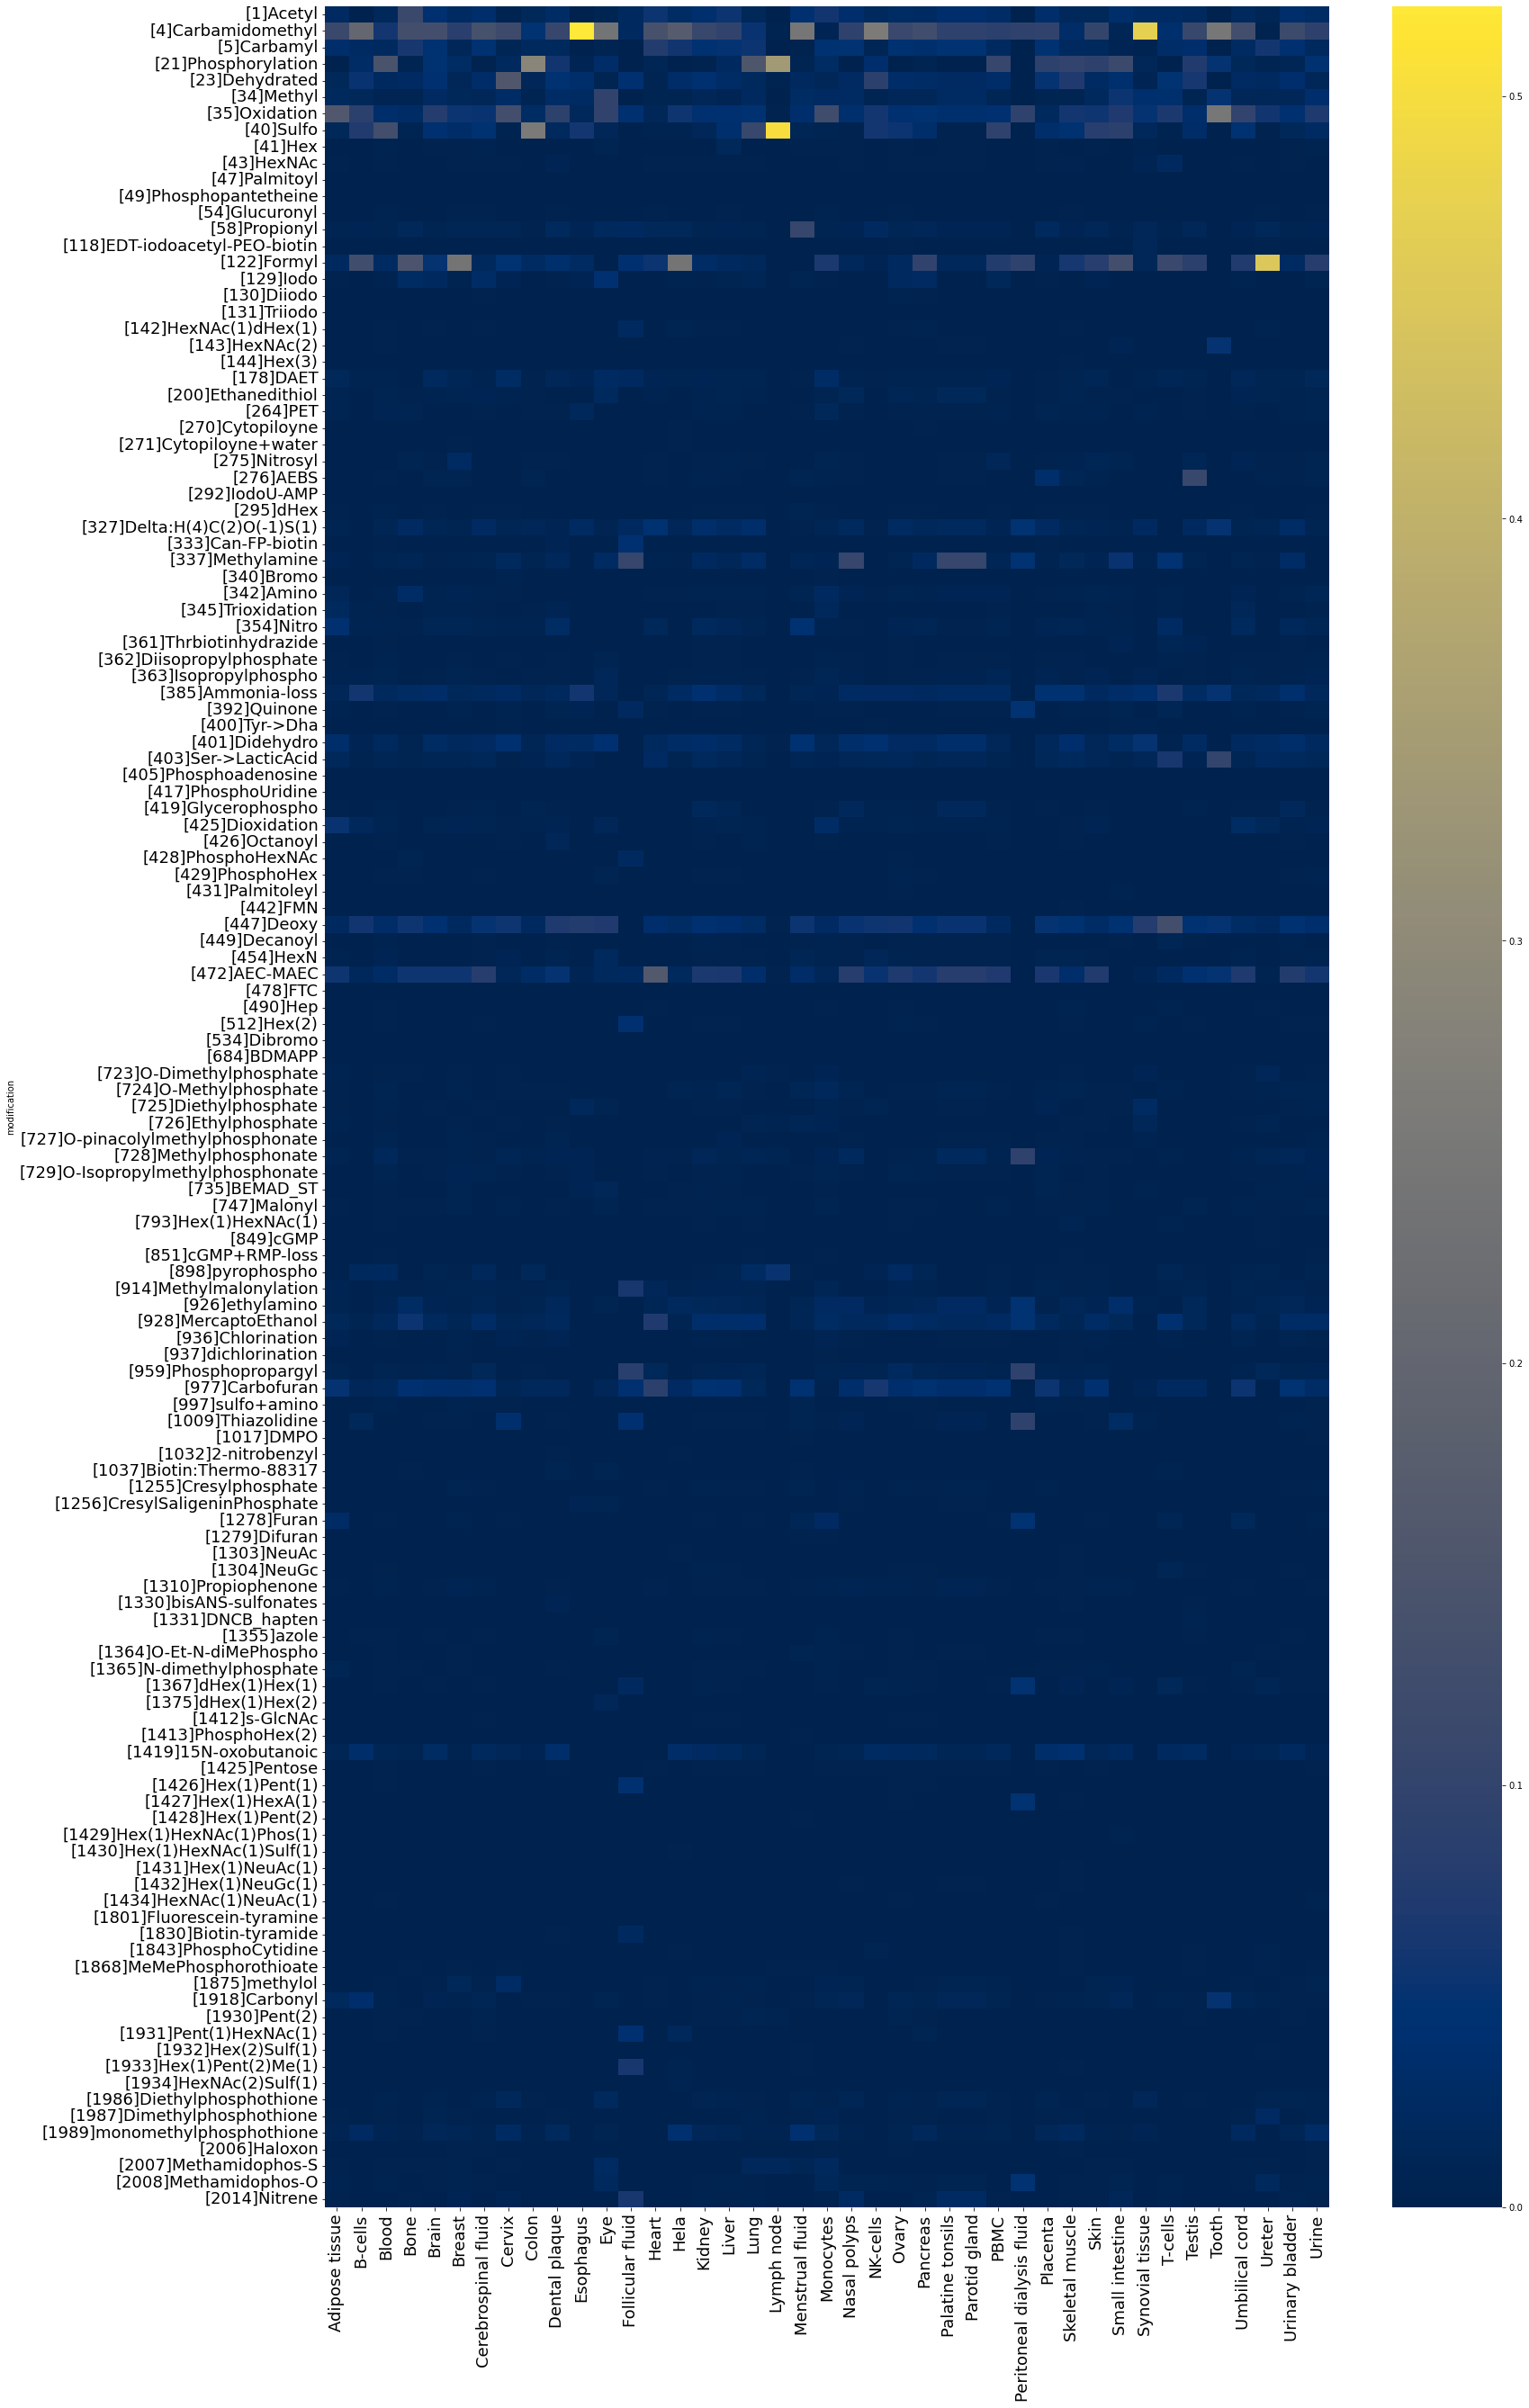

In [145]:
plt.figure(figsize=(25,45))
res = sns.heatmap(data=tspec_modplot.set_index(["modification"])[list_tissues_STY], yticklabels=True, cmap="cividis")
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
#plt.savefig("tspecsites_othermods.png", format="png", bbox_inches="tight")
plt.show()

In [146]:
list_mod1 = taspecP_allmod_sites_gr["modification"].to_list()
list_mod1 = sorted(list_mod1)
list_mod = []
for n in list_mod1:
    if n==list_mod1[0] and len(list_mod)==0:
        list_mod.append(n)
    elif n != list_mod[-1]:
        list_mod.append(n)
list_mod

['[1009]Thiazolidine',
 '[1017]DMPO',
 '[1032]2-nitrobenzyl',
 '[1037]Biotin:Thermo-88317',
 '[118]EDT-iodoacetyl-PEO-biotin',
 '[122]Formyl',
 '[1255]Cresylphosphate',
 '[1256]CresylSaligeninPhosphate',
 '[1278]Furan',
 '[1279]Difuran',
 '[129]Iodo',
 '[1303]NeuAc',
 '[1304]NeuGc',
 '[130]Diiodo',
 '[1310]Propiophenone',
 '[131]Triiodo',
 '[1330]bisANS-sulfonates',
 '[1331]DNCB_hapten',
 '[1355]azole',
 '[1364]O-Et-N-diMePhospho',
 '[1365]N-dimethylphosphate',
 '[1367]dHex(1)Hex(1)',
 '[1375]dHex(1)Hex(2)',
 '[1412]s-GlcNAc',
 '[1413]PhosphoHex(2)',
 '[1419]15N-oxobutanoic',
 '[1425]Pentose',
 '[1426]Hex(1)Pent(1)',
 '[1427]Hex(1)HexA(1)',
 '[1428]Hex(1)Pent(2)',
 '[1429]Hex(1)HexNAc(1)Phos(1)',
 '[142]HexNAc(1)dHex(1)',
 '[1430]Hex(1)HexNAc(1)Sulf(1)',
 '[1431]Hex(1)NeuAc(1)',
 '[1432]Hex(1)NeuGc(1)',
 '[1434]HexNAc(1)NeuAc(1)',
 '[143]HexNAc(2)',
 '[144]Hex(3)',
 '[178]DAET',
 '[1801]Fluorescein-tyramine',
 '[1830]Biotin-tyramide',
 '[1843]PhosphoCytidine',
 '[1868]MeMePhosphorothio

In [147]:
list_mod.append("[21]Phosphorylation")
list_mod = sorted(list_mod)

In [148]:
list_nr = dict()
for mod in list_mod:
    split = mod.split("]")
    split_nr = split[0][1:]
    split_name = split[1]
    list_nr[int(split_nr)] = split_name
list_nr_sorted = sorted(list_nr)
list_nr2 = dict()
for i in list_nr_sorted:
    list_nr2[i] = list_nr[i]
list_keys = list(list_nr2.keys())
list_vals = list(list_nr2.values())
list_mod_sorted = []
for i, key in enumerate(list_keys):
    list_mod_sorted.append("["+str(key)+"]"+list_vals[i])
list_mod_sorted

['[1]Acetyl',
 '[4]Carbamidomethyl',
 '[5]Carbamyl',
 '[21]Phosphorylation',
 '[23]Dehydrated',
 '[34]Methyl',
 '[35]Oxidation',
 '[40]Sulfo',
 '[41]Hex',
 '[43]HexNAc',
 '[47]Palmitoyl',
 '[49]Phosphopantetheine',
 '[54]Glucuronyl',
 '[58]Propionyl',
 '[118]EDT-iodoacetyl-PEO-biotin',
 '[122]Formyl',
 '[129]Iodo',
 '[130]Diiodo',
 '[131]Triiodo',
 '[142]HexNAc(1)dHex(1)',
 '[143]HexNAc(2)',
 '[144]Hex(3)',
 '[178]DAET',
 '[200]Ethanedithiol',
 '[264]PET',
 '[270]Cytopiloyne',
 '[271]Cytopiloyne+water',
 '[275]Nitrosyl',
 '[276]AEBS',
 '[292]IodoU-AMP',
 '[295]dHex',
 '[327]Delta:H(4)C(2)O(-1)S(1)',
 '[333]Can-FP-biotin',
 '[337]Methylamine',
 '[340]Bromo',
 '[342]Amino',
 '[345]Trioxidation',
 '[354]Nitro',
 '[361]Thrbiotinhydrazide',
 '[362]Diisopropylphosphate',
 '[363]Isopropylphospho',
 '[385]Ammonia-loss',
 '[392]Quinone',
 '[397]Triiodothyronine',
 '[400]Tyr->Dha',
 '[401]Didehydro',
 '[403]Ser->LacticAcid',
 '[405]Phosphoadenosine',
 '[417]PhosphoUridine',
 '[419]Glycerophospho

In [149]:
taspec_modplot = pd.DataFrame({"modification": list_mod_sorted})
i=0
for tissue in list_tissues_STY:
    list_counts = []
    for mod in list_mod_sorted:
        if mod != "[21]Phosphorylation":
            count = taspecP_allmod_sites_gr.loc[(taspecP_allmod_sites_gr["tissue"].str.contains(tissue))&(taspecP_allmod_sites_gr["modification"]==mod),:].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modification": "first"}).shape[0]
            list_counts.append(count)
        else:
            count = distr_sites["number of tissue-specific sites"][i]
            list_counts.append(count)
    colname = "abs_"+tissue
    taspec_modplot[colname] = list_counts
    i+=1
taspec_modplot

modification  abs_Adipose tissue  abs_B-cells  \
0                        [1]Acetyl                  86           18   
1               [4]Carbamidomethyl                 248          148   
2                      [5]Carbamyl                  87           39   
3              [21]Phosphorylation                   0           16   
4                   [23]Dehydrated                  51           11   
..                             ...                 ...          ...   
129  [1989]monomethylphosphothione                  35            9   
130                  [2006]Haloxon                   1            0   
131          [2007]Methamidophos-S                   9            0   
132          [2008]Methamidophos-O                  18            0   
133                  [2014]Nitrene                  16            0   

     abs_Blood  abs_Bone  abs_Brain  abs_Breast  abs_Cerebrospinal fluid  \
0          126        11        146          13                      119   
1          428        47        304          89                      372   
2          180         8        144          13                      172   
3         1642         2        121          26                        9   
4          118         3         93          23                       67   
..         ...       ...        ...         ...                      ...   
129         89         0         27          15                       34   
130          3         0          0           0                        1   
131         19         0          8           9                        5   
132         44         0         11           5                       24   
133         13         0          9           9                        9   

     abs_Cervix  abs_Colon  ...  abs_Skin  abs_Small intestine  \
0             4        240  ...       123                   49   
1            36        631  ...       523                   17   
2            13        334  ...       109                   40   
3             7       5252  ...       574                  121   
4            18        200  ...       139                   46   
..          ...        ...  ...       ...                  ...   
129           3        107  ...        48                    1   
130           0          5  ...         7                    1   
131           2         63  ...        17                    1   
132           1         25  ...        28                   14   
133           2         60  ...        24                   28   

     abs_Synovial tissue  abs_T-cells  abs_Testis  abs_Tooth  \
0                      1            2          94          0   
1                     56            6         276          0   
2                      2            1         149          0   
3                      3            0         259          1   
4                      0            4         174          1   
..                   ...          ...         ...        ...   
129                    0            0          14          0   
130                    0            0           0          0   
131                    0            0           7          0   
132                    0            1           5          0   
133                    1            2          11          0   

     abs_Umbilical cord  abs_Ureter  abs_Urinary bladder  abs_Urine  
0                   139           1                  179         19  
1                   572           3                  521         90  
2                   154          18                  256         39  
3                    87           3                   61         78  
4                   119           2                  148         20  
..                  ...         ...                  ...        ...  
129                 149           2                   84         22  
130                   3           0                    5          1  
131                  20           1                   14        

In [150]:
for tissue in list_tissues_STY:
    colname = "abs_"+tissue
    taspec_modplot[tissue] = taspec_modplot[colname]/taspec_modplot[colname].sum()
taspec_modplot

modification  abs_Adipose tissue  abs_B-cells  \
0                        [1]Acetyl                  86           18   
1               [4]Carbamidomethyl                 248          148   
2                      [5]Carbamyl                  87           39   
3              [21]Phosphorylation                   0           16   
4                   [23]Dehydrated                  51           11   
..                             ...                 ...          ...   
129  [1989]monomethylphosphothione                  35            9   
130                  [2006]Haloxon                   1            0   
131          [2007]Methamidophos-S                   9            0   
132          [2008]Methamidophos-O                  18            0   
133                  [2014]Nitrene                  16            0   

     abs_Blood  abs_Bone  abs_Brain  abs_Breast  abs_Cerebrospinal fluid  \
0          126        11        146          13                      119   
1          428        47        304          89                      372   
2          180         8        144          13                      172   
3         1642         2        121          26                        9   
4          118         3         93          23                       67   
..         ...       ...        ...         ...                      ...   
129         89         0         27          15                       34   
130          3         0          0           0                        1   
131         19         0          8           9                        5   
132         44         0         11           5                       24   
133         13         0          9           9                        9   

     abs_Cervix  abs_Colon  ...      Skin  Small intestine  Synovial tissue  \
0             4        240  ...  0.019740         0.035125         0.008065   
1            36        631  ...  0.083935         0.012186         0.451613   
2            13        334  ...  0.017493         0.028674         0.016129   
3             7       5252  ...  0.092120         0.086738         0.024194   
4            18        200  ...  0.022308         0.032975         0.000000   
..          ...        ...  ...       ...              ...              ...   
129           3        107  ...  0.007703         0.000717         0.000000   
130           0          5  ...  0.001123         0.000717         0.000000   
131           2         63  ...  0.002728         0.000717         0.000000   
132           1         25  ...  0.004494         0.010036         0.000000   
133           2         60  ...  0.003852         0.020072         0.008065   

      T-cells    Testis     Tooth  Umbilical cord    Ureter  Urinary bladder  \
0    0.012270  0.030759  0.000000        0.022279  0.002597         0.031959   
1    0.036810  0.090314  0.000000        0.091681  0.007792         0.093019   
2    0.006135  0.048757  0.000000        0.024683  0.046753         0.045706   
3    0.000000  0.084751  0.090909        0.013945  0.007792         0.010891   
4    0.024540  0.056937  0.090909        0.019074  0.005195         0.026424   
..        ...       ...       ...             ...       ...              ...   
129  0.000000  0.004581  0.000000        0.023882  0.005195         0.014997   
130  0.000000  0.000000  0.000000        0.000481  0.000000         0.000893   
131  0.000000  0.002291  0.000000        0.003206  0.002597         0.002500   
132  0.006135  0.001636  0.000000        0.007052  0.031169         0.006785   
133  0.012270  0.003599  0.000000        0.003206  0.000000         0.010355   

        Urine  
0    0.015860  
1    0.075125  
2    0.032554  
3    0.065109  
4    0.016694  
..        ...  
129  0.018364  
130  0.000835  
131  0.000835  
132  0.001669  
133  0.001669  

[134 rows x 83 columns]

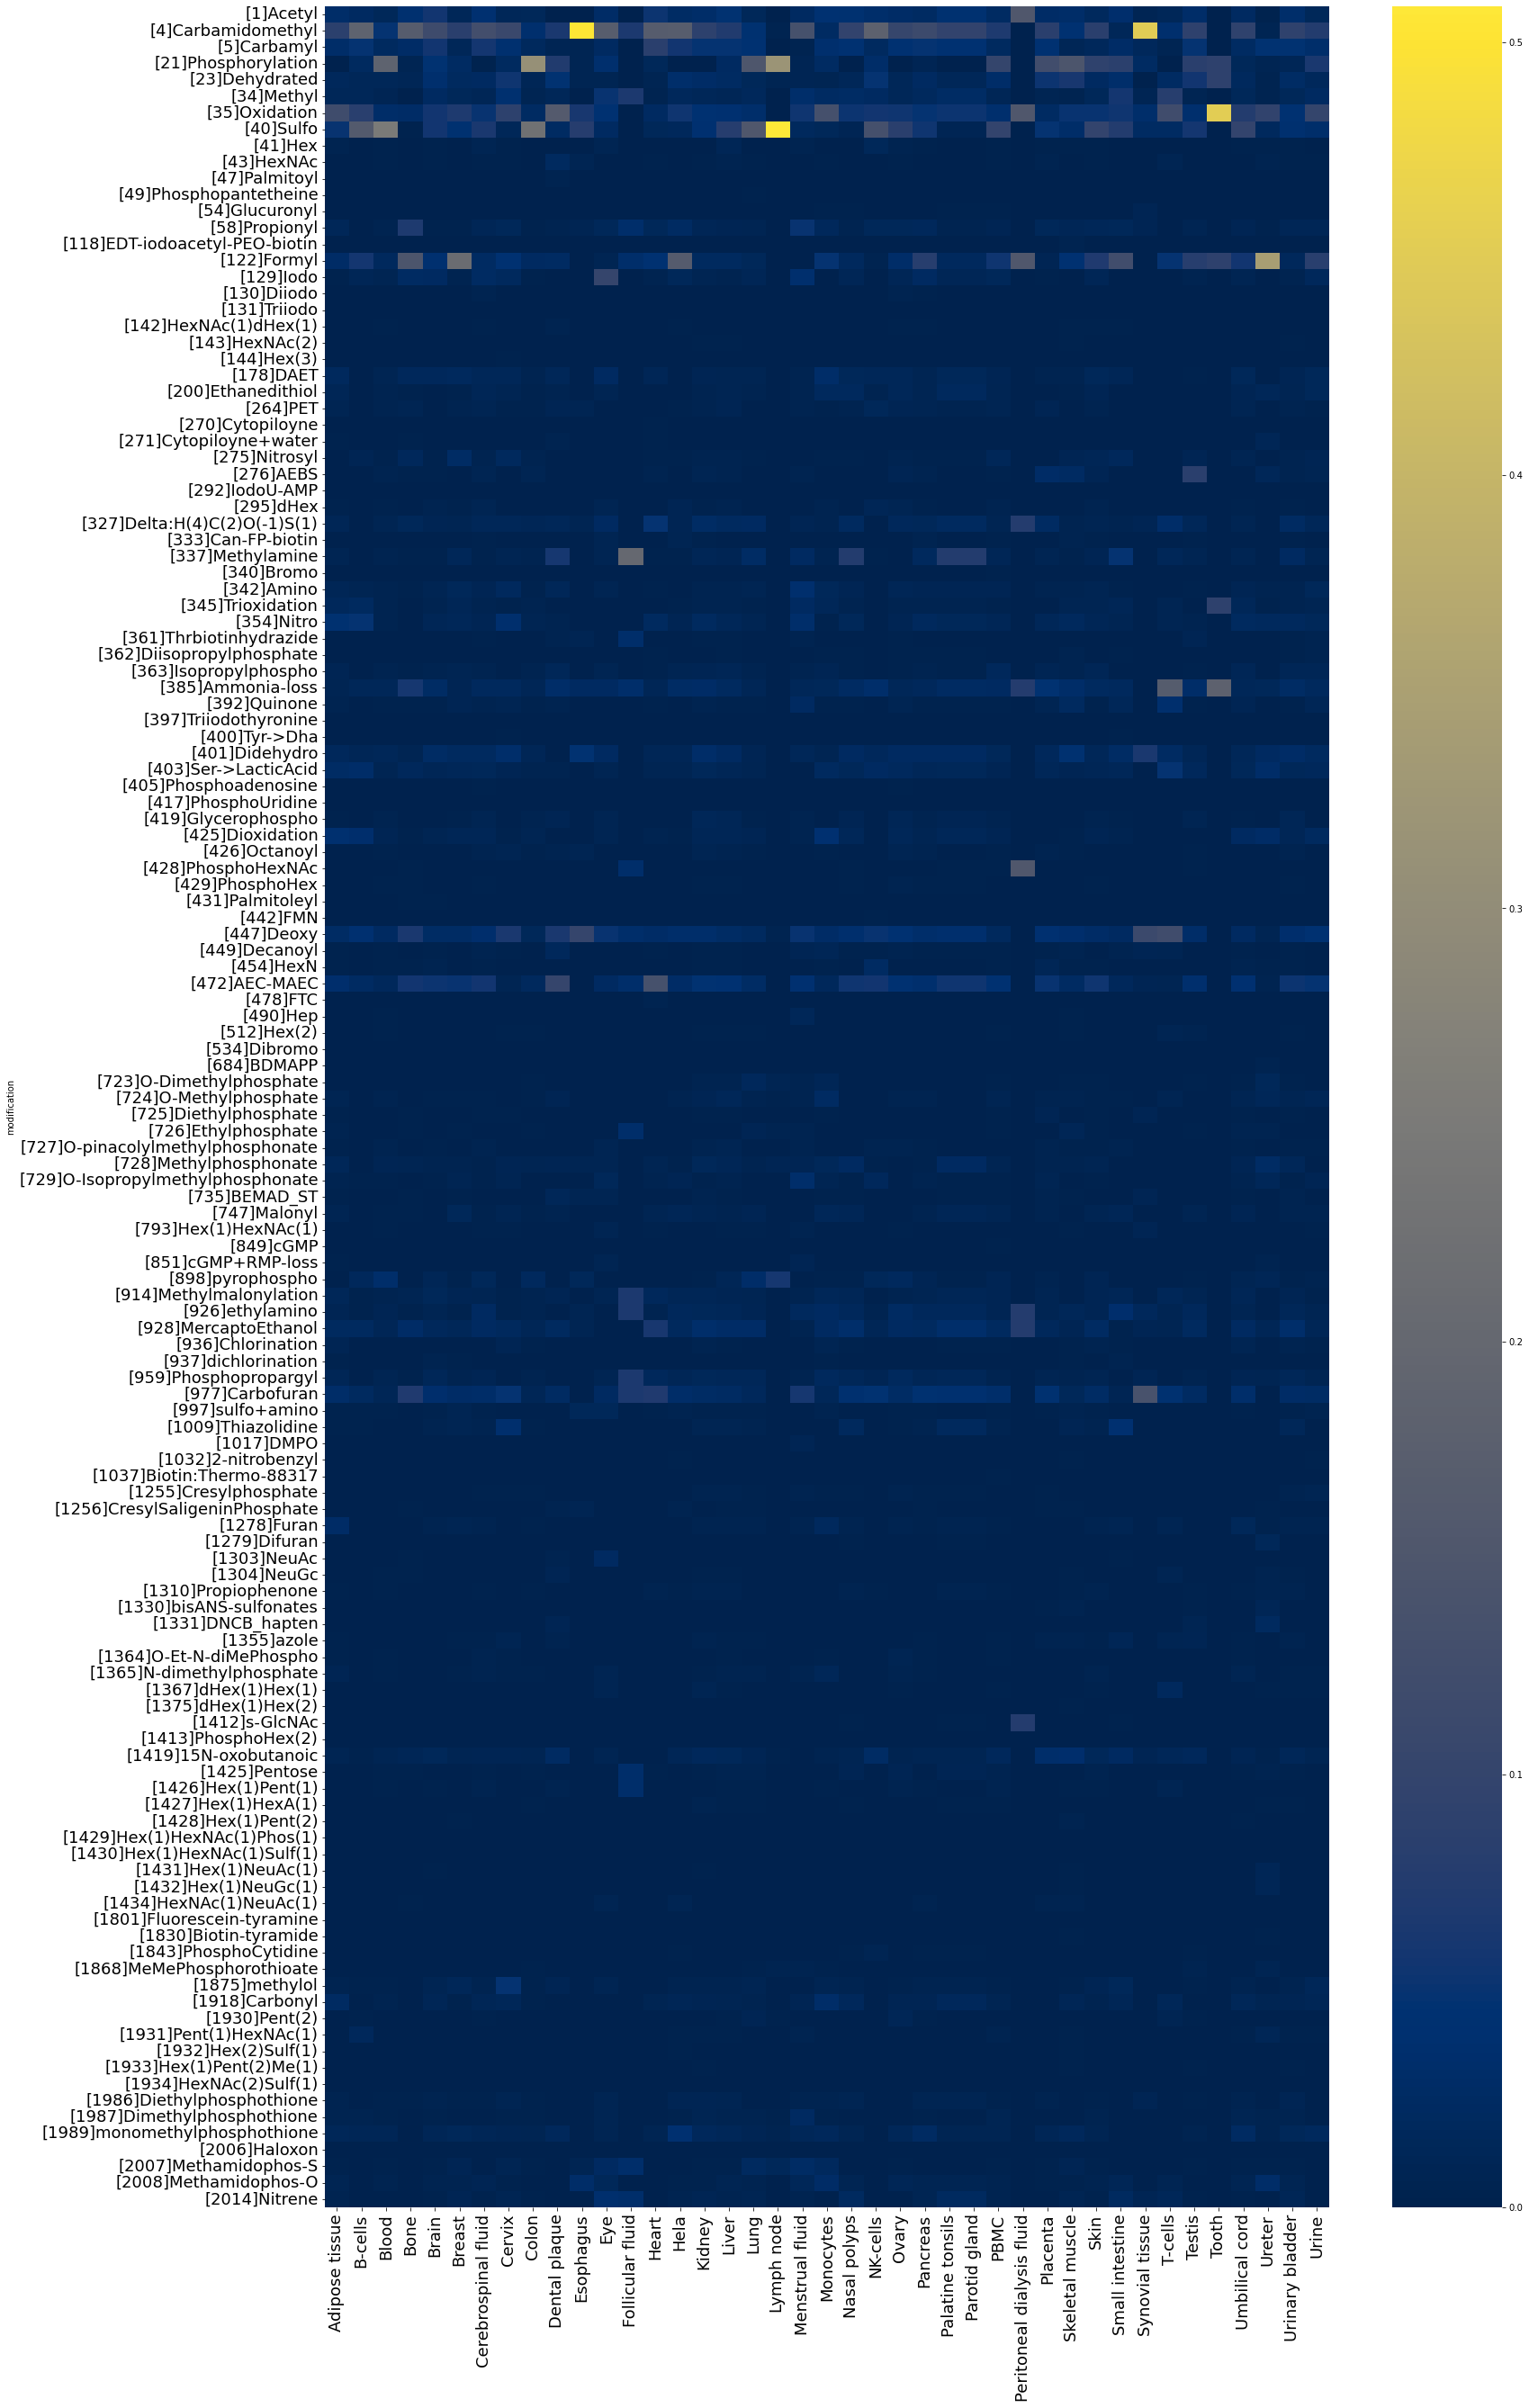

In [151]:
plt.figure(figsize=(25,45))
res = sns.heatmap(data=taspec_modplot.set_index(["modification"])[list_tissues_STY], yticklabels=True, cmap="cividis")
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
#plt.savefig("taspecsites_othermods.png", format="png", bbox_inches="tight")
plt.show()

In [152]:
list_mod1 = genP_allmod_sites_gr["modification"].to_list()
list_mod1 = sorted(list_mod1)
list_mod = []
for n in list_mod1:
    if n==list_mod1[0] and len(list_mod)==0:
        list_mod.append(n)
    elif n != list_mod[-1]:
        list_mod.append(n)
list_mod

['[1009]Thiazolidine',
 '[1017]DMPO',
 '[1032]2-nitrobenzyl',
 '[1037]Biotin:Thermo-88317',
 '[118]EDT-iodoacetyl-PEO-biotin',
 '[122]Formyl',
 '[1255]Cresylphosphate',
 '[1256]CresylSaligeninPhosphate',
 '[1278]Furan',
 '[1279]Difuran',
 '[129]Iodo',
 '[1303]NeuAc',
 '[1304]NeuGc',
 '[130]Diiodo',
 '[1310]Propiophenone',
 '[131]Triiodo',
 '[1330]bisANS-sulfonates',
 '[1331]DNCB_hapten',
 '[1355]azole',
 '[1364]O-Et-N-diMePhospho',
 '[1365]N-dimethylphosphate',
 '[1367]dHex(1)Hex(1)',
 '[1375]dHex(1)Hex(2)',
 '[1412]s-GlcNAc',
 '[1413]PhosphoHex(2)',
 '[1419]15N-oxobutanoic',
 '[1425]Pentose',
 '[1426]Hex(1)Pent(1)',
 '[1427]Hex(1)HexA(1)',
 '[1428]Hex(1)Pent(2)',
 '[1429]Hex(1)HexNAc(1)Phos(1)',
 '[142]HexNAc(1)dHex(1)',
 '[1430]Hex(1)HexNAc(1)Sulf(1)',
 '[1431]Hex(1)NeuAc(1)',
 '[1432]Hex(1)NeuGc(1)',
 '[1434]HexNAc(1)NeuAc(1)',
 '[143]HexNAc(2)',
 '[144]Hex(3)',
 '[178]DAET',
 '[1801]Fluorescein-tyramine',
 '[1830]Biotin-tyramide',
 '[1843]PhosphoCytidine',
 '[1868]MeMePhosphorothio

In [153]:
list_mod.append("[21]Phosphorylation")
list_mod = sorted(list_mod)

In [154]:
list_nr = dict()
for mod in list_mod:
    split = mod.split("]")
    split_nr = split[0][1:]
    split_name = split[1]
    list_nr[int(split_nr)] = split_name
list_nr_sorted = sorted(list_nr)
list_nr2 = dict()
for i in list_nr_sorted:
    list_nr2[i] = list_nr[i]
list_keys = list(list_nr2.keys())
list_vals = list(list_nr2.values())
list_mod_sorted = []
for i, key in enumerate(list_keys):
    list_mod_sorted.append("["+str(key)+"]"+list_vals[i])
list_mod_sorted

['[1]Acetyl',
 '[4]Carbamidomethyl',
 '[5]Carbamyl',
 '[21]Phosphorylation',
 '[23]Dehydrated',
 '[34]Methyl',
 '[35]Oxidation',
 '[40]Sulfo',
 '[41]Hex',
 '[43]HexNAc',
 '[47]Palmitoyl',
 '[49]Phosphopantetheine',
 '[54]Glucuronyl',
 '[58]Propionyl',
 '[118]EDT-iodoacetyl-PEO-biotin',
 '[122]Formyl',
 '[129]Iodo',
 '[130]Diiodo',
 '[131]Triiodo',
 '[142]HexNAc(1)dHex(1)',
 '[143]HexNAc(2)',
 '[144]Hex(3)',
 '[178]DAET',
 '[200]Ethanedithiol',
 '[264]PET',
 '[270]Cytopiloyne',
 '[271]Cytopiloyne+water',
 '[275]Nitrosyl',
 '[276]AEBS',
 '[292]IodoU-AMP',
 '[295]dHex',
 '[327]Delta:H(4)C(2)O(-1)S(1)',
 '[333]Can-FP-biotin',
 '[337]Methylamine',
 '[340]Bromo',
 '[342]Amino',
 '[345]Trioxidation',
 '[354]Nitro',
 '[361]Thrbiotinhydrazide',
 '[362]Diisopropylphosphate',
 '[363]Isopropylphospho',
 '[385]Ammonia-loss',
 '[392]Quinone',
 '[397]Triiodothyronine',
 '[400]Tyr->Dha',
 '[401]Didehydro',
 '[403]Ser->LacticAcid',
 '[405]Phosphoadenosine',
 '[417]PhosphoUridine',
 '[419]Glycerophospho

In [155]:
gen_modplot = pd.DataFrame({"modification": list_mod_sorted})
i=0
for tissue in list_tissues_STY:
    list_counts = []
    for mod in list_mod_sorted:
        if mod != "[21]Phosphorylation":
            count = genP_allmod_sites_gr.loc[(genP_allmod_sites_gr["tissue"].str.contains(tissue))&(genP_allmod_sites_gr["modification"]==mod),:].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modification": "first"}).shape[0]
            list_counts.append(count)
        else:
            count = distr_sites["number of tissue-specific sites"][i]
            list_counts.append(count)
    colname = "abs_"+tissue
    gen_modplot[colname] = list_counts
    i+=1
gen_modplot

modification  abs_Adipose tissue  abs_B-cells  \
0                        [1]Acetyl                  63           26   
1               [4]Carbamidomethyl                 179          105   
2                      [5]Carbamyl                  74            5   
3              [21]Phosphorylation                   0           16   
4                   [23]Dehydrated                  51           13   
..                             ...                 ...          ...   
129  [1989]monomethylphosphothione                  61           17   
130                  [2006]Haloxon                   0            0   
131          [2007]Methamidophos-S                  34            1   
132          [2008]Methamidophos-O                  50            0   
133                  [2014]Nitrene                  22            9   

     abs_Blood  abs_Bone  abs_Brain  abs_Breast  abs_Cerebrospinal fluid  \
0          147        30        138          48                      166   
1          337        70        350          87                      379   
2          142        17        173          41                      201   
3         1642         2        121          26                        9   
4          115        17        139          16                      121   
..         ...       ...        ...         ...                      ...   
129        136         0         52          17                       71   
130          9         0          3           0                        5   
131         43         0         22          24                       20   
132         70         1         25          18                       21   
133         34         1         19          21                       21   

     abs_Cervix  abs_Colon  ...  abs_Skin  abs_Small intestine  \
0             1        179  ...       116                   21   
1            27        396  ...       369                    9   
2             2        240  ...       128                   12   
3             7       5252  ...       574                  121   
4            23        178  ...       118                   50   
..          ...        ...  ...       ...                  ...   
129           4        173  ...        84                    1   
130           1          7  ...         1                    1   
131           2        135  ...        68                    3   
132           0        107  ...        38                   22   
133          14         59  ...        44                   26   

     abs_Synovial tissue  abs_T-cells  abs_Testis  abs_Tooth  \
0                      2            5          48          0   
1                     95           10         234          2   
2                      0            5          83          0   
3                      3            0         259          1   
4                      0            1         115          0   
..                   ...          ...         ...        ...   
129                    0            0          26          0   
130                    0            0           0          0   
131                    0            0           9          0   
132                    0            0          11          0   
133                    0            0          15          0   

     abs_Umbilical cord  abs_Ureter  abs_Urinary bladder  abs_Urine  
0                   104           4                  148         42  
1                   349           3                  338         79  
2                   127          16                  211         50  
3                    87           3                   61         78  
4                   122          12                  126         17  
..                  ...         ...                  ...        ...  
129                 150           2                  114         22  
130                   0           0                    7          2  
131                  52           9                   45        

In [156]:
for tissue in list_tissues_STY:
    colname = "abs_"+tissue
    gen_modplot[tissue] = gen_modplot[colname]/gen_modplot[colname].sum()
gen_modplot

modification  abs_Adipose tissue  abs_B-cells  \
0                        [1]Acetyl                  63           26   
1               [4]Carbamidomethyl                 179          105   
2                      [5]Carbamyl                  74            5   
3              [21]Phosphorylation                   0           16   
4                   [23]Dehydrated                  51           13   
..                             ...                 ...          ...   
129  [1989]monomethylphosphothione                  61           17   
130                  [2006]Haloxon                   0            0   
131          [2007]Methamidophos-S                  34            1   
132          [2008]Methamidophos-O                  50            0   
133                  [2014]Nitrene                  22            9   

     abs_Blood  abs_Bone  abs_Brain  abs_Breast  abs_Cerebrospinal fluid  \
0          147        30        138          48                      166   
1          337        70        350          87                      379   
2          142        17        173          41                      201   
3         1642         2        121          26                        9   
4          115        17        139          16                      121   
..         ...       ...        ...         ...                      ...   
129        136         0         52          17                       71   
130          9         0          3           0                        5   
131         43         0         22          24                       20   
132         70         1         25          18                       21   
133         34         1         19          21                       21   

     abs_Cervix  abs_Colon  ...      Skin  Small intestine  Synovial tissue  \
0             1        179  ...  0.016785         0.018601          0.01250   
1            27        396  ...  0.053393         0.007972          0.59375   
2             2        240  ...  0.018521         0.010629          0.00000   
3             7       5252  ...  0.083056         0.107174          0.01875   
4            23        178  ...  0.017074         0.044287          0.00000   
..          ...        ...  ...       ...              ...              ...   
129           4        173  ...  0.012155         0.000886          0.00000   
130           1          7  ...  0.000145         0.000886          0.00000   
131           2        135  ...  0.009839         0.002657          0.00000   
132           0        107  ...  0.005498         0.019486          0.00000   
133          14         59  ...  0.006367         0.023029          0.00000   

      T-cells    Testis     Tooth  Umbilical cord    Ureter  Urinary bladder  \
0    0.023923  0.015345  0.000000        0.015789  0.008247         0.022377   
1    0.047847  0.074808  0.086957        0.052983  0.006186         0.051104   
2    0.023923  0.026535  0.000000        0.019280  0.032990         0.031902   
3    0.000000  0.082801  0.043478        0.013208  0.006186         0.009223   
4    0.004785  0.036765  0.000000        0.018521  0.024742         0.019050   
..        ...       ...       ...             ...       ...              ...   
129  0.000000  0.008312  0.000000        0.022772  0.004124         0.017236   
130  0.000000  0.000000  0.000000        0.000000  0.000000         0.001058   
131  0.000000  0.002877  0.000000        0.007894  0.018557         0.006804   
132  0.000000  0.003517  0.000000        0.009716  0.043299         0.015271   
133  0.000000  0.004795  0.000000        0.003644  0.000000         0.009676   

        Urine  
0    0.030905  
1    0.058131  
2    0.036792  
3    0.057395  
4    0.012509  
..        ...  
129  0.016188  
130  0.001472  
131  0.002943  
132  0.003679  
133  0.006623  

[134 rows x 83 columns]

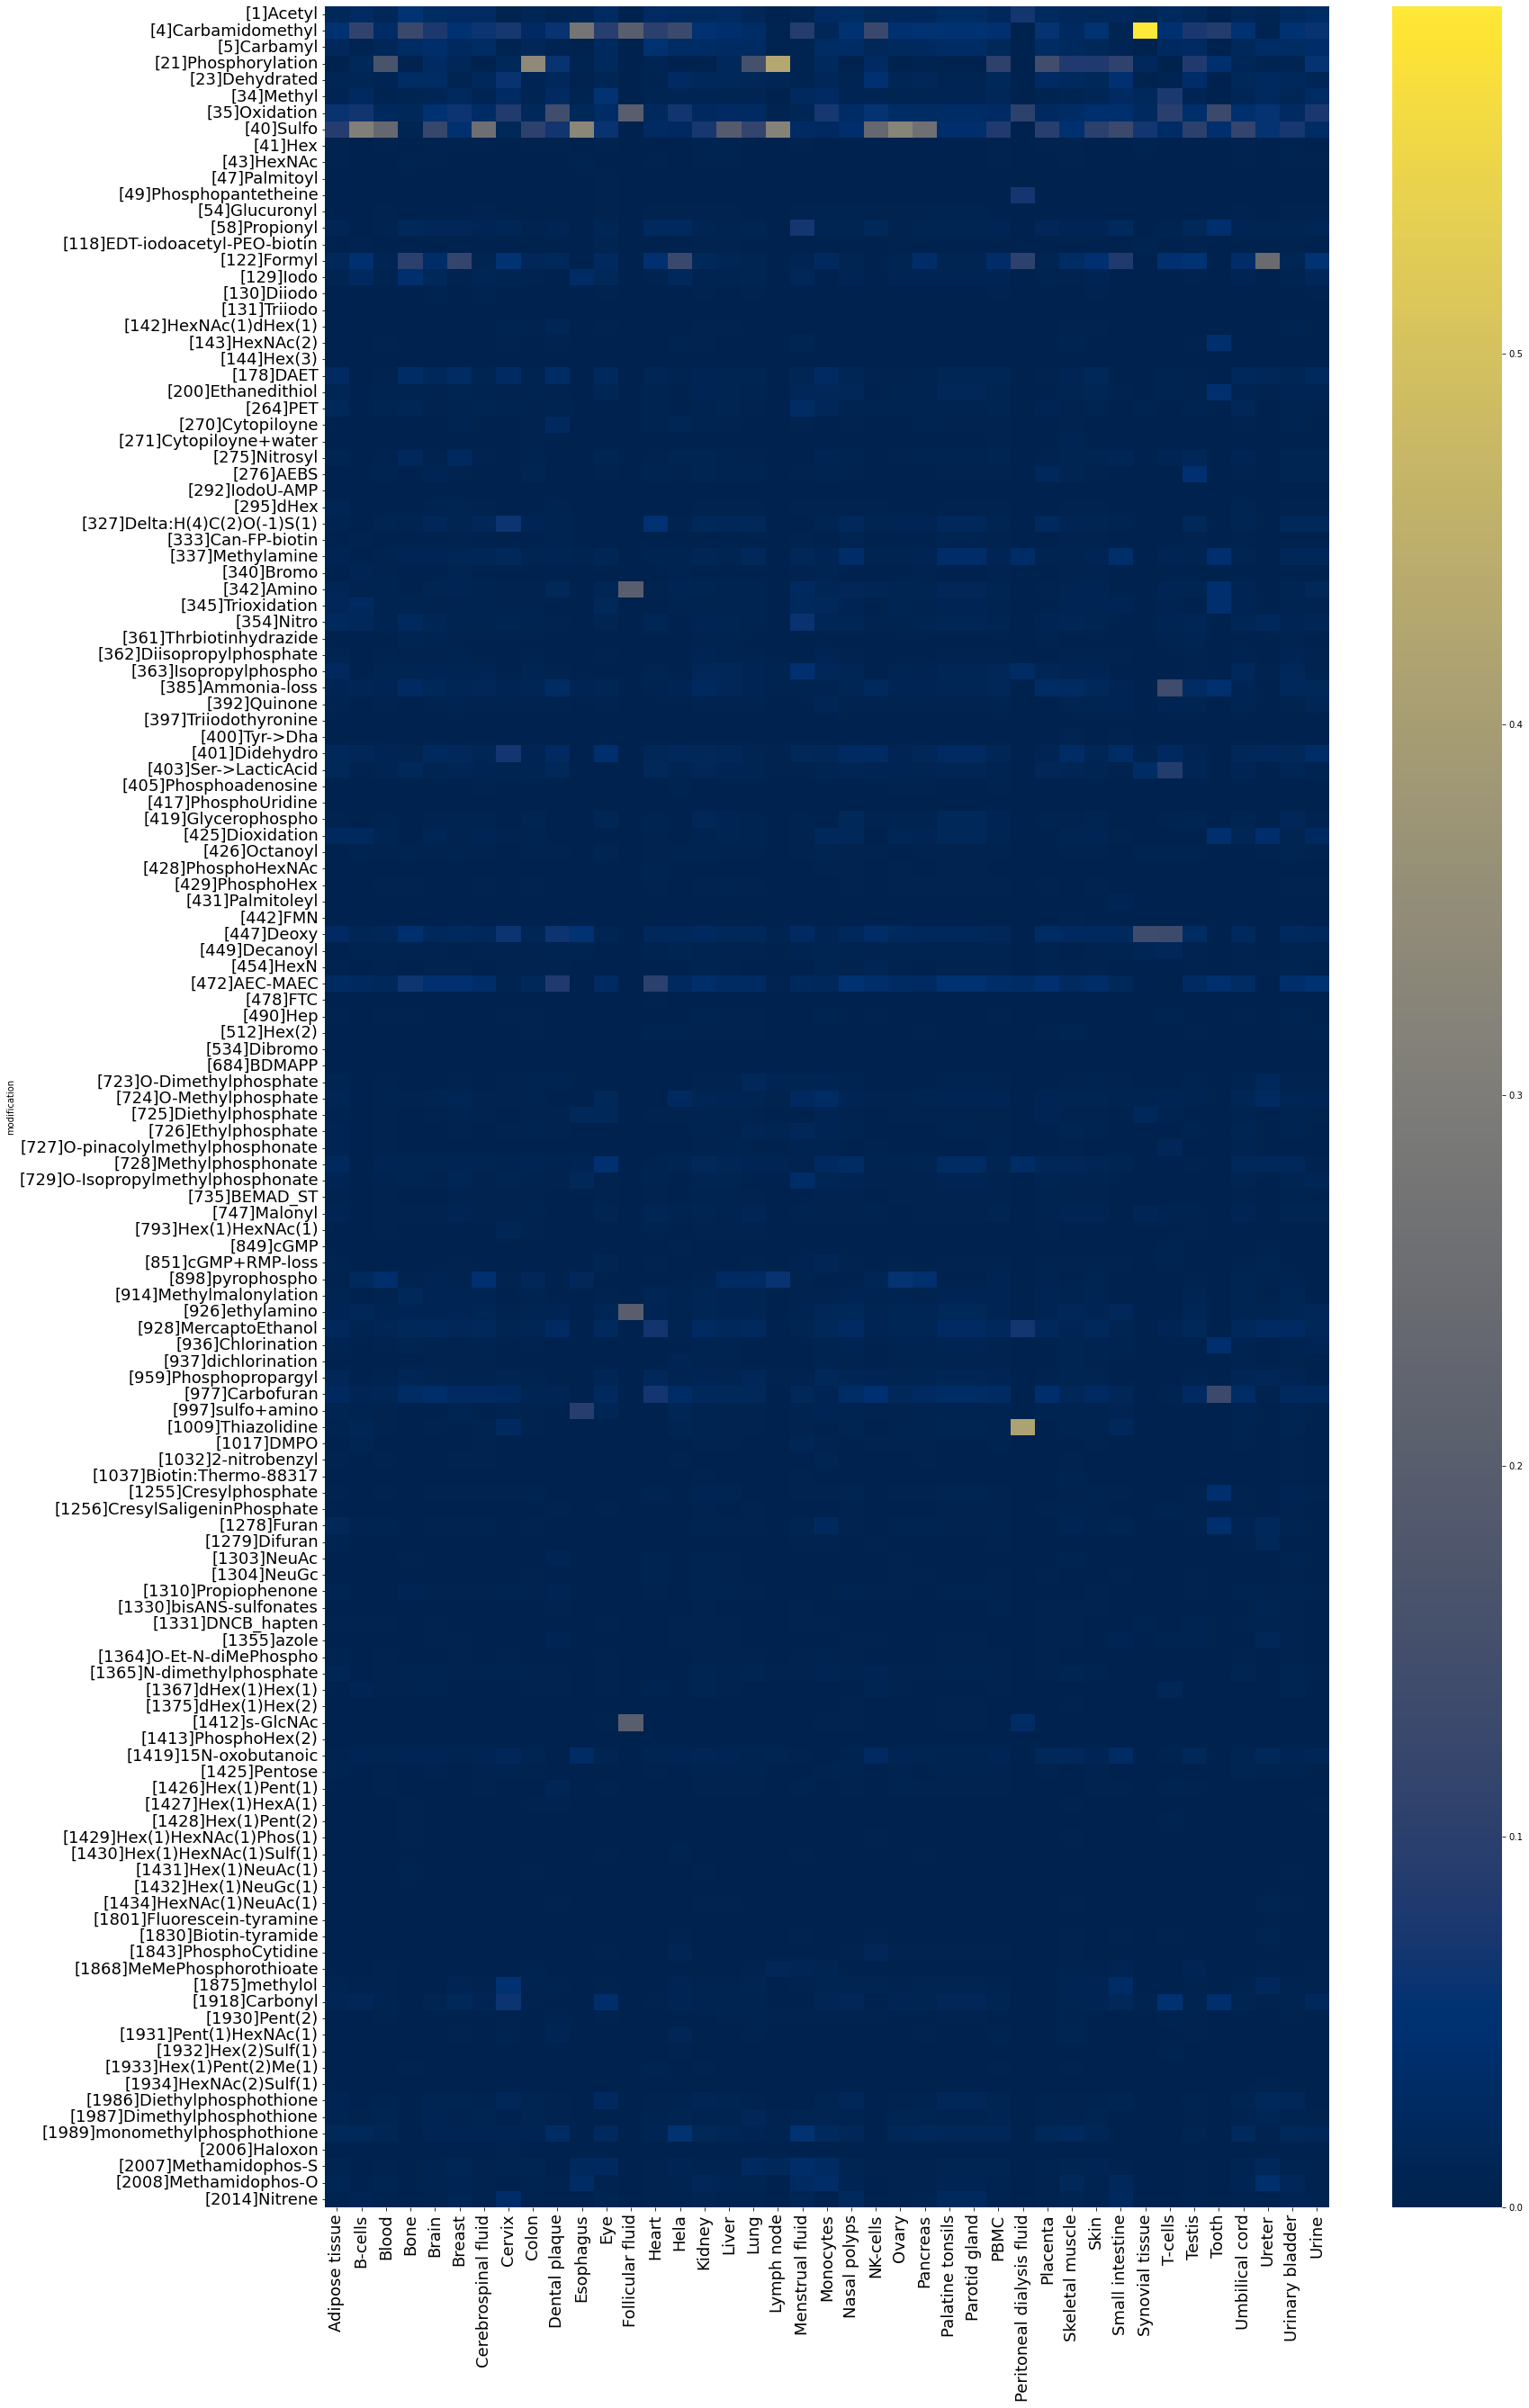

In [157]:
plt.figure(figsize=(25,45))
res = sns.heatmap(data=gen_modplot.set_index(["modification"])[list_tissues_STY], yticklabels=True, cmap="cividis")
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
plt.savefig("gensites_othermods.png", format="png", bbox_inches="tight")
plt.show()

## Comparison of the frequency of identification

We'll now compare the frequency of identification of P-sites specifically, veryfying if these sites have been found most frequently phosphorylated or another modification is more frequent. The latter, especially in combination with a low frequency of identification of a P-site as phosphorylated, might point towards false positives.

In [158]:
data_all_mod

proj              peptide modres  UP_POS  ACC_ID  pep_start  \
0        PXD000004    AEVMADTAVALASGNVK      T    2034  P21359       2028   
1        PXD000004  DMGEMVTQGQTDAQYMFLR      T    1129  Q01082       1123   
2        PXD000004    GGPNTVTPPPTTPEWVK      T      87  Q13733         83   
3        PXD000004         QVSSLLTNHLAR      S    1357  Q9Y4D8       1355   
4        PXD000004    ITFTPSSGIASEVTVPK      S     728  Q92752        718   
...            ...                  ...    ...     ...     ...        ...   
4049439  PXD011609          TASTNNIAQAR      T       5  Q9UBI6          5   
4049440  PXD011609          QGSYHEQSVDR      S    1503  P20930       1501   
4049441  PXD011609       HSGTGHGQASSAVR      T     725  P20930        722   
4049442  PXD011609              SPEDLER      S     283  Q8N196        283   
4049443  PXD011609              SPEDLER      S     455  P06744        455   

         pep_end  unimod                  modification tissue enrichment  \
0           2044     447                    [447]Deoxy  Brain       None   
1           1141       4            [4]Carbamidomethyl  Brain       None   
2             99       1                     [1]Acetyl  Brain       None   
3           1366     385             [385]Ammonia-loss  Brain       None   
4            734     327  [327]Delta:H(4)C(2)O(-1)S(1)  Brain       None   
...          ...     ...                           ...    ...        ...   
4049439       15       4            [4]Carbamidomethyl   Skin       None   
4049440     1511     385             [385]Ammonia-loss   Skin       None   
4049441      735     426                 [426]Octanoyl   Skin       None   
4049442      289       4            [4]Carbamidomethyl   Skin       None   
4049443      461       4            [4]Carbamidomethyl   Skin       None   

        modification_enrichment method additional  
0                          None   None       None  
1                          None   None       None  
2                          None   None       None  
3                          None   None       None  
4                          None   None       None  
...                         ...    ...        ...  
4049439                    None   None       None  
4049440                    None   None       None  
4049441                    None   None       None  
4049442                    None   None       None  
4049443                    None   None       None  

[4042382 rows x 14 columns]

We read the phosphodata. Based on previous classifications, we classify P-sites as tissue-specific, tissue aspecific, and pervasive P-sites. For each category, we calculate the frequency of identification.

In [159]:
data_P = pd.read_csv("phospho_data_tissue_annotation_enrichment1.txt", sep="\t")
data_P.dropna(axis=0, subset=["tissue"], inplace=True)
data_P

proj            peptide modres  UP_POS  ACC_ID  pep_start  \
0       PXD000004         RPPSPEPSTK      S    2102  Q01082       2099   
1       PXD000004         ACVVHGSDLK      C     660  P50993        659   
2       PXD000004         ACVVHGSDLK      C     663  P05023        662   
3       PXD000004       AISPTSATSSGR      S     600  Q9Y4I1        598   
4       PXD000004     FYYTAGSSSPTHAK      S     198  O75508        190   
...           ...                ...    ...     ...     ...        ...   
646011  PXD011609     SFSTASAITPSVSR      S      18  P13647         16   
646012  PXD011609  SGGGFSSGSAGIINYQR      S      21  P04264         13   
646013  PXD011609  SGGGFSSGSAGIINYQR      S      21  P04264         13   
646014  PXD011609  SGGGFSSGSAGIINYQR      S      19  P04264         13   
646015  PXD011609  SGGGFSSGSAGIINYQR      S      19  P04264         13   

        pep_end tissue enrichment modification method additional  
0          2108  Brain       None         None   None       None  
1           668  Brain       None         None   None       None  
2           671  Brain       None         None   None       None  
3           609  Brain       None         None   None       None  
4           203  Brain       None         None   None       None  
...         ...    ...        ...          ...    ...        ...  
646011       29   Skin       None         None   None       None  
646012       29   Skin       None         None   None       None  
646013       29   Skin       None         None   None       None  
646014       29   Skin       None         None   None       None  
646015       29   Skin       None         None   None       None  

[586479 rows x 12 columns]

In [160]:
tspec_sites_allP = pd.merge(data_P, tspec_sites[["ACC_ID", "UP_POS"]], how="inner", on=["ACC_ID", "UP_POS"])
tspec_sites_allP

proj                         peptide modres  UP_POS  ACC_ID  \
0      PXD000004                 LTCQVEHDGQPAVSK      T     329  Q5TFQ8   
1      PXD000004                 LTCQVEHDGQPAVSK      T     330  P78324   
2      PXD000004                  NDGGIYTCFAENNR      Y     482  Q12860   
3      PXD000004                  ALAIEDRFVYIAAR      Y     505  Q9NVR0   
4      PXD000004                   CTELNQAWSSLGK      T    1315  Q13813   
...          ...                             ...    ...     ...     ...   
63090  PXD011609               AIGGGLSSVGGGSSTIK      S     547  P02538   
63091  PXD011609               AIGGGLSSVGGGSSTIK      S     547  P48668   
63092  PXD011609               GLGVGFGSGGGSSSSVK      S     571  P13647   
63093  PXD011609  GGGFGGGSSFGGGSGFSGGGFGGGGFGGGR      S     106  P35908   
63094  PXD011609            SGSFLYQVSTHEQSESAHGR      Y    1767  P20930   

       pep_start  pep_end tissue enrichment modification method additional  
0            328      342  Brain       None         None   None       None  
1            329      343  Brain       None         None   None       None  
2            477      490  Brain       None         None   None       None  
3            496      509  Brain       None         None   None       None  
4           1314     1326  Brain       None         None   None       None  
...          ...      ...    ...        ...          ...    ...        ...  
63090        534      550   Skin       None         None   None       None  
63091        534      550   Skin       None         None   None       None  
63092        560      576   Skin       None         None   None       None  
63093         93      122   Skin       None         None   None       None  
63094       1762     1781   Skin       None         None   None       None  

[63095 rows x 12 columns]

In [161]:
tspec_sites_allP_freq = tspec_sites_allP.groupby(["ACC_ID", "UP_POS", "tissue"], as_index=False)["proj"].count()
tspec_sites_allP_freq

ACC_ID  UP_POS           tissue  proj
0      A0A075B6H7      30             Lung     1
1      A0A075B6S5      52  Menstrual fluid     1
2      A0A087WXM9     223           Testis     1
3      A0A0B4J2D5     124             PBMC     1
4      A0A0B4J2D5     145             PBMC     1
...           ...     ...              ...   ...
14014      Q9Y6Y0     326       Lymph node     2
14015      Q9Y6Y0     336            Colon     1
14016      Q9Y6Y0     338            Colon    45
14017      Q9Y6Y8     737            Colon     1
14018      Q9Y6Y8     926            Colon     9

[14019 rows x 4 columns]

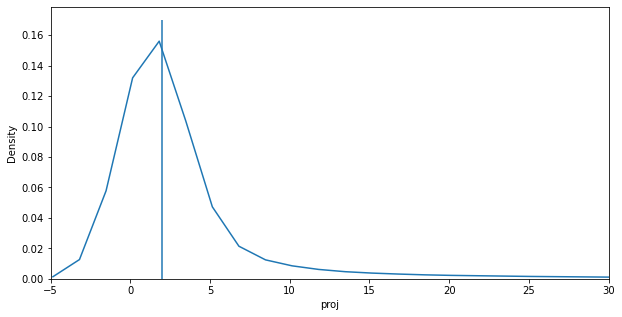

In [162]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_allP_freq["proj"], palette="tab10")
plt.xlim([-5,30])
plt.vlines(x=2, ymin=0, ymax=0.17)

plt.show()

In [163]:
tspec_sites_othermod = pd.merge(data_all_mod, tspec_sites[["ACC_ID", "UP_POS"]], how="inner", on=["ACC_ID", "UP_POS"])
tspec_sites_othermod

proj               peptide modres  UP_POS  ACC_ID  pep_start  \
0       PXD000004     CVEDPETGLCLLPLTDK      T    3014  Q15149       3008   
1       PXD000004     CVEDPETGLCLLPLTDK      T    3014  Q15149       3008   
2       PXD000004     CVEDPETGLCLLPLTDK      T    3014  Q15149       3008   
3       PXD000004     CVEDPETGLCLLPLTDK      T    3014  Q15149       3008   
4       PXD000004     CVEDPETGLCLLPLTDK      T    3014  Q15149       3008   
...           ...                   ...    ...     ...     ...        ...   
488915  PXD011609  SSSDHHFNQTIGSASPSTAR      S    1031  Q02413       1017   
488916  PXD011609  SSSDHHFNQTIGSASPSTAR      S    1031  Q02413       1017   
488917  PXD011609          HSASQEGQDTIR      S     509  P20930        506   
488918  PXD011609          HSASQEGQDTIR      S     509  P20930        506   
488919  PXD011609  HGSGSGHSSSHGQHGSGSGR      S    2190  Q86YZ3       2188   

        pep_end  unimod         modification tissue enrichment  \
0          3024     401       [401]Didehydro  Brain       None   
1          3024     401       [401]Didehydro  Brain       None   
2          3024     401       [401]Didehydro  Brain       None   
3          3024     401       [401]Didehydro  Brain       None   
4          3024     401       [401]Didehydro  Brain       None   
...         ...     ...                  ...    ...        ...   
488915     1036      40            [40]Sulfo   Skin       None   
488916     1036      40            [40]Sulfo   Skin       None   
488917      517      40            [40]Sulfo   Skin       None   
488918      517    1426  [1426]Hex(1)Pent(1)   Skin       None   
488919     2207       4   [4]Carbamidomethyl   Skin       None   

       modification_enrichment method additional  
0                         None   None       None  
1                         None   None       None  
2                         None   None       None  
3                         None   None       None  
4                         None   None       None  
...                        ...    ...        ...  
488915                    None   None       None  
488916                    None   None       None  
488917                    None   None       None  
488918                    None   None       None  
488919                    None   None       None  

[488920 rows x 14 columns]

In [164]:
tspec_sites_allP_freq = tspec_sites_allP.groupby(["ACC_ID", "UP_POS"], as_index=False)["proj"].count()
tspec_sites_allP_freq

ACC_ID  UP_POS  proj
0      A0A075B6H7      30     1
1      A0A075B6S5      52     1
2      A0A087WXM9     223     1
3      A0A0B4J2D5     124     1
4      A0A0B4J2D5     145     1
...           ...     ...   ...
14014      Q9Y6Y0     326     2
14015      Q9Y6Y0     336     1
14016      Q9Y6Y0     338    45
14017      Q9Y6Y8     737     1
14018      Q9Y6Y8     926     9

[14019 rows x 3 columns]

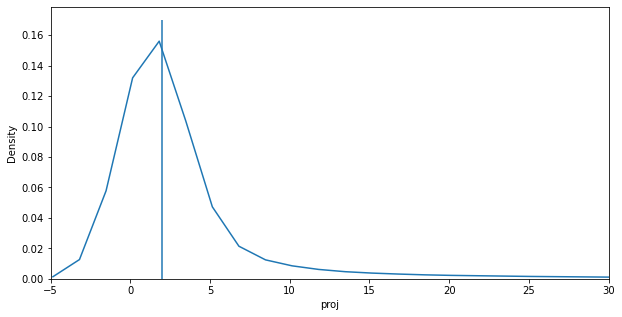

In [165]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_allP_freq["proj"], palette="tab10")
plt.xlim([-5,30])
plt.vlines(x=2, ymin=0, ymax=0.17)

plt.show()

In [166]:
tspec_sites_othermod = pd.merge(data_all_mod, tspec_sites[["ACC_ID", "UP_POS"]], how="inner", on=["ACC_ID", "UP_POS"])
tspec_sites_othermod

proj               peptide modres  UP_POS  ACC_ID  pep_start  \
0       PXD000004     CVEDPETGLCLLPLTDK      T    3014  Q15149       3008   
1       PXD000004     CVEDPETGLCLLPLTDK      T    3014  Q15149       3008   
2       PXD000004     CVEDPETGLCLLPLTDK      T    3014  Q15149       3008   
3       PXD000004     CVEDPETGLCLLPLTDK      T    3014  Q15149       3008   
4       PXD000004     CVEDPETGLCLLPLTDK      T    3014  Q15149       3008   
...           ...                   ...    ...     ...     ...        ...   
488915  PXD011609  SSSDHHFNQTIGSASPSTAR      S    1031  Q02413       1017   
488916  PXD011609  SSSDHHFNQTIGSASPSTAR      S    1031  Q02413       1017   
488917  PXD011609          HSASQEGQDTIR      S     509  P20930        506   
488918  PXD011609          HSASQEGQDTIR      S     509  P20930        506   
488919  PXD011609  HGSGSGHSSSHGQHGSGSGR      S    2190  Q86YZ3       2188   

        pep_end  unimod         modification tissue enrichment  \
0          3024     401       [401]Didehydro  Brain       None   
1          3024     401       [401]Didehydro  Brain       None   
2          3024     401       [401]Didehydro  Brain       None   
3          3024     401       [401]Didehydro  Brain       None   
4          3024     401       [401]Didehydro  Brain       None   
...         ...     ...                  ...    ...        ...   
488915     1036      40            [40]Sulfo   Skin       None   
488916     1036      40            [40]Sulfo   Skin       None   
488917      517      40            [40]Sulfo   Skin       None   
488918      517    1426  [1426]Hex(1)Pent(1)   Skin       None   
488919     2207       4   [4]Carbamidomethyl   Skin       None   

       modification_enrichment method additional  
0                         None   None       None  
1                         None   None       None  
2                         None   None       None  
3                         None   None       None  
4                         None   None       None  
...                        ...    ...        ...  
488915                    None   None       None  
488916                    None   None       None  
488917                    None   None       None  
488918                    None   None       None  
488919                    None   None       None  

[488920 rows x 14 columns]

In [167]:
tspec_sites_othermod_freq = tspec_sites_othermod.groupby(["ACC_ID", "UP_POS", "modification"],as_index=False)["proj"].count()
tspec_sites_othermod_freq

ACC_ID  UP_POS           modification  proj
0      A0A075B6H7      30            [122]Formyl     3
1      A0A075B6H7      30  [1419]15N-oxobutanoic     7
2      A0A075B6H7      30  [2007]Methamidophos-S     1
3      A0A075B6H7      30         [23]Dehydrated     6
4      A0A075B6H7      30          [35]Oxidation     1
...           ...     ...                    ...   ...
46836      Q9Y6Y0     338              [40]Sulfo   204
46837      Q9Y6Y0     338             [447]Deoxy     1
46838      Q9Y6Y8     737              [40]Sulfo     2
46839      Q9Y6Y8     926              [40]Sulfo    26
46840      Q9Y6Y8     926                [41]Hex     1

[46841 rows x 4 columns]

In [168]:
tspec_sites_othermod_freq["modification"].value_counts()

[40]Sulfo                     9177
[4]Carbamidomethyl            2400
[472]AEC-MAEC                 1662
[122]Formyl                   1579
[35]Oxidation                 1567
                              ... 
[417]PhosphoUridine              7
[292]IodoU-AMP                   6
[1801]Fluorescein-tyramine       5
[534]Dibromo                     4
[131]Triiodo                     1
Name: modification, Length: 132, dtype: int64

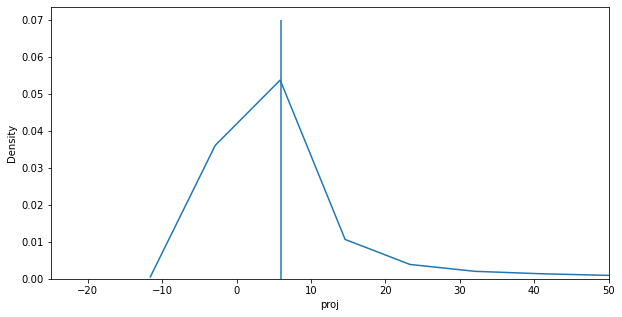

In [169]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_othermod_freq["proj"])
plt.xlim([-25,50])
plt.vlines(x=6, ymin=0, ymax=0.07)

plt.show()

In [170]:
tspec_sites_othermod_freq_gr = tspec_sites_othermod_freq.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"proj": "max"
                                                                                                              })
tspec_sites_othermod_freq_gr = pd.merge(tspec_sites_othermod_freq_gr, tspec_sites_othermod_freq, how = "inner")
tspec_sites_othermod_freq_gr = tspec_sites_othermod_freq_gr.groupby(["ACC_ID", "UP_POS", "proj"], as_index=False).agg({"modification": "first"})
tspec_sites_othermod_freq_gr

ACC_ID  UP_POS  proj                       modification
0      A0A075B6H7      30    13                         [447]Deoxy
1      A0A075B6S5      52   209          [362]Diisopropylphosphate
2      A0A087WXM9     223     1                        [1355]azole
3      A0A0B4J2D5     124     9                    [977]Carbofuran
4      A0A0B4J2D5     145     1  [727]O-pinacolylmethylphosphonate
...           ...     ...   ...                                ...
11440      Q9Y6X9     615    11                          [40]Sulfo
11441      Q9Y6Y0     336    24                          [40]Sulfo
11442      Q9Y6Y0     338   204                          [40]Sulfo
11443      Q9Y6Y8     737     2                          [40]Sulfo
11444      Q9Y6Y8     926    26                          [40]Sulfo

[11445 rows x 4 columns]

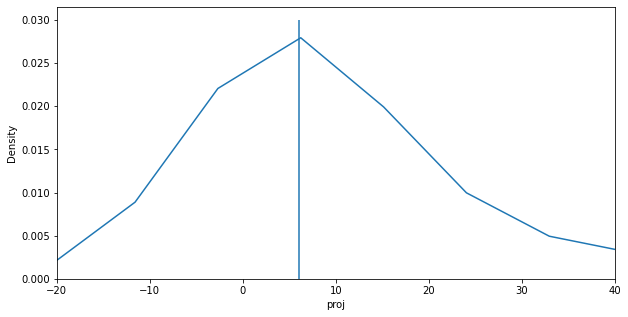

In [171]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_othermod_freq_gr["proj"])
plt.xlim([-20,40])
plt.vlines(x=6, ymin=0, ymax=0.03)

plt.show()

To compare the frequency of identification for P-sites and non P-sites, we consider only the most frequently identified modification. Only 23% of the tissue-specific sites is at least as frequently associated with pohsphorylation as with the most frequently identified other modificaiton, or close to 29% of the P-sites otherwise annotated.

In [172]:
tspec_sites_comb_freq = pd.merge(tspec_sites_othermod_freq_gr, tspec_sites_allP_freq, how="inner", on=["ACC_ID", "UP_POS"], suffixes=["_othermod", "_P"])

In [173]:
print(tspec_sites_comb_freq.shape[0])
print(tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]<=tspec_sites_comb_freq["proj_P"]].shape[0])
print(tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]<=tspec_sites_comb_freq["proj_P"]].shape[0]*100/tspec_sites.shape[0])
print(tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]<=tspec_sites_comb_freq["proj_P"]].shape[0]*100/tspec_sites_comb_freq.shape[0])
tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]<=tspec_sites_comb_freq["proj_P"]]

11445
3312
23.62508024823454
28.938401048492793


ACC_ID  UP_POS  proj_othermod                       modification  \
2      A0A087WXM9     223              1                        [1355]azole   
4      A0A0B4J2D5     145              1  [727]O-pinacolylmethylphosphonate   
15     A0A1B0GTU1     762              1                          [40]Sulfo   
16     A0A1B0GTU1     763              1                          [40]Sulfo   
17     A0A1B0GUS4      75              2                      [275]Nitrosyl   
...           ...     ...            ...                                ...   
11420      Q9Y6N7    1445              1                          [40]Sulfo   
11425      Q9Y6Q9     867              1                          [40]Sulfo   
11430      Q9Y6R7    5062              9                 [4]Carbamidomethyl   
11438      Q9Y6X4     526              2                          [40]Sulfo   
11439      Q9Y6X8      37              9                          [40]Sulfo   

       proj_P  
2           1  
4           1  
15          2  
16          2  
17          2  
...       ...  
11420       1  
11425       1  
11430      20  
11438       3  
11439      23  

[3312 rows x 5 columns]

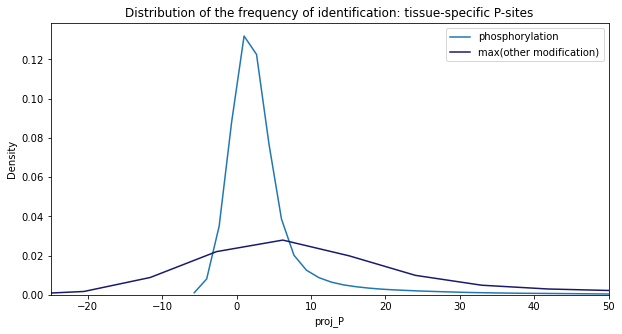

In [174]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_comb_freq["proj_P"], label="phosphorylation")
sns.kdeplot(x=tspec_sites_comb_freq["proj_othermod"], label="max(other modification)", color="midnightblue")
plt.xlim([-25,50])
plt.title("Distribution of the frequency of identification: tissue-specific P-sites")
#plt.vlines(x=2, ymin=0, ymax=0.14)
plt.legend()
#plt.savefig("Distribution_tissue-specific P-sites_othermod_all.png", format="png", bbox_inches="tight")
plt.show()

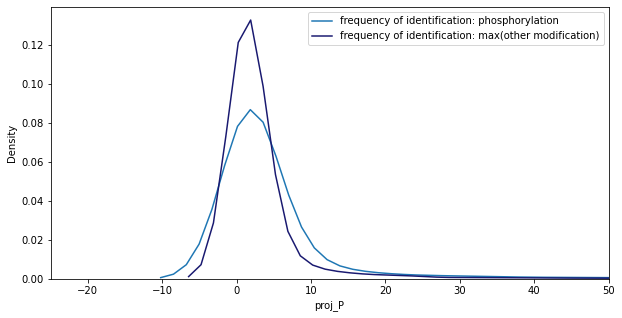

In [175]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]<=tspec_sites_comb_freq["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation")
sns.kdeplot(x=tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]<=tspec_sites_comb_freq["proj_P"]]["proj_othermod"], label="frequency of identification: max(other modification)", color="midnightblue")
plt.xlim([-25,50])
#plt.vlines(x=2, ymin=0, ymax=0.14)
plt.legend()

plt.show()

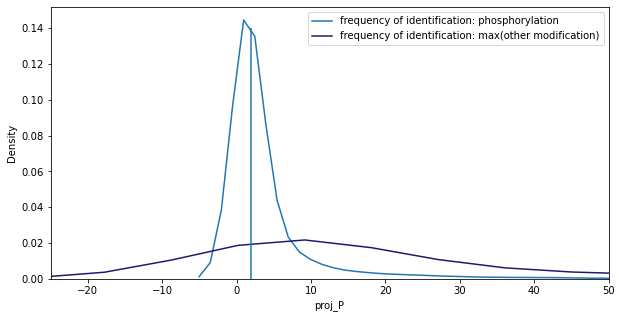

In [176]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]>tspec_sites_comb_freq["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation")
sns.kdeplot(x=tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]>tspec_sites_comb_freq["proj_P"]]["proj_othermod"], label="frequency of identification: max(other modification)", color="midnightblue")
plt.xlim([-25,50])
plt.vlines(x=2, ymin=0, ymax=0.14)
plt.legend()

plt.show()

In [177]:
taspec_sites_allP = pd.merge(taspec_sites[["ACC_ID", "UP_POS"]], data_P, how="inner", on=["ACC_ID", "UP_POS"])
taspec_sites_allP

ACC_ID  UP_POS       proj             peptide modres  pep_start  \
0       A0A0C4DH36     108  PXD004682         AEGTAVYYCAR      T        105   
1       A0A0C4DH36     108  PXD009029         AEGTAVYYCAR      T        105   
2       A0A0C4DH36     108  PXD009029         AEGTAVYYCAR      T        105   
3           A0AVK6      71  PXD006581         MLISAVSPEIR      S         65   
4           A0AVK6      71  PXD007740         MLISAVSPEIR      S         65   
...            ...     ...        ...                 ...    ...        ...   
130552      Q9Y6X9     743  PXD007740   RSVAVSDEEEVEEEAER      S        738   
130553      Q9Y6X9     743  PXD007740  SVAVSDEEEVEEEAERRK      S        739   
130554      Q9Y6X9     743  PXD010630    SVAVSDEEEVEEEAER      S        739   
130555      Q9Y6X9     743  PXD010630    SVAVSDEEEVEEEAER      S        739   
130556      Q9Y6X9     743  PXD010630    SVAVSDEEEVEEEAER      S        739   

        pep_end    tissue enrichment     modification method  \
0           115      Lung       None             None   None   
1           115     Blood       None             None   None   
2           115     Blood       None             None   None   
3            75     Blood        Yes  Phosphorylation   IMAC   
4            75     Colon        Yes  Phosphorylation   IMAC   
...         ...       ...        ...              ...    ...   
130552      754     Colon        Yes  Phosphorylation   IMAC   
130553      756     Colon        Yes  Phosphorylation   IMAC   
130554      754  Placenta       None             None   None   
130555      754  Placenta       None             None   None   
130556      754  Placenta       None             None   None   

                  additional  
0                       None  
1                       None  
2                       None  
3        Fe-NTA loaded beads  
4       GELoader tips (Ti4+)  
...                      ...  
130552  GELoader tips (Ti4+)  
130553  GELoader tips (Ti4+)  
130554                  None  
130555                  None  
130556                  None  

[130557 rows x 12 columns]

In [178]:
taspec_sites_allP_freq = taspec_sites_allP.groupby(["ACC_ID", "UP_POS"], as_index=False)["proj"].count()
taspec_sites_allP_freq

ACC_ID  UP_POS  proj
0     A0A0C4DH36     108     3
1         A0AVK6      71     6
2         A0AVK6     102     7
3         A0FGR8     738    11
4         A0FGR8     739     7
...          ...     ...   ...
6473      Q9Y6Q9    1330     9
6474      Q9Y6R1     245    43
6475      Q9Y6R9     285     2
6476      Q9Y6X9     725     9
6477      Q9Y6X9     743    12

[6478 rows x 3 columns]

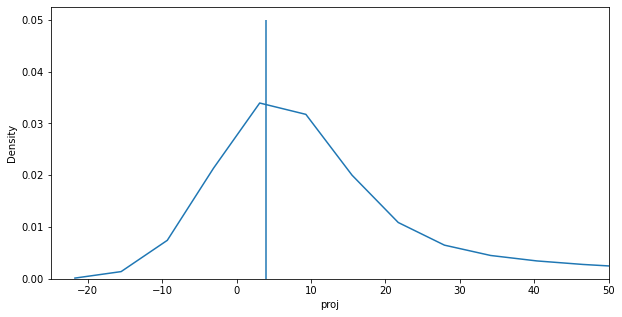

In [179]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_allP_freq["proj"], palette="tab10")
plt.xlim([-25,50])
plt.vlines(x=4, ymin=0, ymax=0.05)

plt.show()

In [180]:
taspec_sites_othermod = pd.merge(data_all_mod, taspec_sites[["ACC_ID", "UP_POS"]], how="inner", on=["ACC_ID", "UP_POS"])
taspec_sites_othermod

proj                      peptide modres  UP_POS  ACC_ID  \
0       PXD000004  GSSGGGCFGGSSGGYGGLGGFGGGSFR      S      61  P13645   
1       PXD001324  GSSGGGCFGGSSGGYGGLGGFGGGSFR      S      61  P13645   
2       PXD001324  GSSGGGCFGGSSGGYGGLGGFGGGSFR      S      61  P13645   
3       PXD001324  GSSGGGCFGGSSGGYGGLGGFGGGSFR      S      61  P13645   
4       PXD001325  GSSGGGCFGGSSGGYGGLGGFGGGSFR      S      61  P13645   
...           ...                          ...    ...     ...     ...   
676878  PXD011492                 HSASQEGQDTIR      S     507  P20930   
676879  PXD011492                 HSASQEGQDTIR      S     507  P20930   
676880  PXD011609                 HSASQEGQDTIR      S     507  P20930   
676881  PXD011609                 HSASQEGQDTIR      S     507  P20930   
676882  PXD011609                 HSASQEGQDTIR      S     507  P20930   

        pep_start  pep_end  unimod         modification  tissue enrichment  \
0              60       86       4   [4]Carbamidomethyl   Brain       None   
1              60       86       4   [4]Carbamidomethyl  Breast       None   
2              60       86       4   [4]Carbamidomethyl  Breast       None   
3              60       86     977      [977]Carbofuran  Breast       None   
4              60       86     977      [977]Carbofuran  Breast       None   
...           ...      ...     ...                  ...     ...        ...   
676878        506      517       4   [4]Carbamidomethyl    Skin       None   
676879        506      517       4   [4]Carbamidomethyl    Skin       None   
676880        506      517    1426  [1426]Hex(1)Pent(1)    Skin       None   
676881        506      517       4   [4]Carbamidomethyl    Skin       None   
676882        506      517       4   [4]Carbamidomethyl    Skin       None   

       modification_enrichment method additional  
0                         None   None       None  
1                         None   None       None  
2                         None   None       None  
3                         None   None       None  
4                         None   None       None  
...                        ...    ...        ...  
676878                    None   None       None  
676879                    None   None       None  
676880                    None   None       None  
676881                    None   None       None  
676882                    None   None       None  

[676883 rows x 14 columns]

In [181]:
taspec_sites_othermod_freq = taspec_sites_othermod.groupby(["ACC_ID", "UP_POS", "modification"],as_index=False)["proj"].count()
taspec_sites_othermod_freq

ACC_ID  UP_POS                  modification  proj
0      A0A0C4DH36     108                   [122]Formyl    11
1      A0A0C4DH36     108                   [5]Carbamyl     1
2          A0AVK6      71                     [40]Sulfo    30
3          A0AVK6     102                     [40]Sulfo    27
4          A0FGR8     738             [385]Ammonia-loss     1
...           ...     ...                           ...   ...
32845      Q9Y6X9     725                     [40]Sulfo     6
32846      Q9Y6X9     725              [898]pyrophospho     2
32847      Q9Y6X9     743  [1429]Hex(1)HexNAc(1)Phos(1)     2
32848      Q9Y6X9     743  [1430]Hex(1)HexNAc(1)Sulf(1)     1
32849      Q9Y6X9     743                     [40]Sulfo    14

[32850 rows x 4 columns]

In [182]:
taspec_sites_othermod_freq["modification"].value_counts()

[40]Sulfo                     5898
[4]Carbamidomethyl            1295
[35]Oxidation                  957
[122]Formyl                    937
[5]Carbamyl                    912
                              ... 
[417]PhosphoUridine              8
[1801]Fluorescein-tyramine       5
[534]Dibromo                     3
[131]Triiodo                     1
[397]Triiodothyronine            1
Name: modification, Length: 133, dtype: int64

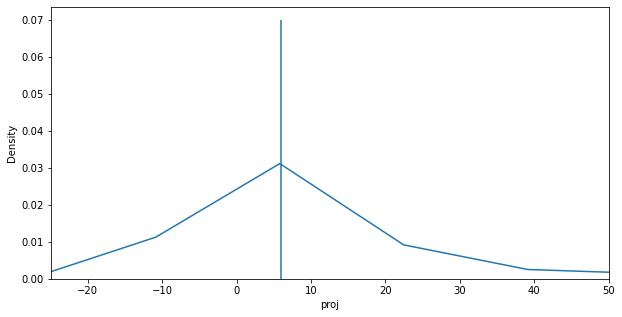

In [183]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_othermod_freq["proj"])
plt.xlim([-25,50])
plt.vlines(x=6, ymin=0, ymax=0.07)

plt.show()

In [184]:
taspec_sites_othermod_freq_gr = taspec_sites_othermod_freq.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"proj": "max"
                                                                                                              })
taspec_sites_othermod_freq_gr = pd.merge(taspec_sites_othermod_freq_gr, taspec_sites_othermod_freq, how = "inner")
taspec_sites_othermod_freq_gr = taspec_sites_othermod_freq_gr.groupby(["ACC_ID", "UP_POS", "proj"], as_index=False).agg({"modification": "first"})
taspec_sites_othermod_freq_gr

ACC_ID  UP_POS  proj modification
0     A0A0C4DH36     108    11  [122]Formyl
1         A0AVK6      71    30    [40]Sulfo
2         A0AVK6     102    27    [40]Sulfo
3         A0FGR8     738    16    [40]Sulfo
4         A0FGR8     739    39    [40]Sulfo
...          ...     ...   ...          ...
6248      Q9Y6Q9    1330     2    [40]Sulfo
6249      Q9Y6R1     245    78    [40]Sulfo
6250      Q9Y6R9     285     3    [40]Sulfo
6251      Q9Y6X9     725     6    [40]Sulfo
6252      Q9Y6X9     743    14    [40]Sulfo

[6253 rows x 4 columns]

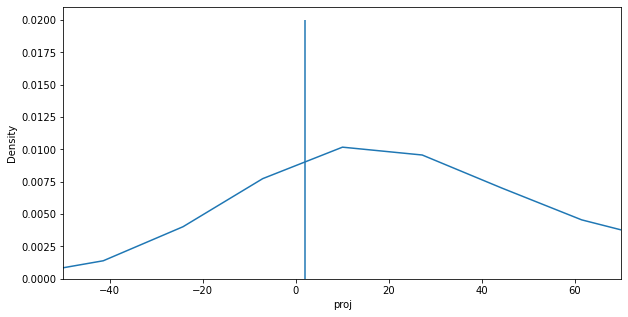

In [185]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_othermod_freq_gr["proj"])
plt.xlim([-50,70])
plt.vlines(x=2, ymin=0, ymax=0.02)

plt.show()

In [186]:
taspec_sites_comb_freq = pd.merge(taspec_sites_othermod_freq_gr, taspec_sites_allP_freq, how="inner", on=["ACC_ID", "UP_POS"], suffixes=["_othermod", "_P"])

In [187]:
print(taspec_sites_comb_freq.shape[0])

6253


In [188]:
print(pd.merge(taspec_sites_othermod_freq_gr, data_all_mod_res, how="inner", on=["ACC_ID", "UP_POS"]).shape[0])

6253


Roughly 27% of the otherwise annotated tissue aspecific P-sites are identified at least as frequently as phosphorylated as the most frequent other modification. The same is true for almost 27% of the tissue aspecific P-sites (all).

In [189]:
print(taspec_sites_comb_freq.shape[0])
print(taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]<=taspec_sites_comb_freq["proj_P"]].shape[0])
print(taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]<=taspec_sites_comb_freq["proj_P"]].shape[0]*100/taspec_sites.shape[0])
print(taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]<=taspec_sites_comb_freq["proj_P"]].shape[0]*100/taspec_sites_comb_freq.shape[0])
taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]<=taspec_sites_comb_freq["proj_P"]]

6253
1738
26.829268292682926
27.79465856388933


ACC_ID  UP_POS  proj_othermod modification  proj_P
9     A0MZ66     493             15    [40]Sulfo      15
10    A0MZ66     494             42    [40]Sulfo      67
13    A2RRP1     473             11    [40]Sulfo      13
19    A6ND91     168              2    [40]Sulfo       4
20    A6NF01      19              1    [40]Sulfo       2
...      ...     ...            ...          ...     ...
6241  Q9Y6M7      84              7    [40]Sulfo       7
6242  Q9Y6M7     233              5    [40]Sulfo       8
6243  Q9Y6N7     940              2    [40]Sulfo       8
6248  Q9Y6Q9    1330              2    [40]Sulfo       9
6251  Q9Y6X9     725              6    [40]Sulfo       9

[1738 rows x 5 columns]

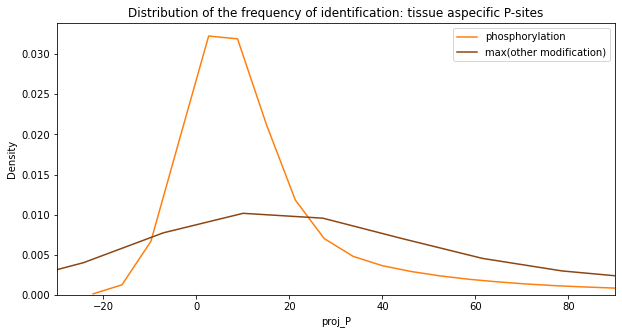

In [190]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_comb_freq["proj_P"], label="phosphorylation", color="tab:orange")
sns.kdeplot(x=taspec_sites_comb_freq["proj_othermod"], label="max(other modification)", color="saddlebrown")
plt.xlim([-30,90])
#plt.vlines(x=4, ymin=0, ymax=0.04)
plt.title("Distribution of the frequency of identification: tissue aspecific P-sites")
plt.legend()

#plt.savefig("Distribution_tissue_aspeicific_P-sites_othermod_all", format="png", bbox_inches="tight")
plt.show()

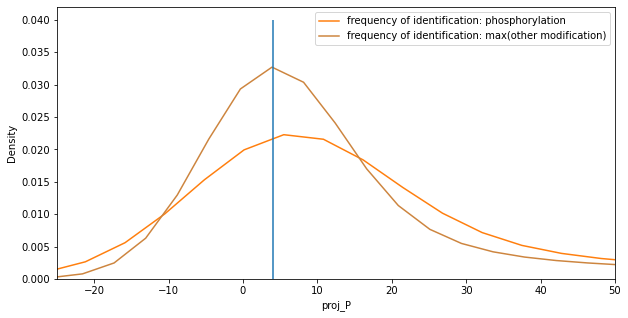

In [191]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]<=taspec_sites_comb_freq["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation", color="tab:orange")
sns.kdeplot(x=taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]<=taspec_sites_comb_freq["proj_P"]]["proj_othermod"], label="frequency of identification: max(other modification)", color="peru")
plt.xlim([-25,50])
plt.vlines(x=4, ymin=0, ymax=0.04)
plt.legend()

plt.show()

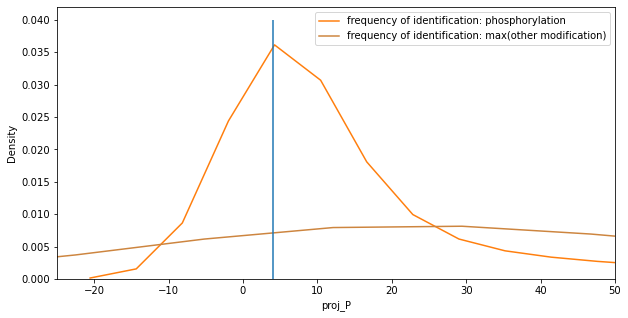

In [192]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]>taspec_sites_comb_freq["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation", color="tab:orange")
sns.kdeplot(x=taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]>taspec_sites_comb_freq["proj_P"]]["proj_othermod"], label="frequency of identification: max(other modification)", color="peru")
plt.xlim([-25,50])
plt.vlines(x=4, ymin=0, ymax=0.04)
plt.legend()

plt.show()

In [193]:
perv_sites_allP = pd.merge(gen_sites[["ACC_ID", "UP_POS"]], data_P, how="inner", on=["ACC_ID", "UP_POS"])
perv_sites_allP

ACC_ID  UP_POS       proj                         peptide modres  \
0       A0A0C4DH39      51  PXD010271                 ASGFTFTSSAVQWVR      S   
1           A0JNW5    1402  PXD006581  SVTQATQTSPGVPWPSQSANFPEFSFDFTR      S   
2           A0JNW5    1402  PXD006581  SVTQATQTSPGVPWPSQSANFPEFSFDFTR      S   
3           A0JNW5    1402  PXD006581  SVTQATQTSPGVPWPSQSANFPEFSFDFTR      S   
4           A0JNW5    1402  PXD010271  SVTQATQTSPGVPWPSQSANFPEFSFDFTR      S   
...            ...     ...        ...                             ...    ...   
183529      Q9Y6X4     635  PXD010271             AVDSSSEEIEVEVPVVDRR      S   
183530      Q9Y6X4     635  PXD010271             AVDSSSEEIEVEVPVVDRR      S   
183531      Q9Y6Y0     276  PXD006833           QISSSSTGCLSSPNATVQSPK      S   
183532      Q9Y6Y0     276  PXD007740           QISSSSTGCLSSPNATVQSPK      S   
183533      Q9Y6Y0     276  PXD011175           QISSSSTGCLSSPNATVQSPK      S   

        pep_start  pep_end                                             tissue  \
0              43       57  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
1            1394     1423                                              Blood   
2            1394     1423                                              Blood   
3            1394     1423                                              Blood   
4            1394     1423  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
...           ...      ...                                                ...   
183529        632      650  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
183530        632      650  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
183531        266      286              Urinary bladder, Colon, Kidney, Liver   
183532        266      286                                              Colon   
183533        266      286                                         Lymph node   

       enrichment            modification       method  \
0            None                    None         None   
1             Yes         Phosphorylation         IMAC   
2             Yes         Phosphorylation         IMAC   
3             Yes         Phosphorylation         IMAC   
4            None                    None         None   
...           ...                     ...          ...   
183529       None                    None         None   
183530       None                    None         None   
183531        Yes  Low abundance proteins  ProteoMiner   
183532        Yes         Phosphorylation         IMAC   
183533        Yes         Phosphorylation         IMAC   

                                               additional  
0                                                    None  
1                                     Fe-NTA loaded beads  
2                                     Fe-NTA loaded beads  
3                                     Fe-NTA loaded beads  
4                                                    None  
...                                                   ...  
183529                                               None  
183530                                               None  
183531  depletion of high abundance proteins, enrichme...  
183532                               GELoader tips (Ti4+)  
183533                 Fe(III)-NTA-IMAC-based enrichment?  

[183534 rows x 12 columns]

In [194]:
perv_sites_allP_freq = perv_sites_allP.groupby(["ACC_ID", "UP_POS"], as_index=False)["proj"].count()
perv_sites_allP_freq

ACC_ID  UP_POS  proj
0     A0A0C4DH39      51     1
1         A0JNW5    1402     7
2         A2RU30     454     2
3         A5A3E0     939    44
4         A5A3E0     940    26
...          ...     ...   ...
3401      Q9Y6V0    4023     2
3402      Q9Y6V0    4024     2
3403      Q9Y6V0    4395     1
3404      Q9Y6X4     635     3
3405      Q9Y6Y0     276     3

[3406 rows x 3 columns]

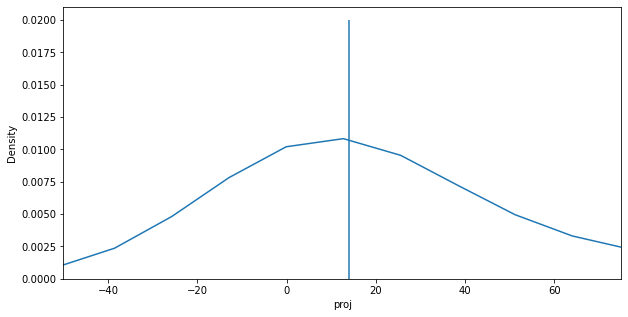

In [195]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_allP_freq["proj"], palette="tab10")
plt.xlim([-50,75])
plt.vlines(x=14, ymin=0, ymax=0.02)

plt.show()

In [196]:
perv_sites_othermod = pd.merge(data_all_mod, gen_sites[["ACC_ID", "UP_POS"]], how="inner", on=["ACC_ID", "UP_POS"])
perv_sites_othermod

proj                 peptide modres  UP_POS  ACC_ID  pep_start  \
0       PXD000004       AVCMLSNTTAIAEAWAR      S     379  Q6PEY2        374   
1       PXD000004       AVCMLSNTTAIAEAWAR      S     379  Q6PEY2        374   
2       PXD000004       AVCMLSNTTAIAEAWAR      S     379  Q6PEY2        374   
3       PXD000004       AVCMLSNTTAIAEAWAR      S     379  Q6PEY2        374   
4       PXD000529       AVCMLSNTTAIAEAWAR      S     379  Q6PEY2        374   
...           ...                     ...    ...     ...     ...        ...   
844729  PXD011175  RDSFIGTPYWMAPEVVMCETSK      T     193  Q9H2G2        187   
844730  PXD011175            TPGTPGTPSYPR      T    1616  P11137       1613   
844731  PXD011175        QGLGPASTTSPSPGPR      S     899  P98171        890   
844732  PXD011175        RGSSAAASPGSPPPGR      S      11  Q86UX6          8   
844733  PXD011175         FRISHELDSASSEVN      S     303  P10451        300   

        pep_end  unimod        modification      tissue enrichment  \
0           390       4  [4]Carbamidomethyl       Brain       None   
1           390       4  [4]Carbamidomethyl       Brain       None   
2           390       4  [4]Carbamidomethyl       Brain       None   
3           390       4  [4]Carbamidomethyl       Brain       None   
4           390     977     [977]Carbofuran       Liver       None   
...         ...     ...                 ...         ...        ...   
844729      208      40           [40]Sulfo  Lymph node        Yes   
844730     1624      40           [40]Sulfo  Lymph node        Yes   
844731      905      40           [40]Sulfo  Lymph node        Yes   
844732       23      40           [40]Sulfo  Lymph node        Yes   
844733      314      40           [40]Sulfo  Lymph node        Yes   

       modification_enrichment method                          additional  
0                         None   None                                None  
1                         None   None                                None  
2                         None   None                                None  
3                         None   None                                None  
4                         None   None                                None  
...                        ...    ...                                 ...  
844729         Phosphorylation   IMAC  Fe(III)-NTA-IMAC-based enrichment?  
844730         Phosphorylation   IMAC  Fe(III)-NTA-IMAC-based enrichment?  
844731         Phosphorylation   IMAC  Fe(III)-NTA-IMAC-based enrichment?  
844732         Phosphorylation   IMAC  Fe(III)-NTA-IMAC-based enrichment?  
844733         Phosphorylation   IMAC  Fe(III)-NTA-IMAC-based enrichment?  

[844734 rows x 14 columns]

In [197]:
perv_sites_othermod_freq = perv_sites_othermod.groupby(["ACC_ID", "UP_POS", "modification"],as_index=False)["proj"].count()
perv_sites_othermod_freq

ACC_ID  UP_POS                 modification  proj
0      A0A0C4DH39      51   [1868]MeMePhosphorothioate     4
1      A0A0C4DH39      51  [1987]Dimethylphosphothione     1
2      A0A0C4DH39      51        [363]Isopropylphospho     1
3      A0A0C4DH39      51                    [40]Sulfo     1
4      A0A0C4DH39      51     [723]O-Dimethylphosphate     1
...           ...     ...                          ...   ...
26740      Q9Y6V0    4395                    [40]Sulfo     1
26741      Q9Y6V0    4395             [898]pyrophospho     2
26742      Q9Y6X4     635                    [40]Sulfo     2
26743      Q9Y6X4     635             [898]pyrophospho     1
26744      Q9Y6Y0     276                    [40]Sulfo     4

[26745 rows x 4 columns]

In [198]:
perv_sites_othermod_freq["modification"].value_counts()

[40]Sulfo                     2993
[4]Carbamidomethyl             787
[898]pyrophospho               768
[122]Formyl                    625
[35]Oxidation                  591
                              ... 
[534]Dibromo                    13
[292]IodoU-AMP                  12
[1801]Fluorescein-tyramine      10
[131]Triiodo                     5
[397]Triiodothyronine            1
Name: modification, Length: 133, dtype: int64

In [199]:
taspec_sites_othermod_freq["modification"].value_counts()

[40]Sulfo                     5898
[4]Carbamidomethyl            1295
[35]Oxidation                  957
[122]Formyl                    937
[5]Carbamyl                    912
                              ... 
[417]PhosphoUridine              8
[1801]Fluorescein-tyramine       5
[534]Dibromo                     3
[131]Triiodo                     1
[397]Triiodothyronine            1
Name: modification, Length: 133, dtype: int64

In [200]:
tspec_sites_othermod_freq["modification"].value_counts()

[40]Sulfo                     9177
[4]Carbamidomethyl            2400
[472]AEC-MAEC                 1662
[122]Formyl                   1579
[35]Oxidation                 1567
                              ... 
[417]PhosphoUridine              7
[292]IodoU-AMP                   6
[1801]Fluorescein-tyramine       5
[534]Dibromo                     4
[131]Triiodo                     1
Name: modification, Length: 132, dtype: int64

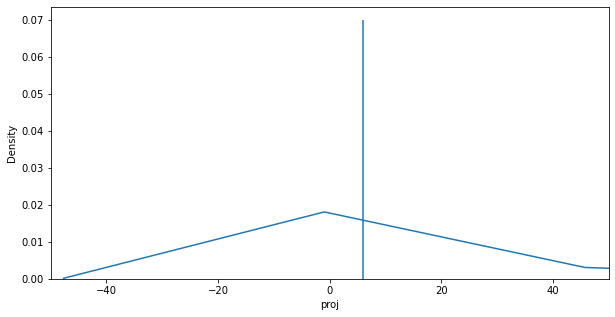

In [201]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_othermod_freq["proj"])
plt.xlim([-50,50])
plt.vlines(x=6, ymin=0, ymax=0.07)

plt.show()

In [202]:
perv_sites_othermod_freq_gr = perv_sites_othermod_freq.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"proj": "max"
                                                                                                              })
perv_sites_othermod_freq_gr = pd.merge(perv_sites_othermod_freq_gr, perv_sites_othermod_freq, how = "inner")
perv_sites_othermod_freq_gr = perv_sites_othermod_freq_gr.groupby(["ACC_ID", "UP_POS", "proj"], as_index=False).agg({"modification": "first"})
perv_sites_othermod_freq_gr

ACC_ID  UP_POS  proj                modification
0     A0A0C4DH39      51     4  [1868]MeMePhosphorothioate
1         A0JNW5    1402     1       [2007]Methamidophos-S
2         A2RU30     454     5                   [40]Sulfo
3         A5A3E0     939   627              [1918]Carbonyl
4         A5A3E0     940   891              [1875]methylol
...          ...     ...   ...                         ...
3193      Q9Y6V0    3585     7                   [40]Sulfo
3194      Q9Y6V0    4023     3                   [40]Sulfo
3195      Q9Y6V0    4395     2            [898]pyrophospho
3196      Q9Y6X4     635     2                   [40]Sulfo
3197      Q9Y6Y0     276     4                   [40]Sulfo

[3198 rows x 4 columns]

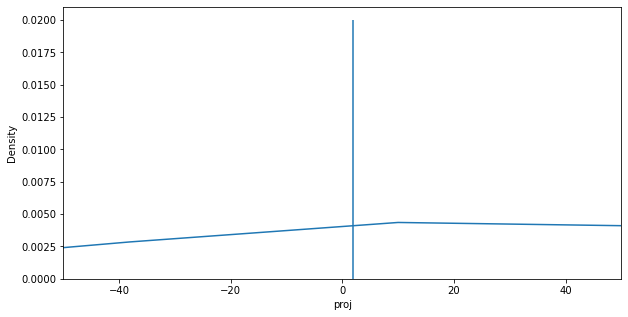

In [203]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_othermod_freq_gr["proj"])
plt.xlim([-50,50])
plt.vlines(x=2, ymin=0, ymax=0.02)

plt.show()

In [204]:
perv_sites_comb_freq = pd.merge(perv_sites_othermod_freq_gr, perv_sites_allP_freq, how="inner", on=["ACC_ID", "UP_POS"], suffixes=["_othermod", "_P"])


print(perv_sites_comb_freq.shape[0])

3198


In [205]:
print(pd.merge(perv_sites_othermod_freq_gr, data_all_mod_res, how="inner", on=["ACC_ID", "UP_POS"]).shape[0])

3198


Roughly 30% of the pervasive P-sites also found otherwise modified are at least as frequently identified as phosphorylated, as the most frequently identified other modification. The same is true for 28% of all the pervasive P-sites.

In [206]:
print(perv_sites_comb_freq.shape[0])
print(perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]<=perv_sites_comb_freq["proj_P"]].shape[0])
print(perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]<=perv_sites_comb_freq["proj_P"]].shape[0]*100/gen_sites.shape[0])
print(perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]<=perv_sites_comb_freq["proj_P"]].shape[0]*100/perv_sites_comb_freq.shape[0])
perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]<=perv_sites_comb_freq["proj_P"]]

3198
957
28.09747504403993
29.924953095684803


ACC_ID  UP_POS  proj_othermod           modification  proj_P
1     A0JNW5    1402              1  [2007]Methamidophos-S       7
23    A7KAX9     952              5              [40]Sulfo       5
24    A8MVW0     739              3              [40]Sulfo       6
26    B1ANY3     115              1          [1930]Pent(2)       1
28    B5ME19      39            625              [40]Sulfo     645
...      ...     ...            ...                    ...     ...
3178  Q9Y6R1     257             53              [40]Sulfo      83
3182  Q9Y6V0    1404              1              [40]Sulfo       2
3186  Q9Y6V0    1537              1              [40]Sulfo       1
3192  Q9Y6V0    1894              1              [40]Sulfo       2
3196  Q9Y6X4     635              2              [40]Sulfo       3

[957 rows x 5 columns]

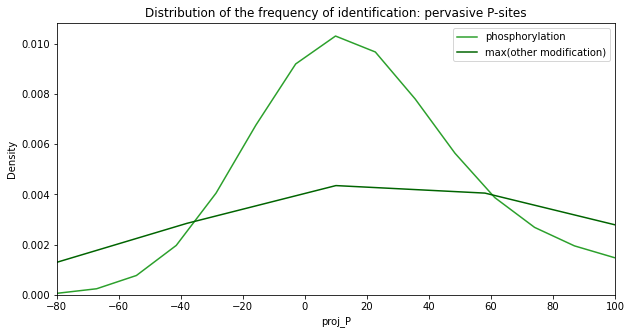

In [207]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_comb_freq["proj_P"], label="phosphorylation", color="tab:green")
sns.kdeplot(x=perv_sites_comb_freq["proj_othermod"], label="max(other modification)", color="darkgreen")
plt.xlim([-80,100])
#plt.vlines(x=4, ymin=0, ymax=0.03)
plt.title("Distribution of the frequency of identification: pervasive P-sites")
plt.legend()

#plt.savefig("Distribution_pervasive_P-sites_othermod_all.png", format="png", bbox_inches="tight")

plt.show()

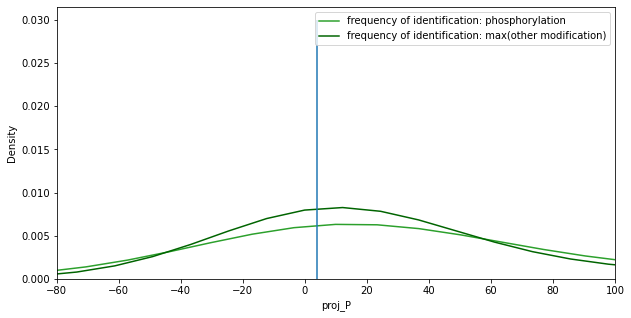

In [208]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]<=perv_sites_comb_freq["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation", color="tab:green")
sns.kdeplot(x=perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]<=perv_sites_comb_freq["proj_P"]]["proj_othermod"], label="frequency of identification: max(other modification)", color="darkgreen")
plt.xlim([-80,100])
plt.vlines(x=4, ymin=0, ymax=0.03)
plt.legend()

plt.show()

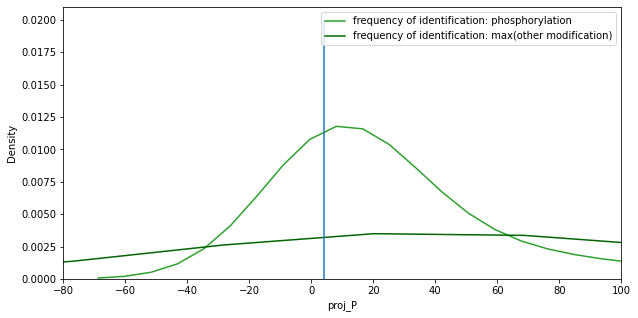

In [209]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]>perv_sites_comb_freq["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation", color="tab:green")
sns.kdeplot(x=perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]>perv_sites_comb_freq["proj_P"]]["proj_othermod"], label="frequency of identification: max(other modification)", color="darkgreen")
plt.xlim([-80,100])
plt.vlines(x=4, ymin=0, ymax=0.02)
plt.legend()

plt.show()

### Comparison of the frequency of identification on the tissue level

As modifications are known to differ across tissues, some modifications might be more frequent in one tissue. Therefore, when trying to find false positive P-site identifications, we also should consider the tissue level.

In [210]:
tspec_sites_allP_freq2 = tspec_sites_allP.groupby(["ACC_ID", "UP_POS", "tissue"], as_index=False)["proj"].count()
tspec_sites_allP_freq2

ACC_ID  UP_POS           tissue  proj
0      A0A075B6H7      30             Lung     1
1      A0A075B6S5      52  Menstrual fluid     1
2      A0A087WXM9     223           Testis     1
3      A0A0B4J2D5     124             PBMC     1
4      A0A0B4J2D5     145             PBMC     1
...           ...     ...              ...   ...
14014      Q9Y6Y0     326       Lymph node     2
14015      Q9Y6Y0     336            Colon     1
14016      Q9Y6Y0     338            Colon    45
14017      Q9Y6Y8     737            Colon     1
14018      Q9Y6Y8     926            Colon     9

[14019 rows x 4 columns]

In [211]:
tspec_sites_allP_freq2["tissue"].value_counts()

Colon                  5252
Lymph node             2224
Blood                  1642
Lung                   1316
Placenta                826
PBMC                    772
Skin                    574
Testis                  259
Skeletal muscle         238
Liver                   213
Small intestine         121
Brain                   121
Umbilical cord           87
Urine                    78
Urinary bladder          61
Monocytes                36
NK-cells                 36
Pancreas                 34
Breast                   26
Heart                    25
Dental plaque            17
B-cells                  16
Kidney                   10
Cerebrospinal fluid       9
Cervix                    7
Eye                       5
Ureter                    3
Synovial tissue           3
Menstrual fluid           2
Bone                      2
Ovary                     2
Tooth                     1
Esophagus                 1
Name: tissue, dtype: int64

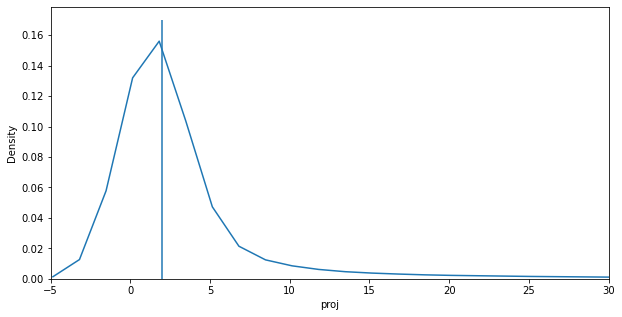

In [212]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_allP_freq2["proj"], palette="tab10")
plt.xlim([-5,30])
plt.vlines(x=2, ymin=0, ymax=0.17)

plt.show()

In [213]:
tspec_sites_othermod_freq2 = tspec_sites_othermod.groupby(["ACC_ID", "UP_POS", "modification", "tissue"],as_index=False)["proj"].count()
tspec_sites_othermod_freq2

ACC_ID  UP_POS           modification  \
0      A0A075B6H7      30            [122]Formyl   
1      A0A075B6H7      30  [1419]15N-oxobutanoic   
2      A0A075B6H7      30  [1419]15N-oxobutanoic   
3      A0A075B6H7      30  [1419]15N-oxobutanoic   
4      A0A075B6H7      30  [1419]15N-oxobutanoic   
...           ...     ...                    ...   
94423      Q9Y6Y8     737              [40]Sulfo   
94424      Q9Y6Y8     737              [40]Sulfo   
94425      Q9Y6Y8     926              [40]Sulfo   
94426      Q9Y6Y8     926              [40]Sulfo   
94427      Q9Y6Y8     926                [41]Hex   

                                                  tissue  proj  
0                                                  Blood     3  
1      Blood, Cerebrospinal fluid, Liver, Ovary, Panc...     1  
2                                                  Brain     1  
3                                                 Cervix     1  
4                                        Small intestine     4  
...                                                  ...   ...  
94423                                              Colon     1  
94424                                         Lymph node     1  
94425                                              Colon    25  
94426                                         Lymph node     1  
94427                                              Liver     1  

[94428 rows x 5 columns]

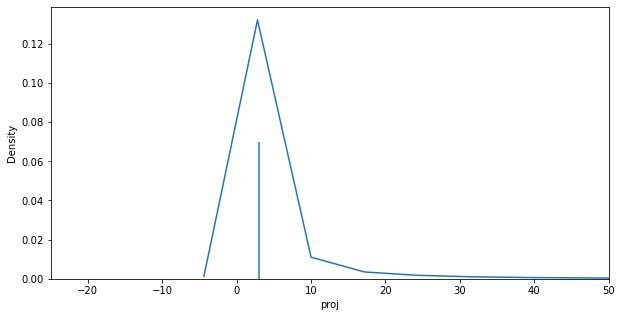

In [215]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_othermod_freq2["proj"])
plt.xlim([-25,50])
plt.vlines(x=3, ymin=0, ymax=0.07)

plt.show()

In [217]:
tspec_sites_othermod_freq_gr2 = tspec_sites_othermod_freq2.groupby(["ACC_ID", "UP_POS", "tissue"], as_index=False).agg({"proj": "max"
                                                                                                              })
tspec_sites_othermod_freq_gr2 = pd.merge(tspec_sites_othermod_freq_gr2, tspec_sites_othermod_freq2, how = "inner")
tspec_sites_othermod_freq_gr2 = tspec_sites_othermod_freq_gr2.groupby(["ACC_ID", "UP_POS", "tissue", "proj"], as_index=False).agg({"modification": "first"})
tspec_sites_othermod_freq_gr2

ACC_ID  UP_POS                                             tissue  \
0      A0A075B6H7      30                                              Blood   
1      A0A075B6H7      30  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
2      A0A075B6H7      30                                              Brain   
3      A0A075B6H7      30                                             Cervix   
4      A0A075B6H7      30                                              Liver   
...           ...     ...                                                ...   
43043      Q9Y6Y8     737                                              Colon   
43044      Q9Y6Y8     737                                         Lymph node   
43045      Q9Y6Y8     926                                              Colon   
43046      Q9Y6Y8     926                                              Liver   
43047      Q9Y6Y8     926                                         Lymph node   

       proj           modification  
0         4             [447]Deoxy  
1         8      [385]Ammonia-loss  
2         1  [1419]15N-oxobutanoic  
3         1  [1419]15N-oxobutanoic  
4         1             [447]Deoxy  
...     ...                    ...  
43043     1              [40]Sulfo  
43044     1              [40]Sulfo  
43045    25              [40]Sulfo  
43046     1                [41]Hex  
43047     1              [40]Sulfo  

[43048 rows x 5 columns]

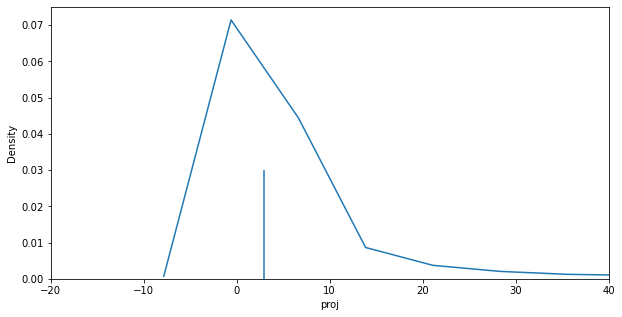

In [218]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_othermod_freq_gr2["proj"])
plt.xlim([-20,40])
plt.vlines(x=3, ymin=0, ymax=0.03)

plt.show()

In [220]:
tspec_sites_comb_freq2 = pd.merge(tspec_sites_othermod_freq_gr2, tspec_sites_allP_freq2, how="inner", on=["ACC_ID", "UP_POS", "tissue"], suffixes=["_othermod", "_P"])

In [221]:
print(tspec_sites_comb_freq2.shape[0])
print(tspec_sites_comb_freq2[tspec_sites_comb_freq2["proj_othermod"]<=tspec_sites_comb_freq2["proj_P"]].shape[0])
print(tspec_sites_comb_freq2[tspec_sites_comb_freq2["proj_othermod"]<=tspec_sites_comb_freq2["proj_P"]].shape[0]*100/tspec_sites.shape[0])
print(tspec_sites_comb_freq2[tspec_sites_comb_freq2["proj_othermod"]<=tspec_sites_comb_freq2["proj_P"]].shape[0]*100/tspec_sites_comb_freq2.shape[0])
tspec_sites_comb_freq2[tspec_sites_comb_freq2["proj_othermod"]<=tspec_sites_comb_freq2["proj_P"]]

9592
3681
26.257222341108495
38.37572977481234


ACC_ID  UP_POS      tissue  proj_othermod      modification  proj_P
0     A0A075B6H7      30        Lung              1        [447]Deoxy       1
4     A0A0B4J2F2     435    Placenta              1         [40]Sulfo       1
12    A0A1B0GTU1     762       Colon              1         [40]Sulfo       2
13    A0A1B0GTU1     763       Colon              1  [898]pyrophospho       2
16        A0FGR8     737       Colon              1         [40]Sulfo       1
...          ...     ...         ...            ...               ...     ...
9580      Q9Y6R9     447  Lymph node              3         [40]Sulfo       3
9581      Q9Y6R9     449  Lymph node              3         [40]Sulfo       3
9585      Q9Y6X4     526       Blood              1         [40]Sulfo       3
9586      Q9Y6X8      37       Colon              9         [40]Sulfo      23
9590      Q9Y6Y8     737       Colon              1         [40]Sulfo       1

[3681 rows x 6 columns]

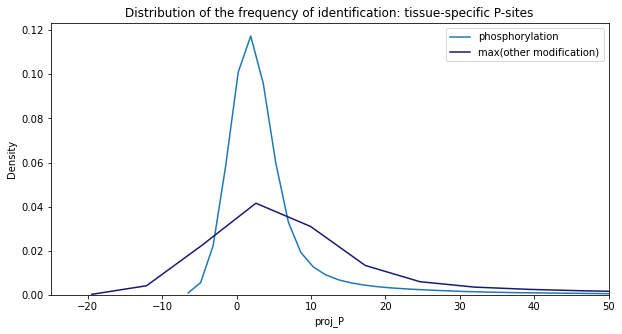

In [222]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_comb_freq2["proj_P"], label="phosphorylation")
sns.kdeplot(x=tspec_sites_comb_freq2["proj_othermod"], label="max(other modification)", color="midnightblue")
plt.xlim([-25,50])
plt.title("Distribution of the frequency of identification: tissue-specific P-sites")
#plt.vlines(x=2, ymin=0, ymax=0.14)
plt.legend()
#plt.savefig("Distribution_tissue-specific P-sites_othermod_all.png", format="png", bbox_inches="tight")
plt.show()

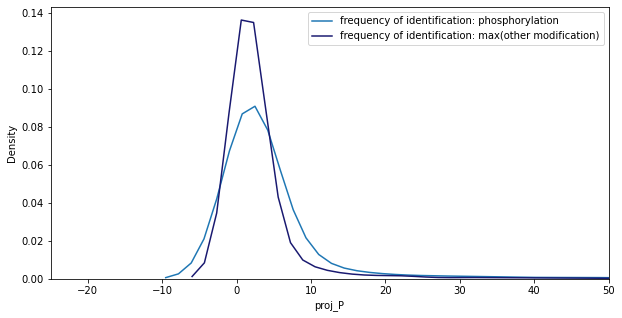

In [223]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_comb_freq2[tspec_sites_comb_freq2["proj_othermod"]<=tspec_sites_comb_freq2["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation")
sns.kdeplot(x=tspec_sites_comb_freq2[tspec_sites_comb_freq2["proj_othermod"]<=tspec_sites_comb_freq2["proj_P"]]["proj_othermod"], label="frequency of identification: max(other modification)", color="midnightblue")
plt.xlim([-25,50])
#plt.vlines(x=2, ymin=0, ymax=0.14)
plt.legend()

plt.show()

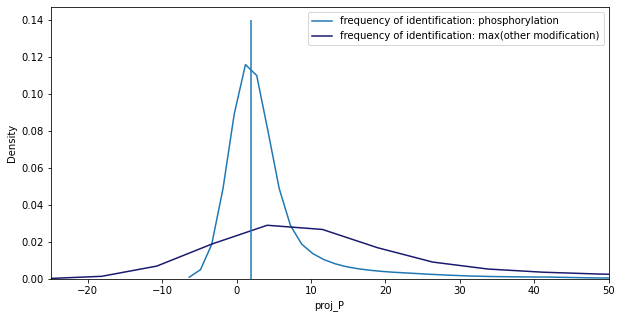

In [224]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_comb_freq2[tspec_sites_comb_freq2["proj_othermod"]>tspec_sites_comb_freq2["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation")
sns.kdeplot(x=tspec_sites_comb_freq2[tspec_sites_comb_freq2["proj_othermod"]>tspec_sites_comb_freq2["proj_P"]]["proj_othermod"], label="frequency of identification: max(other modification)", color="midnightblue")
plt.xlim([-25,50])
plt.vlines(x=2, ymin=0, ymax=0.14)
plt.legend()

plt.show()

In [225]:
taspec_sites_allP_freq2 = taspec_sites_allP.groupby(["ACC_ID", "UP_POS", "tissue"], as_index=False)["proj"].count()
taspec_sites_allP_freq2

ACC_ID  UP_POS          tissue  proj
0      A0A0C4DH36     108           Blood     2
1      A0A0C4DH36     108            Lung     1
2          A0AVK6      71           Blood     1
3          A0AVK6      71           Colon     5
4          A0AVK6     102           Blood     2
...           ...     ...             ...   ...
15574      Q9Y6X9     725      Lymph node     1
15575      Q9Y6X9     725  Umbilical cord     2
15576      Q9Y6X9     743           Blood     7
15577      Q9Y6X9     743           Colon     2
15578      Q9Y6X9     743        Placenta     3

[15579 rows x 4 columns]

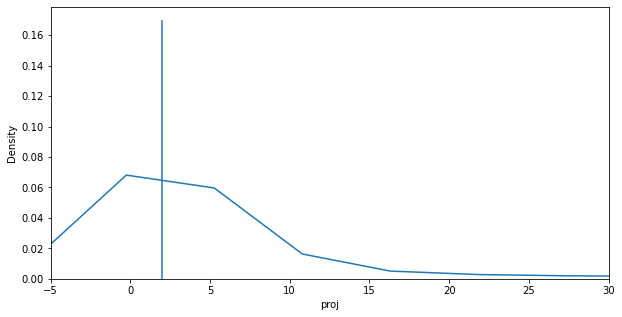

In [226]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_allP_freq2["proj"], palette="tab10")
plt.xlim([-5,30])
plt.vlines(x=2, ymin=0, ymax=0.17)

plt.show()

In [227]:
taspec_sites_othermod_freq2 = taspec_sites_othermod.groupby(["ACC_ID", "UP_POS", "modification", "tissue"],as_index=False)["proj"].count()
taspec_sites_othermod_freq2

ACC_ID  UP_POS                  modification  \
0      A0A0C4DH36     108                   [122]Formyl   
1      A0A0C4DH36     108                   [122]Formyl   
2      A0A0C4DH36     108                   [122]Formyl   
3      A0A0C4DH36     108                   [122]Formyl   
4      A0A0C4DH36     108                   [5]Carbamyl   
...           ...     ...                           ...   
89282      Q9Y6X9     743  [1430]Hex(1)HexNAc(1)Sulf(1)   
89283      Q9Y6X9     743                     [40]Sulfo   
89284      Q9Y6X9     743                     [40]Sulfo   
89285      Q9Y6X9     743                     [40]Sulfo   
89286      Q9Y6X9     743                     [40]Sulfo   

                                                  tissue  proj  
0                                                  Blood     5  
1      Blood, Cerebrospinal fluid, Liver, Ovary, Panc...     1  
2                                                 Cervix     3  
3                                                   Lung     2  
4                                                   Lung     1  
...                                                  ...   ...  
89282                                              Blood     1  
89283                                              Blood     9  
89284                                              Colon     1  
89285                                               Lung     2  
89286                                         Lymph node     2  

[89287 rows x 5 columns]

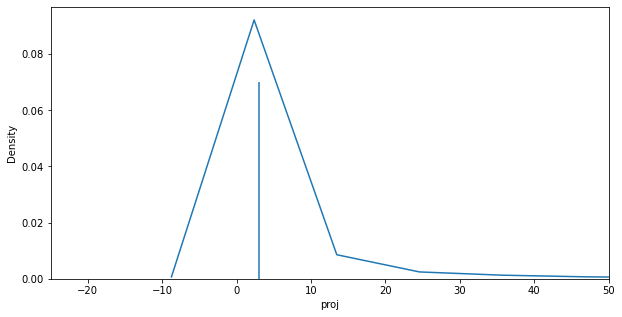

In [228]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_othermod_freq2["proj"])
plt.xlim([-25,50])
plt.vlines(x=3, ymin=0, ymax=0.07)

plt.show()

In [229]:
taspec_sites_othermod_freq_gr2 = taspec_sites_othermod_freq2.groupby(["ACC_ID", "UP_POS", "tissue"], as_index=False).agg({"proj": "max"
                                                                                                              })
taspec_sites_othermod_freq_gr2 = pd.merge(taspec_sites_othermod_freq_gr2, taspec_sites_othermod_freq2, how = "inner")
taspec_sites_othermod_freq_gr2 = taspec_sites_othermod_freq_gr2.groupby(["ACC_ID", "UP_POS", "tissue", "proj"], as_index=False).agg({"modification": "first"})
taspec_sites_othermod_freq_gr2

ACC_ID  UP_POS                                             tissue  \
0      A0A0C4DH36     108                                              Blood   
1      A0A0C4DH36     108  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
2      A0A0C4DH36     108                                             Cervix   
3      A0A0C4DH36     108                                               Lung   
4          A0AVK6      71                                              Blood   
...           ...     ...                                                ...   
34401      Q9Y6X9     725                                               Lung   
34402      Q9Y6X9     743                                              Blood   
34403      Q9Y6X9     743                                              Colon   
34404      Q9Y6X9     743                                               Lung   
34405      Q9Y6X9     743                                         Lymph node   

       proj modification  
0         5  [122]Formyl  
1         1  [122]Formyl  
2         3  [122]Formyl  
3         2  [122]Formyl  
4         5    [40]Sulfo  
...     ...          ...  
34401     2    [40]Sulfo  
34402     9    [40]Sulfo  
34403     1    [40]Sulfo  
34404     2    [40]Sulfo  
34405     2    [40]Sulfo  

[34406 rows x 5 columns]

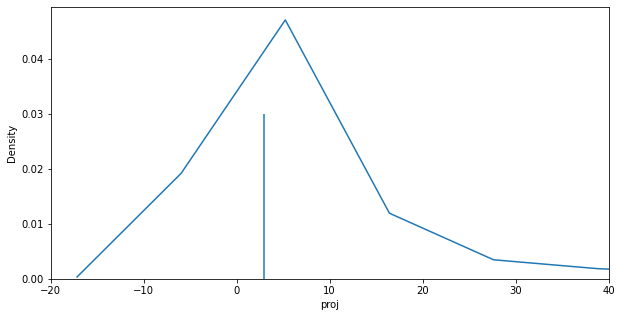

In [230]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_othermod_freq_gr2["proj"])
plt.xlim([-20,40])
plt.vlines(x=3, ymin=0, ymax=0.03)

plt.show()

In [231]:
taspec_sites_comb_freq2 = pd.merge(taspec_sites_othermod_freq_gr2, taspec_sites_allP_freq2, how="inner", on=["ACC_ID", "UP_POS", "tissue"], suffixes=["_othermod", "_P"])

In [232]:
print(taspec_sites_comb_freq2.shape[0])
print(taspec_sites_comb_freq2[taspec_sites_comb_freq2["proj_othermod"]<=taspec_sites_comb_freq2["proj_P"]].shape[0])
print(taspec_sites_comb_freq2[taspec_sites_comb_freq2["proj_othermod"]<=taspec_sites_comb_freq2["proj_P"]].shape[0]*100/taspec_sites.shape[0])
print(taspec_sites_comb_freq2[taspec_sites_comb_freq2["proj_othermod"]<=taspec_sites_comb_freq2["proj_P"]].shape[0]*100/taspec_sites_comb_freq2.shape[0])
taspec_sites_comb_freq2[taspec_sites_comb_freq2["proj_othermod"]<=taspec_sites_comb_freq2["proj_P"]]

12025
4499
69.45044766903365
37.41372141372141


ACC_ID  UP_POS tissue  proj_othermod            modification  proj_P
4      A0AVK6     102  Blood              1               [40]Sulfo       2
7      A0FGR8     738  Liver              3               [40]Sulfo       4
10     A0FGR8     739  Liver              1        [898]pyrophospho       1
13     A0FGR8     758  Liver              1               [40]Sulfo       2
18     A0JLT2     226   Lung              1  [1931]Pent(1)HexNAc(1)       1
...       ...     ...    ...            ...                     ...     ...
12012  Q9Y6Q9     214  Blood              6               [40]Sulfo       7
12018  Q9Y6Q9    1330   Lung              2               [40]Sulfo       3
12019  Q9Y6R1     245  Brain              1               [40]Sulfo       1
12022  Q9Y6X9     725   Lung              2               [40]Sulfo       4
12024  Q9Y6X9     743  Colon              1               [40]Sulfo       2

[4499 rows x 6 columns]

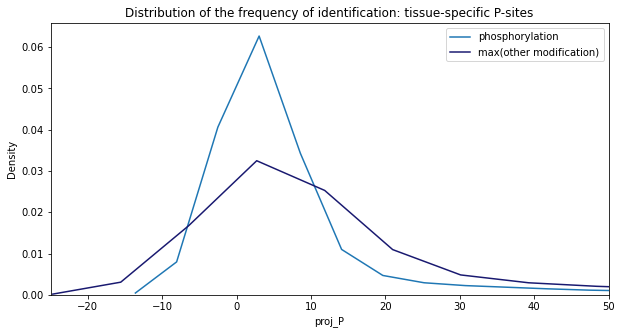

In [233]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_comb_freq2["proj_P"], label="phosphorylation")
sns.kdeplot(x=taspec_sites_comb_freq2["proj_othermod"], label="max(other modification)", color="midnightblue")
plt.xlim([-25,50])
plt.title("Distribution of the frequency of identification: tissue-specific P-sites")
#plt.vlines(x=2, ymin=0, ymax=0.14)
plt.legend()
#plt.savefig("Distribution_tissue-specific P-sites_othermod_all.png", format="png", bbox_inches="tight")
plt.show()

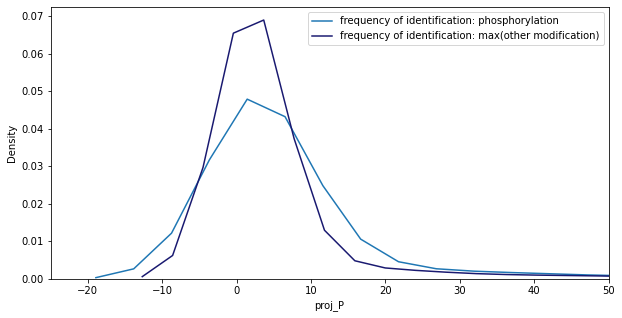

In [234]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_comb_freq2[taspec_sites_comb_freq2["proj_othermod"]<=taspec_sites_comb_freq2["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation")
sns.kdeplot(x=taspec_sites_comb_freq2[taspec_sites_comb_freq2["proj_othermod"]<=taspec_sites_comb_freq2["proj_P"]]["proj_othermod"], label="frequency of identification: max(other modification)", color="midnightblue")
plt.xlim([-25,50])
#plt.vlines(x=2, ymin=0, ymax=0.14)
plt.legend()

plt.show()

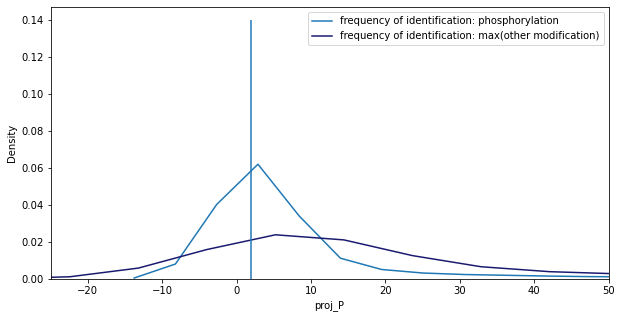

In [235]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_comb_freq2[taspec_sites_comb_freq2["proj_othermod"]>taspec_sites_comb_freq2["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation")
sns.kdeplot(x=taspec_sites_comb_freq2[taspec_sites_comb_freq2["proj_othermod"]>taspec_sites_comb_freq2["proj_P"]]["proj_othermod"], label="frequency of identification: max(other modification)", color="midnightblue")
plt.xlim([-25,50])
plt.vlines(x=2, ymin=0, ymax=0.14)
plt.legend()

plt.show()

In [236]:
perv_sites_allP_freq2 = perv_sites_allP.groupby(["ACC_ID", "UP_POS", "tissue"], as_index=False)["proj"].count()
perv_sites_allP_freq2

ACC_ID  UP_POS                                             tissue  \
0      A0A0C4DH39      51  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
1          A0JNW5    1402                                              Blood   
2          A0JNW5    1402  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
3          A0JNW5    1402                                         Lymph node   
4          A2RU30     454  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
...           ...     ...                                                ...   
14450      Q9Y6V0    4395  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
14451      Q9Y6X4     635  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
14452      Q9Y6Y0     276                                              Colon   
14453      Q9Y6Y0     276                                         Lymph node   
14454      Q9Y6Y0     276              Urinary bladder, Colon, Kidney, Liver   

       proj  
0         1  
1         3  
2         1  
3         3  
4         2  
...     ...  
14450     1  
14451     3  
14452     1  
14453     1  
14454     1  

[14455 rows x 4 columns]

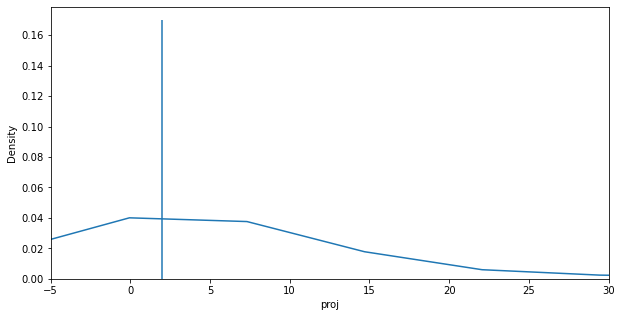

In [237]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_allP_freq2["proj"], palette="tab10")
plt.xlim([-5,30])
plt.vlines(x=2, ymin=0, ymax=0.17)

plt.show()

In [238]:
perv_sites_othermod_freq2 = perv_sites_othermod.groupby(["ACC_ID", "UP_POS", "modification", "tissue"],as_index=False)["proj"].count()
perv_sites_othermod_freq2

ACC_ID  UP_POS                 modification  \
0      A0A0C4DH39      51   [1868]MeMePhosphorothioate   
1      A0A0C4DH39      51   [1868]MeMePhosphorothioate   
2      A0A0C4DH39      51  [1987]Dimethylphosphothione   
3      A0A0C4DH39      51        [363]Isopropylphospho   
4      A0A0C4DH39      51                    [40]Sulfo   
...           ...     ...                          ...   
97853      Q9Y6V0    4395             [898]pyrophospho   
97854      Q9Y6X4     635                    [40]Sulfo   
97855      Q9Y6X4     635             [898]pyrophospho   
97856      Q9Y6Y0     276                    [40]Sulfo   
97857      Q9Y6Y0     276                    [40]Sulfo   

                                                  tissue  proj  
0                                                  Blood     1  
1      Blood, Cerebrospinal fluid, Liver, Ovary, Panc...     3  
2      Blood, Cerebrospinal fluid, Liver, Ovary, Panc...     1  
3      Blood, Cerebrospinal fluid, Liver, Ovary, Panc...     1  
4      Blood, Cerebrospinal fluid, Liver, Ovary, Panc...     1  
...                                                  ...   ...  
97853  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...     2  
97854  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...     2  
97855                                              Blood     1  
97856                                              Colon     2  
97857                                         Lymph node     2  

[97858 rows x 5 columns]

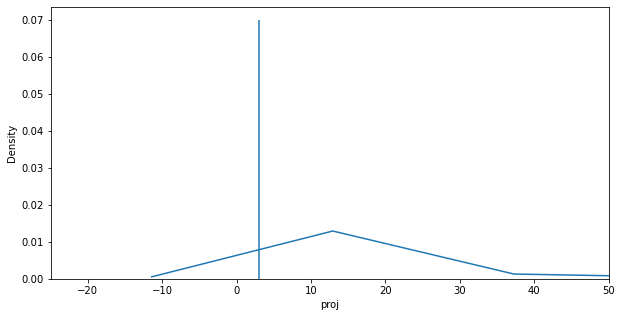

In [239]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_othermod_freq2["proj"])
plt.xlim([-25,50])
plt.vlines(x=3, ymin=0, ymax=0.07)

plt.show()

In [240]:
perv_sites_othermod_freq_gr2 = perv_sites_othermod_freq2.groupby(["ACC_ID", "UP_POS", "tissue"], as_index=False).agg({"proj": "max"
                                                                                                              })
perv_sites_othermod_freq_gr2 = pd.merge(perv_sites_othermod_freq_gr2, perv_sites_othermod_freq2, how = "inner")
perv_sites_othermod_freq_gr2 = perv_sites_othermod_freq_gr2.groupby(["ACC_ID", "UP_POS", "tissue", "proj"], as_index=False).agg({"modification": "first"})
perv_sites_othermod_freq_gr2

ACC_ID  UP_POS                                             tissue  \
0      A0A0C4DH39      51                                              Blood   
1      A0A0C4DH39      51  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
2          A0JNW5    1402                                              Blood   
3          A0JNW5    1402                                               Lung   
4          A2RU30     454                                         Lymph node   
...           ...     ...                                                ...   
25660      Q9Y6V0    4395  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
25661      Q9Y6X4     635                                              Blood   
25662      Q9Y6X4     635  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
25663      Q9Y6Y0     276                                              Colon   
25664      Q9Y6Y0     276                                         Lymph node   

       proj                modification  
0         1  [1868]MeMePhosphorothioate  
1         3  [1868]MeMePhosphorothioate  
2         1                   [40]Sulfo  
3         1       [2007]Methamidophos-S  
4         5                   [40]Sulfo  
...     ...                         ...  
25660     2            [898]pyrophospho  
25661     1            [898]pyrophospho  
25662     2                   [40]Sulfo  
25663     2                   [40]Sulfo  
25664     2                   [40]Sulfo  

[25665 rows x 5 columns]

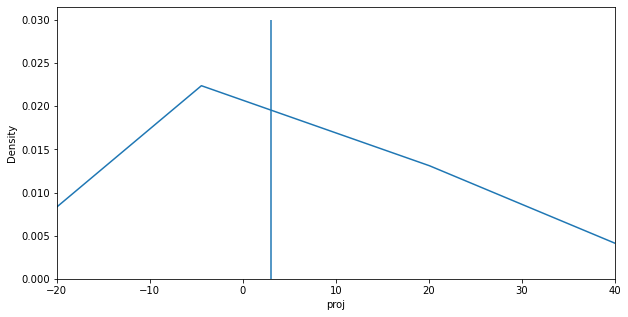

In [241]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_othermod_freq_gr2["proj"])
plt.xlim([-20,40])
plt.vlines(x=3, ymin=0, ymax=0.03)

plt.show()

In [242]:
perv_sites_comb_freq2 = pd.merge(perv_sites_othermod_freq_gr2, perv_sites_allP_freq2, how="inner", on=["ACC_ID", "UP_POS", "tissue"], suffixes=["_othermod", "_P"])

In [244]:
print(perv_sites_comb_freq2.shape[0])
print(perv_sites_comb_freq2[perv_sites_comb_freq2["proj_othermod"]<=perv_sites_comb_freq2["proj_P"]].shape[0])
print(perv_sites_comb_freq2[perv_sites_comb_freq2["proj_othermod"]<=perv_sites_comb_freq2["proj_P"]].shape[0]*100/gen_sites.shape[0])
print(perv_sites_comb_freq2[perv_sites_comb_freq2["proj_othermod"]<=perv_sites_comb_freq2["proj_P"]].shape[0]*100/perv_sites_comb_freq2.shape[0])
perv_sites_comb_freq2[perv_sites_comb_freq2["proj_othermod"]<=perv_sites_comb_freq2["proj_P"]]

10014
4035
118.46741045214327
40.29358897543439


ACC_ID  UP_POS      tissue  proj_othermod    modification  proj_P
0      A0JNW5    1402       Blood              1       [40]Sulfo       3
2      A5A3E0     939  Lymph node              5       [40]Sulfo      10
16     A5A3E0    1062      Breast              4   [35]Oxidation       7
18     A5A3E0    1062        PBMC             76       [129]Iodo     145
19     A5A3E0    1062        Skin             52  [1875]methylol      62
...       ...     ...         ...            ...             ...     ...
9999   Q9Y6G9     515        PBMC              4       [40]Sulfo       7
10003  Q9Y6G9     516  Lymph node              4       [40]Sulfo       7
10005  Q9Y6I3     454       Liver              1       [40]Sulfo       2
10009  Q9Y6R1     255       Colon             42       [40]Sulfo      48
10011  Q9Y6R1     257       Colon             52       [40]Sulfo      78

[4035 rows x 6 columns]

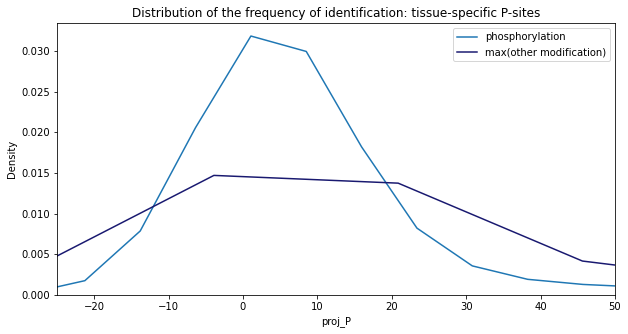

In [245]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_comb_freq2["proj_P"], label="phosphorylation")
sns.kdeplot(x=perv_sites_comb_freq2["proj_othermod"], label="max(other modification)", color="midnightblue")
plt.xlim([-25,50])
plt.title("Distribution of the frequency of identification: tissue-specific P-sites")
#plt.vlines(x=2, ymin=0, ymax=0.14)
plt.legend()
#plt.savefig("Distribution_tissue-specific P-sites_othermod_all.png", format="png", bbox_inches="tight")
plt.show()

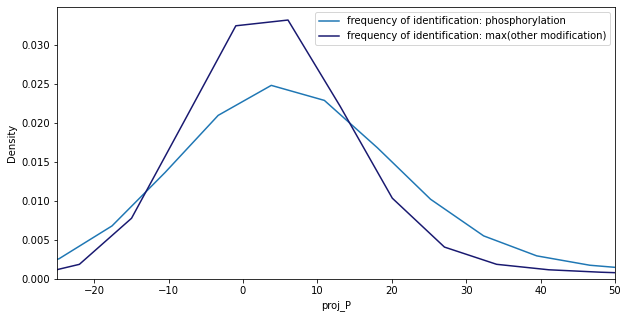

In [246]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_comb_freq2[perv_sites_comb_freq2["proj_othermod"]<=perv_sites_comb_freq2["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation")
sns.kdeplot(x=perv_sites_comb_freq2[perv_sites_comb_freq2["proj_othermod"]<=perv_sites_comb_freq2["proj_P"]]["proj_othermod"], label="frequency of identification: max(other modification)", color="midnightblue")
plt.xlim([-25,50])
#plt.vlines(x=2, ymin=0, ymax=0.14)
plt.legend()

plt.show()

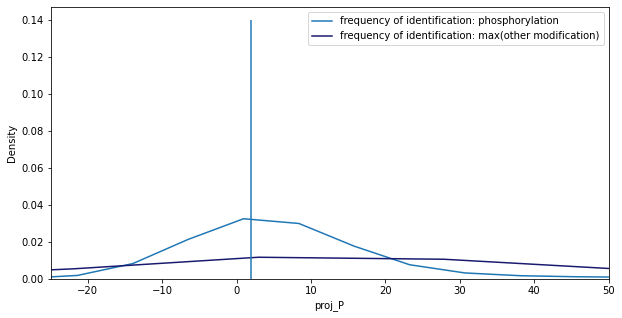

In [247]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_comb_freq2[perv_sites_comb_freq2["proj_othermod"]>perv_sites_comb_freq2["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation")
sns.kdeplot(x=perv_sites_comb_freq2[perv_sites_comb_freq2["proj_othermod"]>perv_sites_comb_freq2["proj_P"]]["proj_othermod"], label="frequency of identification: max(other modification)", color="midnightblue")
plt.xlim([-25,50])
plt.vlines(x=2, ymin=0, ymax=0.14)
plt.legend()

plt.show()